In [1]:
import pandas as pd
import numpy as np

In [2]:
sol=pd.read_csv('SMILES-DATA - Equal-1.csv')
sol

,SMILES,RESULT
0,CC=1N=C(C)N(N1)C2CCCN(C2)C(=O)C=C,0
1,CN(CC1=NC=2CCCCC2S1)C(=O)C=C,0
2,CC=1C=CC=C2N=C(OC12)C3CCN(CC3)C(=O)C=C,0
3,COC=1C=CC=2NC=C(C3=CCN(CC3)C(=O)C=C)C2C1,0
4,C=CC(=O)NCC1COC=2C=CC=CC2O1,0
...,...,...
401,CC(C)N1CCC(NC(=O)C=C)C1=O,1
402,C=CC(=O)NCC1CC2(CCC2)CO1,1
403,CC(C)C(NC(=O)C=C)C1(CO)CC=CC1,1
404,CC1(CC2CC(C)(C)C1)CN2C(=O)C=C,1


In [3]:
sol.SMILES

0             CC=1N=C(C)N(N1)C2CCCN(C2)C(=O)C=C
1                  CN(CC1=NC=2CCCCC2S1)C(=O)C=C
2        CC=1C=CC=C2N=C(OC12)C3CCN(CC3)C(=O)C=C
3      COC=1C=CC=2NC=C(C3=CCN(CC3)C(=O)C=C)C2C1
4                   C=CC(=O)NCC1COC=2C=CC=CC2O1
                         ...                   
401                   CC(C)N1CCC(NC(=O)C=C)C1=O
402                    C=CC(=O)NCC1CC2(CCC2)CO1
403               CC(C)C(NC(=O)C=C)C1(CO)CC=CC1
404               CC1(CC2CC(C)(C)C1)CN2C(=O)C=C
405                    CC(=O)NC1CCN(C1)C(=O)C=C
Name: SMILES, Length: 406, dtype: object

In [4]:
sol.SMILES[8]

'C=CC(=O)NC=1C=CC=C(C1)N2CCCS2(=O)=O'

In [5]:
from rdkit import Chem
#from rdkit.Chem import MACCSkeys
from rdkit.Chem import rdFMCS

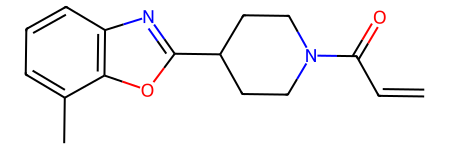

In [6]:
Chem.MolFromSmiles(sol.SMILES[2]) 

In [7]:
for smiles in sol.SMILES[:1]:
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        # Display or process the molecular structure as needed
        # For example, you can save the structure as an image
        img = Chem.Draw.MolToImage(mol)
        img.show()
        print(img)

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=300x300 at 0x1CF1F04C550>


In [8]:
mol_list=[]
for element in sol.SMILES:
    mol=Chem.MolFromSmiles(element)
    #print(mol)
    mol_list.append(mol)

In [9]:
len(mol_list)

406

In [10]:
mol_list[:5]

In [11]:
sol.head()

,SMILES,RESULT
0,CC=1N=C(C)N(N1)C2CCCN(C2)C(=O)C=C,0
1,CN(CC1=NC=2CCCCC2S1)C(=O)C=C,0
2,CC=1C=CC=C2N=C(OC12)C3CCN(CC3)C(=O)C=C,0
3,COC=1C=CC=2NC=C(C3=CCN(CC3)C(=O)C=C)C2C1,0
4,C=CC(=O)NCC1COC=2C=CC=CC2O1,0


In [12]:
import numpy as np
#from rdkit.Chem import Descriptors

In [13]:
#X=sol.drop(['type','results'],axis='columns')
X=sol.drop(['RESULT'],axis='columns')
Y=sol['RESULT']


In [14]:
X

,SMILES
0,CC=1N=C(C)N(N1)C2CCCN(C2)C(=O)C=C
1,CN(CC1=NC=2CCCCC2S1)C(=O)C=C
2,CC=1C=CC=C2N=C(OC12)C3CCN(CC3)C(=O)C=C
3,COC=1C=CC=2NC=C(C3=CCN(CC3)C(=O)C=C)C2C1
4,C=CC(=O)NCC1COC=2C=CC=CC2O1
...,...
401,CC(C)N1CCC(NC(=O)C=C)C1=O
402,C=CC(=O)NCC1CC2(CCC2)CO1
403,CC(C)C(NC(=O)C=C)C1(CO)CC=CC1
404,CC1(CC2CC(C)(C)C1)CN2C(=O)C=C


In [15]:
Y.value_counts()

0    203
1    203
Name: RESULT, dtype: int64

In [16]:
#from rdkit import Chem
#from rdkit.Chem import MACCSkeys

#########Generate MACCS fingerprint
#from rdkit.Chem import MACCSkeys
#fp = MACCSkeys.GenMACCSKeys(mol)
#fp

In [17]:
# Obtain the fingerprint as a binary string or array

#fp_string = fp.ToBitString()
#fp_array = np.array(list(fp_string), dtype=int)
#fp_string

In [18]:
#fp_array

In [19]:
#len(fp_string)

In [20]:
#fp_array.shape

In [21]:
############################################################ TT #####################################
############################################################ TT #####################################
############################################################ TT #####################################

import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem

# Define a function to convert SMILES strings to "TT" fingerprints
def smiles_to_tt(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        # Generate "TT" fingerprint
        tt_fp = AllChem.GetHashedTopologicalTorsionFingerprintAsBitVect(mol)
        # Convert the fingerprint to a numpy array
        tt_array = np.array(list(tt_fp.ToBitString()), dtype=int)
        return tt_array
    else:
        return None

# Apply the function to the 'SMILES' column and create a new column for the fingerprints
sol['Fingerprint'] = sol['SMILES'].apply(smiles_to_tt)

# Access the 'SMILES' and 'Fingerprint' columns
X = sol[['Fingerprint']]

# Calculate the sum of bits in the fingerprint for each row
sol['Fingerprint_Sum'] = sol['Fingerprint'].apply(lambda x: x.sum())

# Calculate the average sum of bits across all rows
average_fingerprint_sum = sol['Fingerprint_Sum'].mean()

print(sol['Fingerprint_Sum'])
print(average_fingerprint_sum)


0      32
1      29
2      40
3      42
4      27
       ..
401    23
402    21
403    25
404    26
405    19
Name: Fingerprint_Sum, Length: 406, dtype: int32
26.645320197044335


In [24]:
############################################################ ECFP4 #####################################
############################################################ ECFP4 #####################################
############################################################ ECFP4 #####################################

import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem

# Define a function to convert SMILES strings to ECFP4 fingerprints
def smiles_to_ecfp4(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        # Generate ECFP4 fingerprint
        fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, 4, nBits=2048)  # ECFP4 with diameter 4
        return np.array(list(fingerprint.ToBitString()), dtype=int)
    else:
        return None

# Apply the function to the 'SMILES' column and create a new column for the fingerprints
sol['Fingerprint'] = sol['SMILES'].apply(smiles_to_ecfp4)

# Access the 'SMILES' and 'Fingerprint' columns
X = sol[['Fingerprint']]

# Calculate the sum of bits in the fingerprint for each row
sol['Fingerprint_Sum'] = sol['Fingerprint'].apply(lambda x: x.sum())

# Calculate the average sum of bits across all rows
average_fingerprint_sum = sol['Fingerprint_Sum'].mean()

print(sol['Fingerprint_Sum'])
print(average_fingerprint_sum)


0      52
1      53
2      65
3      73
4      54
       ..
401    42
402    45
403    42
404    41
405    40
Name: Fingerprint_Sum, Length: 406, dtype: int32
49.51231527093596


<Axes: >

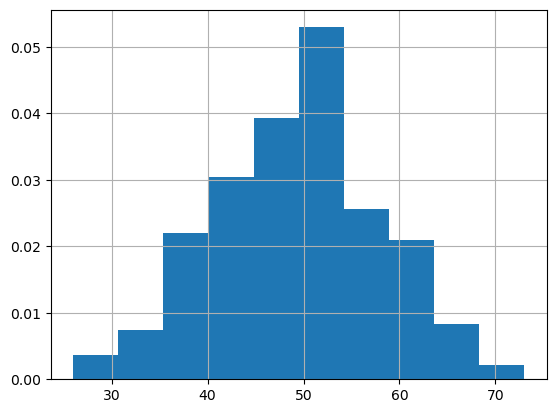

In [25]:
sol['Fingerprint_Sum'].hist(density=1)

In [26]:
#sol2['Fingerprint_Sum'].hist(density=1)

In [27]:
fingerprints = sol['Fingerprint'] 
fingerprints_df = pd.DataFrame( fingerprints.tolist())
print(fingerprints_df)
X=fingerprints_df
X

     0     1     2     3     4     5     6     7     8     9     ...  2038  \
0       1     0     0     0     0     0     0     0     0     0  ...     0   
1       0     0     0     0     0     0     0     0     0     0  ...     0   
2       0     0     0     0     0     0     0     0     0     0  ...     0   
3       0     0     0     0     0     0     0     0     0     0  ...     0   
4       0     0     0     0     0     0     0     0     0     0  ...     0   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
401     0     1     0     0     0     1     0     0     0     0  ...     0   
402     0     0     0     0     0     0     0     0     0     0  ...     0   
403     0     1     0     0     0     0     0     0     0     0  ...     0   
404     0     0     0     0     0     0     0     0     0     0  ...     0   
405     0     0     0     0     0     0     0     0     0     0  ...     0   

     2039  2040  2041  2042  2043  2044  2045  2046  2047  
0  

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
402,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
403,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
404,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
Y=sol[['RESULT']]
Y

,RESULT
0,0
1,0
2,0
3,0
4,0
...,...
401,1
402,1
403,1
404,1


In [29]:
Y.value_counts()

RESULT
0         203
1         203
dtype: int64

In [30]:
# oversampling  SMOTE

#from imblearn.over_sampling import SMOTE

#smote = SMOTE(sampling_strategy='minority')
#X_sm, Y_sm = smote.fit_resample(X,Y)

#Y_sm.value_counts()

In [31]:
#Y_sm.to_csv('data-1111.csv', index=False)

In [32]:
from sklearn.model_selection import train_test_split

#X_train, X_test, Y_train, Y_test = train_test_split(X_sm, Y_sm, test_size=0.2, random_state=42)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
#X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)


In [33]:
X_train.shape

(324, 2048)

In [34]:
X_test.shape

(82, 2048)

In [35]:

################################### GridsearchCV  ######################################
################################### GridsearchCV  ######################################
################################### GridsearchCV  ######################################


from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import sklearn
import numpy as np
import joblib

# Assume X_sm and Y_sm are your features and labels respectively

# Parameter grid for GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],  # Criteria for choosing nodes
    'splitter': ['best', 'random'],  # Strategy for choosing the split at each node
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'auto', 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'class_weight': [None, 'balanced'],  # Weights associated with classes, if 'balanced' it uses the values of Y to automatically adjust weights inversely proportional to class frequencies
    'random_state': [42]  # Ensures reproducibility
}
   

# Create an SVM model with verbose output during model fitting (verbose=1 for some output, higher for more)
clf = DecisionTreeClassifier()
svm_model=clf

# Define 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Configure GridSearchCV with increased verbosity for more detailed search output
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='precision', cv=kf, verbose=3, n_jobs=-1)

# Perform the search
grid_search.fit(X, Y)

# Results
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.3f}".format(grid_search.best_score_))

# Best model (retrained on the entire dataset)
best_model = grid_search.best_estimator_

# Save the retrained model
joblib.dump(best_model, 'svm_model_final.joblib')

Fitting 10 folds for each of 1152 candidates, totalling 11520 fits
Best parameters found:  {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'best'}
Best cross-validation accuracy: 0.674


['svm_model_final.joblib']

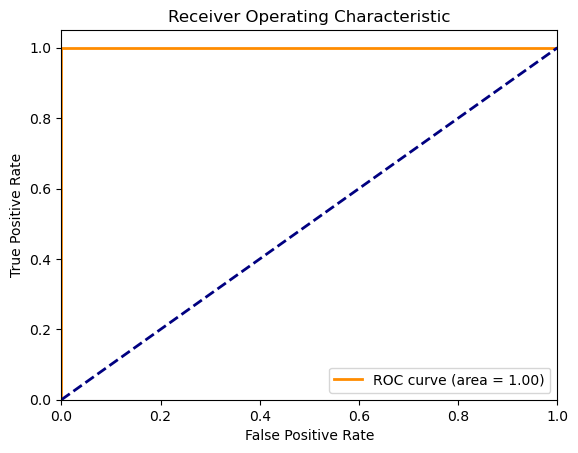

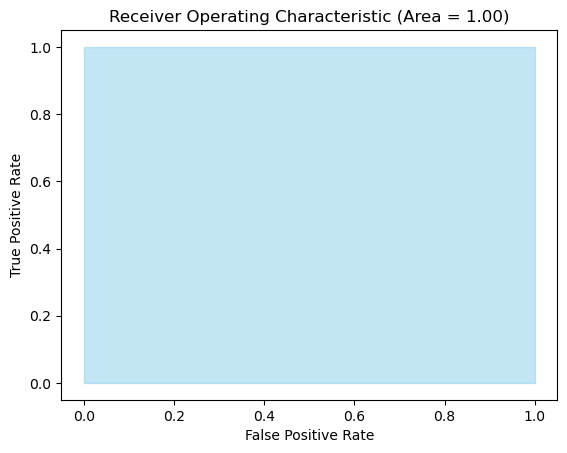

Accuracy scores for each fold:
Fold 1: 0.583
Fold 2: 0.600
Fold 3: 0.615
Fold 4: 0.634
Fold 5: 0.592

Average accuracy: 0.605

Average precision: 0.605
Average Recall: 0.634
Average F1 Score: 0.616


In [33]:
##################################KFOLD##################################################
##################################KFOLD##################################################
##################################KFOLD##################################################

from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import joblib
from sklearn.metrics import recall_score, f1_score, confusion_matrix
import csv

# Assume X_sm and Y_sm are your features and labels respectively

# Create an SVM model
#svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')

# Create an c4.5 decision tree
clf = DecisionTreeClassifier(
    class_weight=None,
    criterion= 'gini',
    max_depth= None,
    max_features= None,
    min_samples_leaf=1, 
    min_samples_split=2,
    random_state = 42,
    splitter= 'best',
    
)

svm_model=clf

# Define 10-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)


########################################################  AUC  #############################################
########################################################  AUC  #############################################
########################################################  AUC  #############################################


svm_model.fit(X, Y)

# Obtain predicted probabilities for each class
y_pred_prob = svm_model.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr, tpr, _ = roc_curve(Y_test, y_pred_prob[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Fill the area under the ROC curve
plt.fill_between(fpr, tpr, color='skyblue', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Area = %0.2f)' % roc_auc)
plt.show()


########################################################AUC#############################################
########################################################AUC#############################################
########################################################AUC#############################################




# Perform 10-fold cross-validation
#accuracy_scores = cross_val_score(svm_model, X_sm, Y_sm, cv=kf, scoring='precision')
accuracy_scores = cross_val_score(svm_model, X, Y, cv=kf, scoring='precision')

precision_scores = cross_val_score(svm_model, X, Y, cv=kf, scoring='precision')

recall_scores = cross_val_score(svm_model, X, Y, cv=kf, scoring='recall')
f1_scores = cross_val_score(svm_model, X, Y, cv=kf, scoring='f1')

# Print the accuracy for each fold
print("Accuracy scores for each fold:")
for i, score in enumerate(accuracy_scores, 1):
    print(f"Fold {i}: {score:.3f}")

# Print the average accuracy across all folds
print(f"\nAverage accuracy: {np.mean(accuracy_scores):.3f}")
print(f"\nAverage precision: {np.mean(precision_scores):.3f}")

print(f"Average Recall: {np.mean(recall_scores):.3f}")
print(f"Average F1 Score: {np.mean(f1_scores):.3f}")

# If satisfied with the average accuracy, you might choose to retrain the model on the entire dataset
#svm_model.fit(X_sm, Y_sm)
svm_model.fit(X, Y)

# Save the retrained model
joblib.dump(svm_model, 'svm_model_final.joblib')

#####################################Save AUC data ################################
#####################################Save AUC data ################################
#####################################Save AUC data ################################

# Save ROC data to a CSV file
def save_data(file_path, fpr, tpr, roc_auc):
    with open(file_path, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(fpr)
        writer.writerow(tpr)
        writer.writerow([roc_auc])

save_data('decision_tree_roc_data.csv', fpr, tpr, roc_auc)

#####################################Save AUC data ################################
#####################################Save AUC data ################################
#####################################Save AUC data ################################

In [ ]:

################################### GridsearchCV ,XGBOOST ######################################
################################### GridsearchCV ,XGBOOST ######################################
################################### GridsearchCV ,XGBOOST ######################################


from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import sklearn
import joblib
from xgboost import XGBClassifier



# Parameter grid for GridSearchCV

param_grid = {
    'learning_rate': [0.1, 0.05],
    'max_depth': [3, 4, 6],
    'min_child_weight': [1, 2, 3],
    'gamma': [0, 0.1, 0.3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 0.1, 1]
}

   
# Create an SVM model with verbose output during model fitting (verbose=1 for some output, higher for more)
xgb = XGBClassifier()
svm_model=xgb

# Define 10-fold cross-validation
kf = KFold(n_splits=2, shuffle=True, random_state=42)

# Configure GridSearchCV with increased verbosity for more detailed search output
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='precision', cv=kf, verbose=3, n_jobs=-1)


# Perform the search
grid_search.fit(X, Y)

# Results
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.3f}".format(grid_search.best_score_))

# Best model (retrained on the entire dataset)
best_model = grid_search.best_estimator_


Fitting 2 folds for each of 2916 candidates, totalling 5832 fits


Learning rate set to 0.007011
0:	learn: 0.6919566	total: 130ms	remaining: 2m 10s
1:	learn: 0.6906971	total: 154ms	remaining: 1m 16s
2:	learn: 0.6895457	total: 176ms	remaining: 58.5s
3:	learn: 0.6884506	total: 193ms	remaining: 48.2s
4:	learn: 0.6874069	total: 207ms	remaining: 41.2s
5:	learn: 0.6863460	total: 218ms	remaining: 36.1s
6:	learn: 0.6852567	total: 231ms	remaining: 32.8s
7:	learn: 0.6843335	total: 239ms	remaining: 29.7s
8:	learn: 0.6833707	total: 248ms	remaining: 27.3s
9:	learn: 0.6819476	total: 255ms	remaining: 25.3s
10:	learn: 0.6807885	total: 263ms	remaining: 23.6s
11:	learn: 0.6796651	total: 270ms	remaining: 22.3s
12:	learn: 0.6785291	total: 279ms	remaining: 21.1s
13:	learn: 0.6774713	total: 286ms	remaining: 20.1s
14:	learn: 0.6766777	total: 308ms	remaining: 20.2s
15:	learn: 0.6757311	total: 315ms	remaining: 19.3s
16:	learn: 0.6749582	total: 321ms	remaining: 18.6s
17:	learn: 0.6742330	total: 328ms	remaining: 17.9s
18:	learn: 0.6731858	total: 335ms	remaining: 17.3s
19:	learn

174:	learn: 0.5790519	total: 2.35s	remaining: 11.1s
175:	learn: 0.5784876	total: 2.36s	remaining: 11s
176:	learn: 0.5781264	total: 2.37s	remaining: 11s
177:	learn: 0.5775882	total: 2.37s	remaining: 11s
178:	learn: 0.5769743	total: 2.38s	remaining: 10.9s
179:	learn: 0.5767204	total: 2.39s	remaining: 10.9s
180:	learn: 0.5765440	total: 2.4s	remaining: 10.8s
181:	learn: 0.5762896	total: 2.4s	remaining: 10.8s
182:	learn: 0.5757615	total: 2.41s	remaining: 10.8s
183:	learn: 0.5755277	total: 2.42s	remaining: 10.7s
184:	learn: 0.5752536	total: 2.43s	remaining: 10.7s
185:	learn: 0.5750134	total: 2.44s	remaining: 10.7s
186:	learn: 0.5746067	total: 2.45s	remaining: 10.6s
187:	learn: 0.5741486	total: 2.46s	remaining: 10.6s
188:	learn: 0.5737888	total: 2.46s	remaining: 10.6s
189:	learn: 0.5734106	total: 2.47s	remaining: 10.5s
190:	learn: 0.5730894	total: 2.48s	remaining: 10.5s
191:	learn: 0.5727248	total: 2.49s	remaining: 10.5s
192:	learn: 0.5724238	total: 2.5s	remaining: 10.4s
193:	learn: 0.5722590

333:	learn: 0.5300490	total: 3.99s	remaining: 7.96s
334:	learn: 0.5298026	total: 4s	remaining: 7.94s
335:	learn: 0.5295733	total: 4.01s	remaining: 7.92s
336:	learn: 0.5291543	total: 4.02s	remaining: 7.9s
337:	learn: 0.5289476	total: 4.02s	remaining: 7.88s
338:	learn: 0.5287227	total: 4.03s	remaining: 7.86s
339:	learn: 0.5283187	total: 4.04s	remaining: 7.84s
340:	learn: 0.5281189	total: 4.04s	remaining: 7.82s
341:	learn: 0.5277826	total: 4.05s	remaining: 7.79s
342:	learn: 0.5274966	total: 4.06s	remaining: 7.77s
343:	learn: 0.5271898	total: 4.06s	remaining: 7.75s
344:	learn: 0.5269013	total: 4.07s	remaining: 7.73s
345:	learn: 0.5267025	total: 4.08s	remaining: 7.71s
346:	learn: 0.5264560	total: 4.08s	remaining: 7.68s
347:	learn: 0.5261294	total: 4.09s	remaining: 7.66s
348:	learn: 0.5257595	total: 4.1s	remaining: 7.64s
349:	learn: 0.5253584	total: 4.1s	remaining: 7.62s
350:	learn: 0.5250466	total: 4.11s	remaining: 7.6s
351:	learn: 0.5247720	total: 4.12s	remaining: 7.58s
352:	learn: 0.52435

494:	learn: 0.4897591	total: 6.53s	remaining: 6.67s
495:	learn: 0.4894441	total: 6.56s	remaining: 6.66s
496:	learn: 0.4892525	total: 6.57s	remaining: 6.65s
497:	learn: 0.4890359	total: 6.59s	remaining: 6.64s
498:	learn: 0.4888245	total: 6.61s	remaining: 6.64s
499:	learn: 0.4886975	total: 6.63s	remaining: 6.63s
500:	learn: 0.4884472	total: 6.64s	remaining: 6.62s
501:	learn: 0.4882192	total: 6.66s	remaining: 6.61s
502:	learn: 0.4878596	total: 6.67s	remaining: 6.6s
503:	learn: 0.4876865	total: 6.69s	remaining: 6.59s
504:	learn: 0.4874656	total: 6.71s	remaining: 6.58s
505:	learn: 0.4872258	total: 6.73s	remaining: 6.57s
506:	learn: 0.4870632	total: 6.75s	remaining: 6.56s
507:	learn: 0.4867521	total: 6.77s	remaining: 6.55s
508:	learn: 0.4864111	total: 6.79s	remaining: 6.54s
509:	learn: 0.4863025	total: 6.8s	remaining: 6.53s
510:	learn: 0.4860769	total: 6.82s	remaining: 6.53s
511:	learn: 0.4858512	total: 6.84s	remaining: 6.52s
512:	learn: 0.4856025	total: 6.85s	remaining: 6.51s
513:	learn: 0.

653:	learn: 0.4543677	total: 9.47s	remaining: 5.01s
654:	learn: 0.4542327	total: 9.49s	remaining: 5s
655:	learn: 0.4540006	total: 9.51s	remaining: 4.99s
656:	learn: 0.4536364	total: 9.53s	remaining: 4.97s
657:	learn: 0.4534182	total: 9.55s	remaining: 4.96s
658:	learn: 0.4530995	total: 9.57s	remaining: 4.95s
659:	learn: 0.4528891	total: 9.59s	remaining: 4.94s
660:	learn: 0.4527354	total: 9.6s	remaining: 4.92s
661:	learn: 0.4525196	total: 9.62s	remaining: 4.91s
662:	learn: 0.4522627	total: 9.64s	remaining: 4.9s
663:	learn: 0.4519584	total: 9.66s	remaining: 4.89s
664:	learn: 0.4517268	total: 9.68s	remaining: 4.88s
665:	learn: 0.4514168	total: 9.7s	remaining: 4.86s
666:	learn: 0.4511767	total: 9.72s	remaining: 4.85s
667:	learn: 0.4509885	total: 9.74s	remaining: 4.84s
668:	learn: 0.4507593	total: 9.75s	remaining: 4.82s
669:	learn: 0.4505516	total: 9.77s	remaining: 4.81s
670:	learn: 0.4503892	total: 9.79s	remaining: 4.8s
671:	learn: 0.4502050	total: 9.81s	remaining: 4.79s
672:	learn: 0.45002

816:	learn: 0.4201232	total: 12.5s	remaining: 2.79s
817:	learn: 0.4198734	total: 12.5s	remaining: 2.77s
818:	learn: 0.4196121	total: 12.5s	remaining: 2.76s
819:	learn: 0.4192053	total: 12.5s	remaining: 2.74s
820:	learn: 0.4190239	total: 12.5s	remaining: 2.73s
821:	learn: 0.4188555	total: 12.5s	remaining: 2.71s
822:	learn: 0.4185858	total: 12.6s	remaining: 2.7s
823:	learn: 0.4183451	total: 12.6s	remaining: 2.69s
824:	learn: 0.4181101	total: 12.6s	remaining: 2.67s
825:	learn: 0.4176981	total: 12.6s	remaining: 2.65s
826:	learn: 0.4174897	total: 12.6s	remaining: 2.64s
827:	learn: 0.4173074	total: 12.6s	remaining: 2.63s
828:	learn: 0.4172124	total: 12.7s	remaining: 2.61s
829:	learn: 0.4169525	total: 12.7s	remaining: 2.6s
830:	learn: 0.4166775	total: 12.7s	remaining: 2.58s
831:	learn: 0.4163701	total: 12.7s	remaining: 2.57s
832:	learn: 0.4162275	total: 12.7s	remaining: 2.55s
833:	learn: 0.4160809	total: 12.8s	remaining: 2.54s
834:	learn: 0.4158236	total: 12.8s	remaining: 2.52s
835:	learn: 0.

983:	learn: 0.3811607	total: 15.4s	remaining: 251ms
984:	learn: 0.3809258	total: 15.4s	remaining: 235ms
985:	learn: 0.3807393	total: 15.5s	remaining: 219ms
986:	learn: 0.3805156	total: 15.5s	remaining: 204ms
987:	learn: 0.3803110	total: 15.5s	remaining: 188ms
988:	learn: 0.3801127	total: 15.5s	remaining: 172ms
989:	learn: 0.3799168	total: 15.5s	remaining: 157ms
990:	learn: 0.3796714	total: 15.5s	remaining: 141ms
991:	learn: 0.3793209	total: 15.6s	remaining: 125ms
992:	learn: 0.3791228	total: 15.6s	remaining: 110ms
993:	learn: 0.3788180	total: 15.6s	remaining: 94.2ms
994:	learn: 0.3786337	total: 15.6s	remaining: 78.5ms
995:	learn: 0.3781952	total: 15.6s	remaining: 62.8ms
996:	learn: 0.3780780	total: 15.7s	remaining: 47.1ms
997:	learn: 0.3778669	total: 15.7s	remaining: 31.4ms
998:	learn: 0.3776824	total: 15.7s	remaining: 15.7ms
999:	learn: 0.3774157	total: 15.7s	remaining: 0us


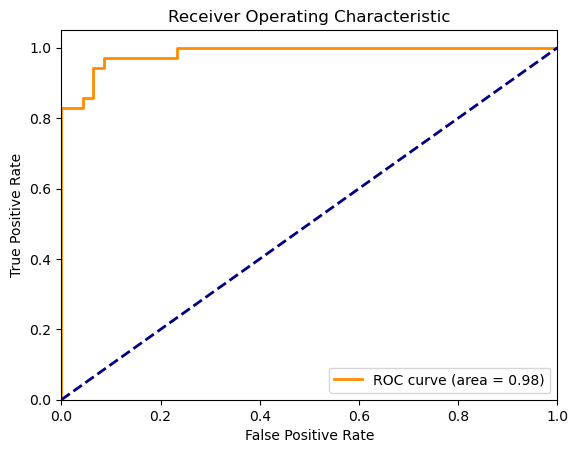

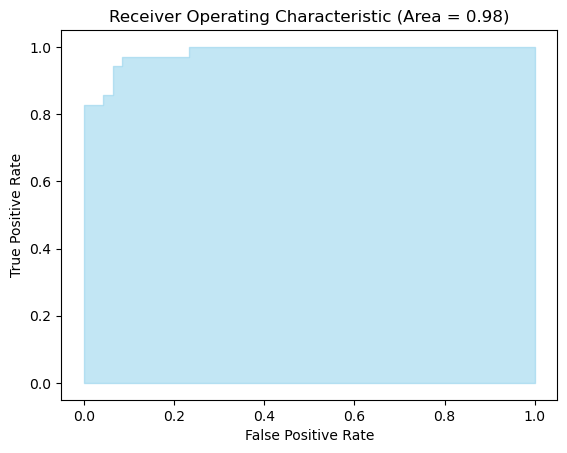

Learning rate set to 0.006367
0:	learn: 0.6922276	total: 20.8ms	remaining: 20.7s
1:	learn: 0.6911737	total: 36.9ms	remaining: 18.4s
2:	learn: 0.6901852	total: 59.8ms	remaining: 19.9s
3:	learn: 0.6891082	total: 79.5ms	remaining: 19.8s
4:	learn: 0.6877070	total: 98.8ms	remaining: 19.7s
5:	learn: 0.6868021	total: 118ms	remaining: 19.5s
6:	learn: 0.6857467	total: 137ms	remaining: 19.4s
7:	learn: 0.6846877	total: 154ms	remaining: 19.1s
8:	learn: 0.6834321	total: 174ms	remaining: 19.2s
9:	learn: 0.6825951	total: 191ms	remaining: 18.9s
10:	learn: 0.6816287	total: 212ms	remaining: 19s
11:	learn: 0.6805001	total: 231ms	remaining: 19s
12:	learn: 0.6790976	total: 249ms	remaining: 18.9s
13:	learn: 0.6781357	total: 266ms	remaining: 18.8s
14:	learn: 0.6772597	total: 280ms	remaining: 18.4s
15:	learn: 0.6764028	total: 295ms	remaining: 18.2s
16:	learn: 0.6754111	total: 313ms	remaining: 18.1s
17:	learn: 0.6744404	total: 327ms	remaining: 17.9s
18:	learn: 0.6736970	total: 344ms	remaining: 17.8s
19:	learn:

163:	learn: 0.5851858	total: 2.96s	remaining: 15.1s
164:	learn: 0.5848615	total: 2.98s	remaining: 15.1s
165:	learn: 0.5843985	total: 3s	remaining: 15.1s
166:	learn: 0.5841115	total: 3.02s	remaining: 15.1s
167:	learn: 0.5837171	total: 3.04s	remaining: 15.1s
168:	learn: 0.5832683	total: 3.06s	remaining: 15s
169:	learn: 0.5830413	total: 3.07s	remaining: 15s
170:	learn: 0.5826011	total: 3.09s	remaining: 15s
171:	learn: 0.5820619	total: 3.11s	remaining: 15s
172:	learn: 0.5818464	total: 3.12s	remaining: 14.9s
173:	learn: 0.5815489	total: 3.14s	remaining: 14.9s
174:	learn: 0.5812465	total: 3.16s	remaining: 14.9s
175:	learn: 0.5807533	total: 3.17s	remaining: 14.9s
176:	learn: 0.5802873	total: 3.19s	remaining: 14.9s
177:	learn: 0.5798268	total: 3.21s	remaining: 14.8s
178:	learn: 0.5793735	total: 3.23s	remaining: 14.8s
179:	learn: 0.5789781	total: 3.25s	remaining: 14.8s
180:	learn: 0.5786686	total: 3.27s	remaining: 14.8s
181:	learn: 0.5778389	total: 3.29s	remaining: 14.8s
182:	learn: 0.5775627	t

326:	learn: 0.5286596	total: 5.88s	remaining: 12.1s
327:	learn: 0.5283694	total: 5.9s	remaining: 12.1s
328:	learn: 0.5280516	total: 5.92s	remaining: 12.1s
329:	learn: 0.5277895	total: 5.94s	remaining: 12.1s
330:	learn: 0.5274560	total: 5.95s	remaining: 12s
331:	learn: 0.5271258	total: 5.97s	remaining: 12s
332:	learn: 0.5269964	total: 5.99s	remaining: 12s
333:	learn: 0.5266267	total: 6.01s	remaining: 12s
334:	learn: 0.5264379	total: 6.03s	remaining: 12s
335:	learn: 0.5261229	total: 6.04s	remaining: 11.9s
336:	learn: 0.5259913	total: 6.06s	remaining: 11.9s
337:	learn: 0.5255989	total: 6.08s	remaining: 11.9s
338:	learn: 0.5252654	total: 6.1s	remaining: 11.9s
339:	learn: 0.5250934	total: 6.12s	remaining: 11.9s
340:	learn: 0.5248666	total: 6.14s	remaining: 11.9s
341:	learn: 0.5246695	total: 6.16s	remaining: 11.8s
342:	learn: 0.5244452	total: 6.18s	remaining: 11.8s
343:	learn: 0.5242851	total: 6.19s	remaining: 11.8s
344:	learn: 0.5240177	total: 6.21s	remaining: 11.8s
345:	learn: 0.5236799	to

495:	learn: 0.4865728	total: 8.83s	remaining: 8.97s
496:	learn: 0.4862951	total: 8.84s	remaining: 8.95s
497:	learn: 0.4860905	total: 8.86s	remaining: 8.93s
498:	learn: 0.4857746	total: 8.87s	remaining: 8.91s
499:	learn: 0.4854718	total: 8.89s	remaining: 8.89s
500:	learn: 0.4851824	total: 8.91s	remaining: 8.87s
501:	learn: 0.4850783	total: 8.93s	remaining: 8.85s
502:	learn: 0.4848703	total: 8.94s	remaining: 8.84s
503:	learn: 0.4846410	total: 8.96s	remaining: 8.82s
504:	learn: 0.4844563	total: 8.98s	remaining: 8.8s
505:	learn: 0.4842388	total: 9s	remaining: 8.78s
506:	learn: 0.4840873	total: 9.02s	remaining: 8.77s
507:	learn: 0.4838990	total: 9.03s	remaining: 8.75s
508:	learn: 0.4837380	total: 9.05s	remaining: 8.73s
509:	learn: 0.4834424	total: 9.07s	remaining: 8.71s
510:	learn: 0.4831888	total: 9.09s	remaining: 8.7s
511:	learn: 0.4828992	total: 9.11s	remaining: 8.68s
512:	learn: 0.4826222	total: 9.12s	remaining: 8.66s
513:	learn: 0.4823909	total: 9.14s	remaining: 8.64s
514:	learn: 0.482

657:	learn: 0.4504704	total: 11.8s	remaining: 6.13s
658:	learn: 0.4502694	total: 11.8s	remaining: 6.11s
659:	learn: 0.4500756	total: 11.8s	remaining: 6.1s
660:	learn: 0.4497334	total: 11.9s	remaining: 6.08s
661:	learn: 0.4494909	total: 11.9s	remaining: 6.06s
662:	learn: 0.4492656	total: 11.9s	remaining: 6.04s
663:	learn: 0.4490906	total: 11.9s	remaining: 6.02s
664:	learn: 0.4488184	total: 11.9s	remaining: 6s
665:	learn: 0.4486250	total: 11.9s	remaining: 5.99s
666:	learn: 0.4485040	total: 12s	remaining: 5.97s
667:	learn: 0.4482623	total: 12s	remaining: 5.95s
668:	learn: 0.4480341	total: 12s	remaining: 5.93s
669:	learn: 0.4478379	total: 12s	remaining: 5.91s
670:	learn: 0.4476873	total: 12s	remaining: 5.89s
671:	learn: 0.4475716	total: 12s	remaining: 5.88s
672:	learn: 0.4473842	total: 12.1s	remaining: 5.86s
673:	learn: 0.4471296	total: 12.1s	remaining: 5.84s
674:	learn: 0.4469947	total: 12.1s	remaining: 5.82s
675:	learn: 0.4467910	total: 12.1s	remaining: 5.8s
676:	learn: 0.4465462	total: 

826:	learn: 0.4138133	total: 14.7s	remaining: 3.08s
827:	learn: 0.4135196	total: 14.8s	remaining: 3.07s
828:	learn: 0.4132960	total: 14.8s	remaining: 3.05s
829:	learn: 0.4131209	total: 14.8s	remaining: 3.03s
830:	learn: 0.4127844	total: 14.8s	remaining: 3.02s
831:	learn: 0.4126457	total: 14.8s	remaining: 3s
832:	learn: 0.4124614	total: 14.9s	remaining: 2.98s
833:	learn: 0.4122263	total: 14.9s	remaining: 2.96s
834:	learn: 0.4119827	total: 14.9s	remaining: 2.95s
835:	learn: 0.4118263	total: 14.9s	remaining: 2.93s
836:	learn: 0.4115926	total: 15s	remaining: 2.91s
837:	learn: 0.4112914	total: 15s	remaining: 2.9s
838:	learn: 0.4110821	total: 15s	remaining: 2.88s
839:	learn: 0.4109043	total: 15s	remaining: 2.86s
840:	learn: 0.4106530	total: 15s	remaining: 2.84s
841:	learn: 0.4104577	total: 15.1s	remaining: 2.83s
842:	learn: 0.4102080	total: 15.1s	remaining: 2.81s
843:	learn: 0.4100666	total: 15.1s	remaining: 2.79s
844:	learn: 0.4097759	total: 15.1s	remaining: 2.77s
845:	learn: 0.4094492	tota

991:	learn: 0.3765678	total: 17.7s	remaining: 143ms
992:	learn: 0.3763604	total: 17.7s	remaining: 125ms
993:	learn: 0.3760206	total: 17.8s	remaining: 107ms
994:	learn: 0.3757367	total: 17.8s	remaining: 89.3ms
995:	learn: 0.3756106	total: 17.8s	remaining: 71.5ms
996:	learn: 0.3754483	total: 17.8s	remaining: 53.6ms
997:	learn: 0.3751881	total: 17.8s	remaining: 35.7ms
998:	learn: 0.3749918	total: 17.9s	remaining: 17.9ms
999:	learn: 0.3747130	total: 17.9s	remaining: 0us
Learning rate set to 0.006375
0:	learn: 0.6919248	total: 18.2ms	remaining: 18.2s
1:	learn: 0.6909432	total: 35.2ms	remaining: 17.6s
2:	learn: 0.6897159	total: 52.3ms	remaining: 17.4s
3:	learn: 0.6889365	total: 71.4ms	remaining: 17.8s
4:	learn: 0.6877888	total: 86.1ms	remaining: 17.1s
5:	learn: 0.6864672	total: 102ms	remaining: 16.9s
6:	learn: 0.6853048	total: 122ms	remaining: 17.3s
7:	learn: 0.6843227	total: 138ms	remaining: 17.1s
8:	learn: 0.6830481	total: 151ms	remaining: 16.6s
9:	learn: 0.6821571	total: 168ms	remaining: 

153:	learn: 0.5859721	total: 2.53s	remaining: 13.9s
154:	learn: 0.5856208	total: 2.55s	remaining: 13.9s
155:	learn: 0.5850944	total: 2.57s	remaining: 13.9s
156:	learn: 0.5846737	total: 2.59s	remaining: 13.9s
157:	learn: 0.5842387	total: 2.6s	remaining: 13.9s
158:	learn: 0.5836639	total: 2.62s	remaining: 13.9s
159:	learn: 0.5833316	total: 2.64s	remaining: 13.9s
160:	learn: 0.5829602	total: 2.66s	remaining: 13.9s
161:	learn: 0.5822793	total: 2.67s	remaining: 13.8s
162:	learn: 0.5817006	total: 2.69s	remaining: 13.8s
163:	learn: 0.5813166	total: 2.71s	remaining: 13.8s
164:	learn: 0.5808618	total: 2.73s	remaining: 13.8s
165:	learn: 0.5804663	total: 2.75s	remaining: 13.8s
166:	learn: 0.5801840	total: 2.77s	remaining: 13.8s
167:	learn: 0.5798440	total: 2.79s	remaining: 13.8s
168:	learn: 0.5793771	total: 2.81s	remaining: 13.8s
169:	learn: 0.5789487	total: 2.83s	remaining: 13.8s
170:	learn: 0.5785555	total: 2.84s	remaining: 13.8s
171:	learn: 0.5779304	total: 2.86s	remaining: 13.8s
172:	learn: 0

323:	learn: 0.5292282	total: 5.63s	remaining: 11.8s
324:	learn: 0.5289688	total: 5.64s	remaining: 11.7s
325:	learn: 0.5286413	total: 5.66s	remaining: 11.7s
326:	learn: 0.5284095	total: 5.67s	remaining: 11.7s
327:	learn: 0.5281824	total: 5.69s	remaining: 11.7s
328:	learn: 0.5277223	total: 5.71s	remaining: 11.6s
329:	learn: 0.5274488	total: 5.72s	remaining: 11.6s
330:	learn: 0.5271851	total: 5.74s	remaining: 11.6s
331:	learn: 0.5270221	total: 5.76s	remaining: 11.6s
332:	learn: 0.5268123	total: 5.78s	remaining: 11.6s
333:	learn: 0.5265102	total: 5.79s	remaining: 11.5s
334:	learn: 0.5260772	total: 5.81s	remaining: 11.5s
335:	learn: 0.5258591	total: 5.83s	remaining: 11.5s
336:	learn: 0.5255375	total: 5.84s	remaining: 11.5s
337:	learn: 0.5252241	total: 5.86s	remaining: 11.5s
338:	learn: 0.5249796	total: 5.88s	remaining: 11.5s
339:	learn: 0.5247272	total: 5.89s	remaining: 11.4s
340:	learn: 0.5245769	total: 5.91s	remaining: 11.4s
341:	learn: 0.5241541	total: 5.92s	remaining: 11.4s
342:	learn: 

485:	learn: 0.4866923	total: 8.62s	remaining: 9.12s
486:	learn: 0.4865240	total: 8.63s	remaining: 9.09s
487:	learn: 0.4862909	total: 8.65s	remaining: 9.07s
488:	learn: 0.4858948	total: 8.67s	remaining: 9.06s
489:	learn: 0.4856960	total: 8.68s	remaining: 9.04s
490:	learn: 0.4854170	total: 8.72s	remaining: 9.04s
491:	learn: 0.4851690	total: 8.74s	remaining: 9.02s
492:	learn: 0.4848761	total: 8.75s	remaining: 9s
493:	learn: 0.4846070	total: 8.77s	remaining: 8.99s
494:	learn: 0.4844262	total: 8.79s	remaining: 8.97s
495:	learn: 0.4842938	total: 8.81s	remaining: 8.95s
496:	learn: 0.4840745	total: 8.83s	remaining: 8.94s
497:	learn: 0.4839024	total: 8.85s	remaining: 8.92s
498:	learn: 0.4837101	total: 8.87s	remaining: 8.9s
499:	learn: 0.4835585	total: 8.89s	remaining: 8.89s
500:	learn: 0.4832391	total: 8.9s	remaining: 8.87s
501:	learn: 0.4830477	total: 8.92s	remaining: 8.85s
502:	learn: 0.4829490	total: 8.94s	remaining: 8.83s
503:	learn: 0.4826568	total: 8.96s	remaining: 8.82s
504:	learn: 0.482

655:	learn: 0.4477843	total: 11.3s	remaining: 5.95s
656:	learn: 0.4476235	total: 11.4s	remaining: 5.93s
657:	learn: 0.4473343	total: 11.4s	remaining: 5.92s
658:	learn: 0.4470134	total: 11.4s	remaining: 5.9s
659:	learn: 0.4468408	total: 11.4s	remaining: 5.88s
660:	learn: 0.4467152	total: 11.4s	remaining: 5.87s
661:	learn: 0.4464136	total: 11.5s	remaining: 5.85s
662:	learn: 0.4462085	total: 11.5s	remaining: 5.83s
663:	learn: 0.4460386	total: 11.5s	remaining: 5.81s
664:	learn: 0.4459000	total: 11.5s	remaining: 5.8s
665:	learn: 0.4457187	total: 11.5s	remaining: 5.78s
666:	learn: 0.4454601	total: 11.5s	remaining: 5.76s
667:	learn: 0.4452205	total: 11.6s	remaining: 5.74s
668:	learn: 0.4449722	total: 11.6s	remaining: 5.73s
669:	learn: 0.4448044	total: 11.6s	remaining: 5.71s
670:	learn: 0.4446135	total: 11.6s	remaining: 5.69s
671:	learn: 0.4444171	total: 11.6s	remaining: 5.67s
672:	learn: 0.4441628	total: 11.6s	remaining: 5.66s
673:	learn: 0.4439320	total: 11.7s	remaining: 5.64s
674:	learn: 0.

824:	learn: 0.4110277	total: 14s	remaining: 2.98s
825:	learn: 0.4108378	total: 14s	remaining: 2.96s
826:	learn: 0.4104013	total: 14.1s	remaining: 2.94s
827:	learn: 0.4102463	total: 14.1s	remaining: 2.93s
828:	learn: 0.4099239	total: 14.1s	remaining: 2.92s
829:	learn: 0.4096779	total: 14.2s	remaining: 2.9s
830:	learn: 0.4094633	total: 14.2s	remaining: 2.88s
831:	learn: 0.4093787	total: 14.2s	remaining: 2.87s
832:	learn: 0.4091498	total: 14.2s	remaining: 2.85s
833:	learn: 0.4090441	total: 14.2s	remaining: 2.84s
834:	learn: 0.4088257	total: 14.3s	remaining: 2.82s
835:	learn: 0.4086352	total: 14.3s	remaining: 2.8s
836:	learn: 0.4083384	total: 14.3s	remaining: 2.78s
837:	learn: 0.4081642	total: 14.3s	remaining: 2.77s
838:	learn: 0.4079950	total: 14.3s	remaining: 2.75s
839:	learn: 0.4078419	total: 14.4s	remaining: 2.73s
840:	learn: 0.4075388	total: 14.4s	remaining: 2.72s
841:	learn: 0.4073361	total: 14.4s	remaining: 2.7s
842:	learn: 0.4070616	total: 14.4s	remaining: 2.68s
843:	learn: 0.40683

994:	learn: 0.3722895	total: 16.1s	remaining: 80.9ms
995:	learn: 0.3720068	total: 16.1s	remaining: 64.7ms
996:	learn: 0.3718250	total: 16.1s	remaining: 48.5ms
997:	learn: 0.3715995	total: 16.1s	remaining: 32.3ms
998:	learn: 0.3713733	total: 16.1s	remaining: 16.1ms
999:	learn: 0.3711651	total: 16.1s	remaining: 0us
Learning rate set to 0.006375
0:	learn: 0.6919963	total: 10.9ms	remaining: 10.9s
1:	learn: 0.6909966	total: 22.7ms	remaining: 11.3s
2:	learn: 0.6897909	total: 36.5ms	remaining: 12.1s
3:	learn: 0.6887283	total: 55.7ms	remaining: 13.9s
4:	learn: 0.6876904	total: 71ms	remaining: 14.1s
5:	learn: 0.6863666	total: 88.2ms	remaining: 14.6s
6:	learn: 0.6853667	total: 102ms	remaining: 14.5s
7:	learn: 0.6842043	total: 119ms	remaining: 14.7s
8:	learn: 0.6834509	total: 138ms	remaining: 15.2s
9:	learn: 0.6822132	total: 155ms	remaining: 15.3s
10:	learn: 0.6813635	total: 177ms	remaining: 15.9s
11:	learn: 0.6803878	total: 190ms	remaining: 15.7s
12:	learn: 0.6793886	total: 204ms	remaining: 15.5

169:	learn: 0.5861302	total: 1.65s	remaining: 8.08s
170:	learn: 0.5857975	total: 1.66s	remaining: 8.06s
171:	learn: 0.5854524	total: 1.67s	remaining: 8.05s
172:	learn: 0.5848081	total: 1.68s	remaining: 8.04s
173:	learn: 0.5845173	total: 1.69s	remaining: 8.03s
174:	learn: 0.5840270	total: 1.7s	remaining: 8.02s
175:	learn: 0.5836459	total: 1.71s	remaining: 8s
176:	learn: 0.5832323	total: 1.72s	remaining: 8s
177:	learn: 0.5827450	total: 1.73s	remaining: 7.98s
178:	learn: 0.5824605	total: 1.74s	remaining: 7.97s
179:	learn: 0.5820603	total: 1.75s	remaining: 7.96s
180:	learn: 0.5817979	total: 1.76s	remaining: 7.95s
181:	learn: 0.5813425	total: 1.76s	remaining: 7.93s
182:	learn: 0.5809697	total: 1.77s	remaining: 7.92s
183:	learn: 0.5804873	total: 1.78s	remaining: 7.91s
184:	learn: 0.5801721	total: 1.79s	remaining: 7.89s
185:	learn: 0.5796614	total: 1.8s	remaining: 7.88s
186:	learn: 0.5792005	total: 1.81s	remaining: 7.87s
187:	learn: 0.5786645	total: 1.82s	remaining: 7.85s
188:	learn: 0.578230

347:	learn: 0.5284387	total: 3.55s	remaining: 6.65s
348:	learn: 0.5280438	total: 3.56s	remaining: 6.65s
349:	learn: 0.5276132	total: 3.58s	remaining: 6.65s
350:	learn: 0.5274433	total: 3.6s	remaining: 6.65s
351:	learn: 0.5271365	total: 3.61s	remaining: 6.65s
352:	learn: 0.5268416	total: 3.63s	remaining: 6.66s
353:	learn: 0.5265316	total: 3.65s	remaining: 6.66s
354:	learn: 0.5263210	total: 3.67s	remaining: 6.67s
355:	learn: 0.5260686	total: 3.69s	remaining: 6.67s
356:	learn: 0.5258084	total: 3.71s	remaining: 6.67s
357:	learn: 0.5256706	total: 3.73s	remaining: 6.68s
358:	learn: 0.5253766	total: 3.74s	remaining: 6.68s
359:	learn: 0.5250825	total: 3.76s	remaining: 6.69s
360:	learn: 0.5248161	total: 3.78s	remaining: 6.7s
361:	learn: 0.5246310	total: 3.79s	remaining: 6.69s
362:	learn: 0.5242535	total: 3.82s	remaining: 6.7s
363:	learn: 0.5239274	total: 3.83s	remaining: 6.69s
364:	learn: 0.5236883	total: 3.85s	remaining: 6.7s
365:	learn: 0.5234267	total: 3.87s	remaining: 6.7s
366:	learn: 0.523

524:	learn: 0.4844764	total: 5.86s	remaining: 5.31s
525:	learn: 0.4842503	total: 5.87s	remaining: 5.29s
526:	learn: 0.4840711	total: 5.88s	remaining: 5.28s
527:	learn: 0.4838470	total: 5.88s	remaining: 5.26s
528:	learn: 0.4836447	total: 5.89s	remaining: 5.25s
529:	learn: 0.4834550	total: 5.9s	remaining: 5.23s
530:	learn: 0.4831660	total: 5.91s	remaining: 5.21s
531:	learn: 0.4829104	total: 5.91s	remaining: 5.2s
532:	learn: 0.4827328	total: 5.92s	remaining: 5.18s
533:	learn: 0.4824842	total: 5.92s	remaining: 5.17s
534:	learn: 0.4822625	total: 5.93s	remaining: 5.15s
535:	learn: 0.4820199	total: 5.94s	remaining: 5.14s
536:	learn: 0.4818420	total: 5.94s	remaining: 5.12s
537:	learn: 0.4816063	total: 5.95s	remaining: 5.11s
538:	learn: 0.4814779	total: 5.96s	remaining: 5.09s
539:	learn: 0.4812005	total: 5.96s	remaining: 5.08s
540:	learn: 0.4808439	total: 5.97s	remaining: 5.06s
541:	learn: 0.4806219	total: 5.97s	remaining: 5.05s
542:	learn: 0.4804062	total: 5.98s	remaining: 5.04s
543:	learn: 0.

700:	learn: 0.4455511	total: 7.3s	remaining: 3.12s
701:	learn: 0.4453474	total: 7.31s	remaining: 3.1s
702:	learn: 0.4451578	total: 7.32s	remaining: 3.09s
703:	learn: 0.4449593	total: 7.33s	remaining: 3.08s
704:	learn: 0.4446001	total: 7.33s	remaining: 3.07s
705:	learn: 0.4444152	total: 7.34s	remaining: 3.06s
706:	learn: 0.4442313	total: 7.35s	remaining: 3.05s
707:	learn: 0.4440287	total: 7.36s	remaining: 3.04s
708:	learn: 0.4437627	total: 7.37s	remaining: 3.02s
709:	learn: 0.4435323	total: 7.38s	remaining: 3.01s
710:	learn: 0.4434114	total: 7.38s	remaining: 3s
711:	learn: 0.4432292	total: 7.39s	remaining: 2.99s
712:	learn: 0.4430783	total: 7.4s	remaining: 2.98s
713:	learn: 0.4429150	total: 7.41s	remaining: 2.97s
714:	learn: 0.4426899	total: 7.42s	remaining: 2.96s
715:	learn: 0.4425550	total: 7.42s	remaining: 2.94s
716:	learn: 0.4424324	total: 7.43s	remaining: 2.93s
717:	learn: 0.4422037	total: 7.44s	remaining: 2.92s
718:	learn: 0.4421178	total: 7.45s	remaining: 2.91s
719:	learn: 0.4419

875:	learn: 0.4089985	total: 8.98s	remaining: 1.27s
876:	learn: 0.4087708	total: 8.99s	remaining: 1.26s
877:	learn: 0.4084390	total: 9.01s	remaining: 1.25s
878:	learn: 0.4082573	total: 9.02s	remaining: 1.24s
879:	learn: 0.4080318	total: 9.04s	remaining: 1.23s
880:	learn: 0.4077420	total: 9.05s	remaining: 1.22s
881:	learn: 0.4074803	total: 9.07s	remaining: 1.21s
882:	learn: 0.4073092	total: 9.09s	remaining: 1.2s
883:	learn: 0.4071220	total: 9.1s	remaining: 1.19s
884:	learn: 0.4069694	total: 9.12s	remaining: 1.18s
885:	learn: 0.4067386	total: 9.13s	remaining: 1.18s
886:	learn: 0.4064434	total: 9.15s	remaining: 1.17s
887:	learn: 0.4062062	total: 9.16s	remaining: 1.15s
888:	learn: 0.4059617	total: 9.17s	remaining: 1.14s
889:	learn: 0.4056812	total: 9.18s	remaining: 1.13s
890:	learn: 0.4054005	total: 9.19s	remaining: 1.12s
891:	learn: 0.4052207	total: 9.2s	remaining: 1.11s
892:	learn: 0.4049445	total: 9.21s	remaining: 1.1s
893:	learn: 0.4047354	total: 9.22s	remaining: 1.09s
894:	learn: 0.40

37:	learn: 0.6568146	total: 638ms	remaining: 16.1s
38:	learn: 0.6560075	total: 657ms	remaining: 16.2s
39:	learn: 0.6548709	total: 672ms	remaining: 16.1s
40:	learn: 0.6543306	total: 691ms	remaining: 16.2s
41:	learn: 0.6532511	total: 711ms	remaining: 16.2s
42:	learn: 0.6519248	total: 730ms	remaining: 16.2s
43:	learn: 0.6511900	total: 749ms	remaining: 16.3s
44:	learn: 0.6505081	total: 769ms	remaining: 16.3s
45:	learn: 0.6497981	total: 786ms	remaining: 16.3s
46:	learn: 0.6491778	total: 805ms	remaining: 16.3s
47:	learn: 0.6482512	total: 822ms	remaining: 16.3s
48:	learn: 0.6477039	total: 840ms	remaining: 16.3s
49:	learn: 0.6469931	total: 860ms	remaining: 16.3s
50:	learn: 0.6461697	total: 877ms	remaining: 16.3s
51:	learn: 0.6455756	total: 895ms	remaining: 16.3s
52:	learn: 0.6446684	total: 927ms	remaining: 16.6s
53:	learn: 0.6437452	total: 949ms	remaining: 16.6s
54:	learn: 0.6428484	total: 969ms	remaining: 16.7s
55:	learn: 0.6420986	total: 993ms	remaining: 16.7s
56:	learn: 0.6413515	total: 1.0

209:	learn: 0.5663493	total: 3.64s	remaining: 13.7s
210:	learn: 0.5659376	total: 3.65s	remaining: 13.7s
211:	learn: 0.5656012	total: 3.67s	remaining: 13.6s
212:	learn: 0.5653471	total: 3.69s	remaining: 13.6s
213:	learn: 0.5649711	total: 3.71s	remaining: 13.6s
214:	learn: 0.5646460	total: 3.73s	remaining: 13.6s
215:	learn: 0.5644294	total: 3.74s	remaining: 13.6s
216:	learn: 0.5640937	total: 3.76s	remaining: 13.6s
217:	learn: 0.5639258	total: 3.78s	remaining: 13.6s
218:	learn: 0.5636188	total: 3.8s	remaining: 13.6s
219:	learn: 0.5632622	total: 3.82s	remaining: 13.5s
220:	learn: 0.5627679	total: 3.83s	remaining: 13.5s
221:	learn: 0.5624365	total: 3.85s	remaining: 13.5s
222:	learn: 0.5622903	total: 3.87s	remaining: 13.5s
223:	learn: 0.5620054	total: 3.89s	remaining: 13.5s
224:	learn: 0.5617266	total: 3.91s	remaining: 13.5s
225:	learn: 0.5614845	total: 3.92s	remaining: 13.4s
226:	learn: 0.5611245	total: 3.94s	remaining: 13.4s
227:	learn: 0.5608818	total: 3.96s	remaining: 13.4s
228:	learn: 0

373:	learn: 0.5157747	total: 6.64s	remaining: 11.1s
374:	learn: 0.5154233	total: 6.66s	remaining: 11.1s
375:	learn: 0.5151659	total: 6.68s	remaining: 11.1s
376:	learn: 0.5148386	total: 6.7s	remaining: 11.1s
377:	learn: 0.5145718	total: 6.72s	remaining: 11.1s
378:	learn: 0.5143104	total: 6.74s	remaining: 11s
379:	learn: 0.5140898	total: 6.75s	remaining: 11s
380:	learn: 0.5137254	total: 6.77s	remaining: 11s
381:	learn: 0.5135274	total: 6.79s	remaining: 11s
382:	learn: 0.5133117	total: 6.81s	remaining: 11s
383:	learn: 0.5129741	total: 6.83s	remaining: 11s
384:	learn: 0.5127684	total: 6.85s	remaining: 10.9s
385:	learn: 0.5124851	total: 6.87s	remaining: 10.9s
386:	learn: 0.5121784	total: 6.89s	remaining: 10.9s
387:	learn: 0.5118651	total: 6.9s	remaining: 10.9s
388:	learn: 0.5116199	total: 6.92s	remaining: 10.9s
389:	learn: 0.5113334	total: 6.93s	remaining: 10.8s
390:	learn: 0.5111050	total: 6.95s	remaining: 10.8s
391:	learn: 0.5106994	total: 6.97s	remaining: 10.8s
392:	learn: 0.5104784	tota

537:	learn: 0.4745140	total: 9.4s	remaining: 8.08s
538:	learn: 0.4742486	total: 9.42s	remaining: 8.06s
539:	learn: 0.4740591	total: 9.44s	remaining: 8.04s
540:	learn: 0.4738353	total: 9.46s	remaining: 8.02s
541:	learn: 0.4736558	total: 9.47s	remaining: 8s
542:	learn: 0.4734527	total: 9.49s	remaining: 7.98s
543:	learn: 0.4731659	total: 9.5s	remaining: 7.97s
544:	learn: 0.4729665	total: 9.52s	remaining: 7.95s
545:	learn: 0.4727192	total: 9.54s	remaining: 7.93s
546:	learn: 0.4724274	total: 9.56s	remaining: 7.91s
547:	learn: 0.4722108	total: 9.58s	remaining: 7.9s
548:	learn: 0.4720863	total: 9.59s	remaining: 7.88s
549:	learn: 0.4717481	total: 9.61s	remaining: 7.86s
550:	learn: 0.4715203	total: 9.63s	remaining: 7.84s
551:	learn: 0.4712320	total: 9.64s	remaining: 7.83s
552:	learn: 0.4710385	total: 9.66s	remaining: 7.81s
553:	learn: 0.4708192	total: 9.68s	remaining: 7.79s
554:	learn: 0.4704861	total: 9.7s	remaining: 7.78s
555:	learn: 0.4702801	total: 9.72s	remaining: 7.76s
556:	learn: 0.47017

696:	learn: 0.4394708	total: 12.1s	remaining: 5.26s
697:	learn: 0.4391891	total: 12.1s	remaining: 5.25s
698:	learn: 0.4389984	total: 12.1s	remaining: 5.23s
699:	learn: 0.4388735	total: 12.2s	remaining: 5.21s
700:	learn: 0.4386720	total: 12.2s	remaining: 5.19s
701:	learn: 0.4384902	total: 12.2s	remaining: 5.17s
702:	learn: 0.4381902	total: 12.2s	remaining: 5.16s
703:	learn: 0.4379691	total: 12.2s	remaining: 5.14s
704:	learn: 0.4377319	total: 12.2s	remaining: 5.12s
705:	learn: 0.4375549	total: 12.3s	remaining: 5.11s
706:	learn: 0.4373122	total: 12.3s	remaining: 5.09s
707:	learn: 0.4371224	total: 12.3s	remaining: 5.07s
708:	learn: 0.4367926	total: 12.3s	remaining: 5.05s
709:	learn: 0.4365007	total: 12.3s	remaining: 5.04s
710:	learn: 0.4362579	total: 12.4s	remaining: 5.02s
711:	learn: 0.4360463	total: 12.4s	remaining: 5s
712:	learn: 0.4358403	total: 12.4s	remaining: 4.99s
713:	learn: 0.4354351	total: 12.4s	remaining: 4.97s
714:	learn: 0.4352365	total: 12.4s	remaining: 4.95s
715:	learn: 0.4

862:	learn: 0.4025154	total: 15s	remaining: 2.38s
863:	learn: 0.4022653	total: 15s	remaining: 2.36s
864:	learn: 0.4019757	total: 15s	remaining: 2.35s
865:	learn: 0.4017342	total: 15s	remaining: 2.33s
866:	learn: 0.4015710	total: 15.1s	remaining: 2.31s
867:	learn: 0.4014161	total: 15.1s	remaining: 2.29s
868:	learn: 0.4011938	total: 15.1s	remaining: 2.28s
869:	learn: 0.4010224	total: 15.1s	remaining: 2.26s
870:	learn: 0.4008149	total: 15.1s	remaining: 2.24s
871:	learn: 0.4005637	total: 15.2s	remaining: 2.22s
872:	learn: 0.4003644	total: 15.2s	remaining: 2.21s
873:	learn: 0.4001405	total: 15.2s	remaining: 2.19s
874:	learn: 0.3999766	total: 15.2s	remaining: 2.17s
875:	learn: 0.3997596	total: 15.2s	remaining: 2.15s
876:	learn: 0.3995261	total: 15.2s	remaining: 2.14s
877:	learn: 0.3993844	total: 15.3s	remaining: 2.12s
878:	learn: 0.3991575	total: 15.3s	remaining: 2.1s
879:	learn: 0.3988396	total: 15.3s	remaining: 2.08s
880:	learn: 0.3984637	total: 15.3s	remaining: 2.07s
881:	learn: 0.3982249

23:	learn: 0.6658683	total: 411ms	remaining: 16.7s
24:	learn: 0.6650062	total: 422ms	remaining: 16.5s
25:	learn: 0.6641720	total: 432ms	remaining: 16.2s
26:	learn: 0.6631385	total: 441ms	remaining: 15.9s
27:	learn: 0.6622109	total: 453ms	remaining: 15.7s
28:	learn: 0.6612088	total: 463ms	remaining: 15.5s
29:	learn: 0.6603437	total: 474ms	remaining: 15.3s
30:	learn: 0.6591885	total: 487ms	remaining: 15.2s
31:	learn: 0.6583177	total: 500ms	remaining: 15.1s
32:	learn: 0.6574490	total: 512ms	remaining: 15s
33:	learn: 0.6567133	total: 526ms	remaining: 15s
34:	learn: 0.6555383	total: 543ms	remaining: 15s
35:	learn: 0.6545969	total: 559ms	remaining: 15s
36:	learn: 0.6537259	total: 594ms	remaining: 15.5s
37:	learn: 0.6529773	total: 614ms	remaining: 15.5s
38:	learn: 0.6520987	total: 635ms	remaining: 15.7s
39:	learn: 0.6513013	total: 652ms	remaining: 15.6s
40:	learn: 0.6503142	total: 665ms	remaining: 15.6s
41:	learn: 0.6495047	total: 677ms	remaining: 15.4s
42:	learn: 0.6487467	total: 688ms	remai

194:	learn: 0.5643503	total: 2.66s	remaining: 11s
195:	learn: 0.5640594	total: 2.68s	remaining: 11s
196:	learn: 0.5637972	total: 2.7s	remaining: 11s
197:	learn: 0.5634967	total: 2.72s	remaining: 11s
198:	learn: 0.5632053	total: 2.74s	remaining: 11s
199:	learn: 0.5628403	total: 2.75s	remaining: 11s
200:	learn: 0.5623922	total: 2.77s	remaining: 11s
201:	learn: 0.5619494	total: 2.79s	remaining: 11s
202:	learn: 0.5615100	total: 2.81s	remaining: 11s
203:	learn: 0.5611695	total: 2.83s	remaining: 11s
204:	learn: 0.5610836	total: 2.84s	remaining: 11s
205:	learn: 0.5608644	total: 2.86s	remaining: 11s
206:	learn: 0.5606950	total: 2.87s	remaining: 11s
207:	learn: 0.5603418	total: 2.89s	remaining: 11s
208:	learn: 0.5600541	total: 2.9s	remaining: 11s
209:	learn: 0.5596714	total: 2.92s	remaining: 11s
210:	learn: 0.5594794	total: 2.93s	remaining: 11s
211:	learn: 0.5591048	total: 2.95s	remaining: 11s
212:	learn: 0.5586400	total: 2.96s	remaining: 11s
213:	learn: 0.5582634	total: 2.98s	remaining: 11s
21

363:	learn: 0.5124964	total: 5.63s	remaining: 9.83s
364:	learn: 0.5122435	total: 5.64s	remaining: 9.82s
365:	learn: 0.5120744	total: 5.66s	remaining: 9.8s
366:	learn: 0.5118597	total: 5.67s	remaining: 9.78s
367:	learn: 0.5116802	total: 5.69s	remaining: 9.77s
368:	learn: 0.5114041	total: 5.71s	remaining: 9.76s
369:	learn: 0.5111521	total: 5.72s	remaining: 9.74s
370:	learn: 0.5109281	total: 5.74s	remaining: 9.74s
371:	learn: 0.5106585	total: 5.76s	remaining: 9.73s
372:	learn: 0.5103284	total: 5.78s	remaining: 9.71s
373:	learn: 0.5100582	total: 5.8s	remaining: 9.7s
374:	learn: 0.5098796	total: 5.82s	remaining: 9.69s
375:	learn: 0.5096445	total: 5.83s	remaining: 9.68s
376:	learn: 0.5093620	total: 5.85s	remaining: 9.67s
377:	learn: 0.5090650	total: 5.87s	remaining: 9.66s
378:	learn: 0.5088611	total: 5.89s	remaining: 9.65s
379:	learn: 0.5085860	total: 5.91s	remaining: 9.63s
380:	learn: 0.5081620	total: 5.92s	remaining: 9.62s
381:	learn: 0.5078147	total: 5.93s	remaining: 9.6s
382:	learn: 0.50

526:	learn: 0.4716583	total: 7.74s	remaining: 6.94s
527:	learn: 0.4714959	total: 7.74s	remaining: 6.92s
528:	learn: 0.4713455	total: 7.75s	remaining: 6.9s
529:	learn: 0.4711976	total: 7.76s	remaining: 6.88s
530:	learn: 0.4708888	total: 7.76s	remaining: 6.86s
531:	learn: 0.4706349	total: 7.77s	remaining: 6.84s
532:	learn: 0.4704645	total: 7.78s	remaining: 6.82s
533:	learn: 0.4703984	total: 7.78s	remaining: 6.79s
534:	learn: 0.4701589	total: 7.79s	remaining: 6.77s
535:	learn: 0.4698541	total: 7.8s	remaining: 6.75s
536:	learn: 0.4696790	total: 7.8s	remaining: 6.73s
537:	learn: 0.4694823	total: 7.81s	remaining: 6.71s
538:	learn: 0.4693626	total: 7.82s	remaining: 6.69s
539:	learn: 0.4691407	total: 7.82s	remaining: 6.67s
540:	learn: 0.4689910	total: 7.83s	remaining: 6.64s
541:	learn: 0.4686476	total: 7.84s	remaining: 6.62s
542:	learn: 0.4684297	total: 7.84s	remaining: 6.6s
543:	learn: 0.4681028	total: 7.85s	remaining: 6.58s
544:	learn: 0.4678909	total: 7.86s	remaining: 6.56s
545:	learn: 0.46

691:	learn: 0.4362679	total: 10.2s	remaining: 4.54s
692:	learn: 0.4360680	total: 10.2s	remaining: 4.53s
693:	learn: 0.4359026	total: 10.2s	remaining: 4.51s
694:	learn: 0.4357430	total: 10.3s	remaining: 4.5s
695:	learn: 0.4355681	total: 10.3s	remaining: 4.49s
696:	learn: 0.4352380	total: 10.3s	remaining: 4.47s
697:	learn: 0.4350121	total: 10.3s	remaining: 4.46s
698:	learn: 0.4348084	total: 10.3s	remaining: 4.45s
699:	learn: 0.4346209	total: 10.3s	remaining: 4.43s
700:	learn: 0.4344360	total: 10.4s	remaining: 4.42s
701:	learn: 0.4340710	total: 10.4s	remaining: 4.4s
702:	learn: 0.4339083	total: 10.4s	remaining: 4.39s
703:	learn: 0.4336360	total: 10.4s	remaining: 4.38s
704:	learn: 0.4335356	total: 10.4s	remaining: 4.36s
705:	learn: 0.4333521	total: 10.4s	remaining: 4.35s
706:	learn: 0.4330254	total: 10.5s	remaining: 4.34s
707:	learn: 0.4328519	total: 10.5s	remaining: 4.32s
708:	learn: 0.4325349	total: 10.5s	remaining: 4.31s
709:	learn: 0.4323972	total: 10.5s	remaining: 4.29s
710:	learn: 0.

850:	learn: 0.4033818	total: 12.7s	remaining: 2.22s
851:	learn: 0.4031449	total: 12.7s	remaining: 2.21s
852:	learn: 0.4029188	total: 12.7s	remaining: 2.19s
853:	learn: 0.4027199	total: 12.7s	remaining: 2.18s
854:	learn: 0.4025009	total: 12.8s	remaining: 2.16s
855:	learn: 0.4022558	total: 12.8s	remaining: 2.15s
856:	learn: 0.4020205	total: 12.8s	remaining: 2.13s
857:	learn: 0.4018028	total: 12.8s	remaining: 2.12s
858:	learn: 0.4015893	total: 12.8s	remaining: 2.1s
859:	learn: 0.4013580	total: 12.8s	remaining: 2.09s
860:	learn: 0.4011446	total: 12.8s	remaining: 2.07s
861:	learn: 0.4009439	total: 12.9s	remaining: 2.06s
862:	learn: 0.4007802	total: 12.9s	remaining: 2.04s
863:	learn: 0.4005239	total: 12.9s	remaining: 2.03s
864:	learn: 0.4003051	total: 12.9s	remaining: 2.02s
865:	learn: 0.4001059	total: 12.9s	remaining: 2s
866:	learn: 0.3999537	total: 13s	remaining: 1.99s
867:	learn: 0.3997345	total: 13s	remaining: 1.97s
868:	learn: 0.3995299	total: 13s	remaining: 1.96s
869:	learn: 0.3992509	

12:	learn: 0.6790976	total: 196ms	remaining: 14.9s
13:	learn: 0.6781357	total: 207ms	remaining: 14.6s
14:	learn: 0.6772597	total: 222ms	remaining: 14.6s
15:	learn: 0.6764028	total: 238ms	remaining: 14.6s
16:	learn: 0.6754111	total: 253ms	remaining: 14.6s
17:	learn: 0.6744404	total: 269ms	remaining: 14.7s
18:	learn: 0.6736970	total: 286ms	remaining: 14.7s
19:	learn: 0.6727565	total: 302ms	remaining: 14.8s
20:	learn: 0.6715496	total: 323ms	remaining: 15.1s
21:	learn: 0.6704632	total: 339ms	remaining: 15.1s
22:	learn: 0.6692766	total: 359ms	remaining: 15.2s
23:	learn: 0.6682009	total: 376ms	remaining: 15.3s
24:	learn: 0.6672648	total: 391ms	remaining: 15.2s
25:	learn: 0.6664591	total: 404ms	remaining: 15.1s
26:	learn: 0.6657897	total: 414ms	remaining: 14.9s
27:	learn: 0.6646252	total: 427ms	remaining: 14.8s
28:	learn: 0.6637233	total: 444ms	remaining: 14.9s
29:	learn: 0.6628299	total: 458ms	remaining: 14.8s
30:	learn: 0.6620551	total: 472ms	remaining: 14.8s
31:	learn: 0.6612303	total: 488

175:	learn: 0.5807533	total: 2.92s	remaining: 13.7s
176:	learn: 0.5802873	total: 2.94s	remaining: 13.7s
177:	learn: 0.5798268	total: 2.95s	remaining: 13.6s
178:	learn: 0.5793735	total: 2.97s	remaining: 13.6s
179:	learn: 0.5789781	total: 2.99s	remaining: 13.6s
180:	learn: 0.5786686	total: 3s	remaining: 13.6s
181:	learn: 0.5778389	total: 3.03s	remaining: 13.6s
182:	learn: 0.5775627	total: 3.04s	remaining: 13.6s
183:	learn: 0.5771458	total: 3.06s	remaining: 13.6s
184:	learn: 0.5766324	total: 3.07s	remaining: 13.5s
185:	learn: 0.5760867	total: 3.09s	remaining: 13.5s
186:	learn: 0.5758294	total: 3.1s	remaining: 13.5s
187:	learn: 0.5756357	total: 3.12s	remaining: 13.5s
188:	learn: 0.5752637	total: 3.14s	remaining: 13.5s
189:	learn: 0.5748928	total: 3.15s	remaining: 13.4s
190:	learn: 0.5745355	total: 3.17s	remaining: 13.4s
191:	learn: 0.5742455	total: 3.19s	remaining: 13.4s
192:	learn: 0.5736354	total: 3.21s	remaining: 13.4s
193:	learn: 0.5733280	total: 3.23s	remaining: 13.4s
194:	learn: 0.57

344:	learn: 0.5240177	total: 5.91s	remaining: 11.2s
345:	learn: 0.5236799	total: 5.93s	remaining: 11.2s
346:	learn: 0.5234911	total: 5.94s	remaining: 11.2s
347:	learn: 0.5230592	total: 5.96s	remaining: 11.2s
348:	learn: 0.5227228	total: 5.98s	remaining: 11.2s
349:	learn: 0.5224515	total: 6s	remaining: 11.2s
350:	learn: 0.5221630	total: 6.02s	remaining: 11.1s
351:	learn: 0.5219397	total: 6.04s	remaining: 11.1s
352:	learn: 0.5217295	total: 6.06s	remaining: 11.1s
353:	learn: 0.5215037	total: 6.08s	remaining: 11.1s
354:	learn: 0.5212823	total: 6.1s	remaining: 11.1s
355:	learn: 0.5210763	total: 6.12s	remaining: 11.1s
356:	learn: 0.5206821	total: 6.14s	remaining: 11.1s
357:	learn: 0.5205284	total: 6.16s	remaining: 11s
358:	learn: 0.5203352	total: 6.17s	remaining: 11s
359:	learn: 0.5200462	total: 6.19s	remaining: 11s
360:	learn: 0.5197300	total: 6.21s	remaining: 11s
361:	learn: 0.5195134	total: 6.23s	remaining: 11s
362:	learn: 0.5192944	total: 6.24s	remaining: 11s
363:	learn: 0.5191749	total:

510:	learn: 0.4831888	total: 8.84s	remaining: 8.46s
511:	learn: 0.4828992	total: 8.85s	remaining: 8.44s
512:	learn: 0.4826222	total: 8.87s	remaining: 8.42s
513:	learn: 0.4823909	total: 8.89s	remaining: 8.4s
514:	learn: 0.4821814	total: 8.91s	remaining: 8.39s
515:	learn: 0.4819291	total: 8.93s	remaining: 8.37s
516:	learn: 0.4817127	total: 8.94s	remaining: 8.36s
517:	learn: 0.4813280	total: 8.96s	remaining: 8.34s
518:	learn: 0.4811606	total: 8.98s	remaining: 8.32s
519:	learn: 0.4808739	total: 9s	remaining: 8.31s
520:	learn: 0.4806669	total: 9.02s	remaining: 8.29s
521:	learn: 0.4804173	total: 9.03s	remaining: 8.27s
522:	learn: 0.4801774	total: 9.05s	remaining: 8.26s
523:	learn: 0.4798479	total: 9.07s	remaining: 8.24s
524:	learn: 0.4796547	total: 9.09s	remaining: 8.22s
525:	learn: 0.4794525	total: 9.11s	remaining: 8.21s
526:	learn: 0.4793068	total: 9.13s	remaining: 8.2s
527:	learn: 0.4791333	total: 9.15s	remaining: 8.18s
528:	learn: 0.4789536	total: 9.17s	remaining: 8.16s
529:	learn: 0.478

675:	learn: 0.4467910	total: 11.1s	remaining: 5.34s
676:	learn: 0.4465462	total: 11.2s	remaining: 5.32s
677:	learn: 0.4463741	total: 11.2s	remaining: 5.3s
678:	learn: 0.4461894	total: 11.2s	remaining: 5.28s
679:	learn: 0.4460063	total: 11.2s	remaining: 5.26s
680:	learn: 0.4457770	total: 11.2s	remaining: 5.24s
681:	learn: 0.4455444	total: 11.2s	remaining: 5.22s
682:	learn: 0.4453553	total: 11.2s	remaining: 5.2s
683:	learn: 0.4449562	total: 11.2s	remaining: 5.18s
684:	learn: 0.4447643	total: 11.2s	remaining: 5.17s
685:	learn: 0.4443868	total: 11.2s	remaining: 5.15s
686:	learn: 0.4442680	total: 11.3s	remaining: 5.13s
687:	learn: 0.4439890	total: 11.3s	remaining: 5.11s
688:	learn: 0.4437041	total: 11.3s	remaining: 5.09s
689:	learn: 0.4435471	total: 11.3s	remaining: 5.07s
690:	learn: 0.4434400	total: 11.3s	remaining: 5.06s
691:	learn: 0.4431695	total: 11.3s	remaining: 5.04s
692:	learn: 0.4429570	total: 11.3s	remaining: 5.02s
693:	learn: 0.4428465	total: 11.3s	remaining: 5s
694:	learn: 0.442

838:	learn: 0.4110821	total: 13.2s	remaining: 2.54s
839:	learn: 0.4109043	total: 13.2s	remaining: 2.52s
840:	learn: 0.4106530	total: 13.3s	remaining: 2.5s
841:	learn: 0.4104577	total: 13.3s	remaining: 2.49s
842:	learn: 0.4102080	total: 13.3s	remaining: 2.47s
843:	learn: 0.4100666	total: 13.3s	remaining: 2.46s
844:	learn: 0.4097759	total: 13.3s	remaining: 2.44s
845:	learn: 0.4094492	total: 13.3s	remaining: 2.43s
846:	learn: 0.4088832	total: 13.3s	remaining: 2.41s
847:	learn: 0.4085942	total: 13.4s	remaining: 2.4s
848:	learn: 0.4083757	total: 13.4s	remaining: 2.38s
849:	learn: 0.4081173	total: 13.4s	remaining: 2.36s
850:	learn: 0.4079185	total: 13.4s	remaining: 2.35s
851:	learn: 0.4078002	total: 13.4s	remaining: 2.33s
852:	learn: 0.4076163	total: 13.4s	remaining: 2.32s
853:	learn: 0.4074069	total: 13.5s	remaining: 2.3s
854:	learn: 0.4071937	total: 13.5s	remaining: 2.29s
855:	learn: 0.4068936	total: 13.5s	remaining: 2.27s
856:	learn: 0.4067486	total: 13.5s	remaining: 2.25s
857:	learn: 0.4

Learning rate set to 0.006375
0:	learn: 0.6919248	total: 20.1ms	remaining: 20s
1:	learn: 0.6909432	total: 37.9ms	remaining: 18.9s
2:	learn: 0.6897159	total: 57.8ms	remaining: 19.2s
3:	learn: 0.6889365	total: 81.2ms	remaining: 20.2s
4:	learn: 0.6877888	total: 104ms	remaining: 20.6s
5:	learn: 0.6864672	total: 122ms	remaining: 20.2s
6:	learn: 0.6853048	total: 137ms	remaining: 19.4s
7:	learn: 0.6843227	total: 156ms	remaining: 19.3s
8:	learn: 0.6830481	total: 174ms	remaining: 19.1s
9:	learn: 0.6821571	total: 192ms	remaining: 19.1s
10:	learn: 0.6811085	total: 208ms	remaining: 18.7s
11:	learn: 0.6799086	total: 221ms	remaining: 18.2s
12:	learn: 0.6788812	total: 235ms	remaining: 17.8s
13:	learn: 0.6778864	total: 246ms	remaining: 17.3s
14:	learn: 0.6767979	total: 264ms	remaining: 17.3s
15:	learn: 0.6757665	total: 278ms	remaining: 17.1s
16:	learn: 0.6749175	total: 296ms	remaining: 17.1s
17:	learn: 0.6740693	total: 312ms	remaining: 17s
18:	learn: 0.6731914	total: 328ms	remaining: 16.9s
19:	learn: 

166:	learn: 0.5801840	total: 2.68s	remaining: 13.4s
167:	learn: 0.5798440	total: 2.7s	remaining: 13.4s
168:	learn: 0.5793771	total: 2.71s	remaining: 13.3s
169:	learn: 0.5789487	total: 2.72s	remaining: 13.3s
170:	learn: 0.5785555	total: 2.73s	remaining: 13.2s
171:	learn: 0.5779304	total: 2.74s	remaining: 13.2s
172:	learn: 0.5775079	total: 2.76s	remaining: 13.2s
173:	learn: 0.5772547	total: 2.77s	remaining: 13.1s
174:	learn: 0.5768955	total: 2.78s	remaining: 13.1s
175:	learn: 0.5764472	total: 2.79s	remaining: 13.1s
176:	learn: 0.5762188	total: 2.81s	remaining: 13.1s
177:	learn: 0.5757324	total: 2.82s	remaining: 13s
178:	learn: 0.5752883	total: 2.83s	remaining: 13s
179:	learn: 0.5751283	total: 2.85s	remaining: 13s
180:	learn: 0.5749158	total: 2.85s	remaining: 12.9s
181:	learn: 0.5746336	total: 2.86s	remaining: 12.9s
182:	learn: 0.5743061	total: 2.87s	remaining: 12.8s
183:	learn: 0.5740111	total: 2.88s	remaining: 12.8s
184:	learn: 0.5736773	total: 2.89s	remaining: 12.7s
185:	learn: 0.57337

331:	learn: 0.5270221	total: 4.09s	remaining: 8.23s
332:	learn: 0.5268123	total: 4.11s	remaining: 8.22s
333:	learn: 0.5265102	total: 4.12s	remaining: 8.22s
334:	learn: 0.5260772	total: 4.14s	remaining: 8.22s
335:	learn: 0.5258591	total: 4.15s	remaining: 8.21s
336:	learn: 0.5255375	total: 4.17s	remaining: 8.2s
337:	learn: 0.5252241	total: 4.19s	remaining: 8.2s
338:	learn: 0.5249796	total: 4.2s	remaining: 8.19s
339:	learn: 0.5247272	total: 4.21s	remaining: 8.18s
340:	learn: 0.5245769	total: 4.23s	remaining: 8.18s
341:	learn: 0.5241541	total: 4.25s	remaining: 8.17s
342:	learn: 0.5237740	total: 4.26s	remaining: 8.16s
343:	learn: 0.5233828	total: 4.27s	remaining: 8.14s
344:	learn: 0.5230999	total: 4.28s	remaining: 8.13s
345:	learn: 0.5228954	total: 4.29s	remaining: 8.12s
346:	learn: 0.5226415	total: 4.31s	remaining: 8.11s
347:	learn: 0.5223356	total: 4.32s	remaining: 8.09s
348:	learn: 0.5220648	total: 4.33s	remaining: 8.07s
349:	learn: 0.5217892	total: 4.34s	remaining: 8.06s
350:	learn: 0.5

509:	learn: 0.4812098	total: 6.13s	remaining: 5.89s
510:	learn: 0.4810775	total: 6.14s	remaining: 5.88s
511:	learn: 0.4807540	total: 6.15s	remaining: 5.87s
512:	learn: 0.4804336	total: 6.16s	remaining: 5.85s
513:	learn: 0.4802099	total: 6.17s	remaining: 5.83s
514:	learn: 0.4799944	total: 6.18s	remaining: 5.82s
515:	learn: 0.4798444	total: 6.19s	remaining: 5.8s
516:	learn: 0.4796673	total: 6.2s	remaining: 5.79s
517:	learn: 0.4793838	total: 6.21s	remaining: 5.77s
518:	learn: 0.4791593	total: 6.21s	remaining: 5.76s
519:	learn: 0.4788702	total: 6.22s	remaining: 5.75s
520:	learn: 0.4786386	total: 6.24s	remaining: 5.73s
521:	learn: 0.4783219	total: 6.24s	remaining: 5.72s
522:	learn: 0.4780185	total: 6.25s	remaining: 5.7s
523:	learn: 0.4777900	total: 6.26s	remaining: 5.69s
524:	learn: 0.4775626	total: 6.27s	remaining: 5.67s
525:	learn: 0.4772434	total: 6.28s	remaining: 5.66s
526:	learn: 0.4769835	total: 6.29s	remaining: 5.65s
527:	learn: 0.4766599	total: 6.3s	remaining: 5.63s
528:	learn: 0.47

677:	learn: 0.4430690	total: 8.42s	remaining: 4s
678:	learn: 0.4427483	total: 8.43s	remaining: 3.98s
679:	learn: 0.4423909	total: 8.43s	remaining: 3.97s
680:	learn: 0.4421155	total: 8.44s	remaining: 3.96s
681:	learn: 0.4419920	total: 8.45s	remaining: 3.94s
682:	learn: 0.4418632	total: 8.46s	remaining: 3.93s
683:	learn: 0.4415840	total: 8.47s	remaining: 3.92s
684:	learn: 0.4413478	total: 8.49s	remaining: 3.9s
685:	learn: 0.4411835	total: 8.5s	remaining: 3.89s
686:	learn: 0.4410338	total: 8.51s	remaining: 3.88s
687:	learn: 0.4408767	total: 8.53s	remaining: 3.87s
688:	learn: 0.4407101	total: 8.54s	remaining: 3.85s
689:	learn: 0.4405653	total: 8.56s	remaining: 3.85s
690:	learn: 0.4403999	total: 8.57s	remaining: 3.83s
691:	learn: 0.4401536	total: 8.59s	remaining: 3.82s
692:	learn: 0.4399540	total: 8.61s	remaining: 3.81s
693:	learn: 0.4398176	total: 8.63s	remaining: 3.8s
694:	learn: 0.4396614	total: 8.64s	remaining: 3.79s
695:	learn: 0.4395528	total: 8.66s	remaining: 3.78s
696:	learn: 0.4393

836:	learn: 0.4083384	total: 11.2s	remaining: 2.17s
837:	learn: 0.4081642	total: 11.2s	remaining: 2.16s
838:	learn: 0.4079950	total: 11.2s	remaining: 2.15s
839:	learn: 0.4078419	total: 11.2s	remaining: 2.13s
840:	learn: 0.4075388	total: 11.2s	remaining: 2.12s
841:	learn: 0.4073361	total: 11.2s	remaining: 2.11s
842:	learn: 0.4070616	total: 11.3s	remaining: 2.1s
843:	learn: 0.4068320	total: 11.3s	remaining: 2.08s
844:	learn: 0.4066192	total: 11.3s	remaining: 2.07s
845:	learn: 0.4064561	total: 11.3s	remaining: 2.06s
846:	learn: 0.4062066	total: 11.3s	remaining: 2.04s
847:	learn: 0.4060200	total: 11.3s	remaining: 2.03s
848:	learn: 0.4058348	total: 11.4s	remaining: 2.02s
849:	learn: 0.4056141	total: 11.4s	remaining: 2.01s
850:	learn: 0.4052479	total: 11.4s	remaining: 1.99s
851:	learn: 0.4049891	total: 11.4s	remaining: 1.98s
852:	learn: 0.4047700	total: 11.4s	remaining: 1.97s
853:	learn: 0.4046069	total: 11.4s	remaining: 1.96s
854:	learn: 0.4043680	total: 11.5s	remaining: 1.94s
855:	learn: 0

997:	learn: 0.3715995	total: 13.8s	remaining: 27.7ms
998:	learn: 0.3713733	total: 13.9s	remaining: 13.9ms
999:	learn: 0.3711651	total: 13.9s	remaining: 0us
Learning rate set to 0.006375
0:	learn: 0.6919963	total: 16.8ms	remaining: 16.8s
1:	learn: 0.6909966	total: 35.7ms	remaining: 17.8s
2:	learn: 0.6897909	total: 52.3ms	remaining: 17.4s
3:	learn: 0.6887283	total: 64.9ms	remaining: 16.2s
4:	learn: 0.6876904	total: 82.2ms	remaining: 16.4s
5:	learn: 0.6863666	total: 97ms	remaining: 16.1s
6:	learn: 0.6853667	total: 118ms	remaining: 16.7s
7:	learn: 0.6842043	total: 135ms	remaining: 16.7s
8:	learn: 0.6834509	total: 153ms	remaining: 16.8s
9:	learn: 0.6822132	total: 170ms	remaining: 16.9s
10:	learn: 0.6813635	total: 190ms	remaining: 17s
11:	learn: 0.6803878	total: 210ms	remaining: 17.3s
12:	learn: 0.6793886	total: 228ms	remaining: 17.3s
13:	learn: 0.6785833	total: 244ms	remaining: 17.2s
14:	learn: 0.6777632	total: 262ms	remaining: 17.2s
15:	learn: 0.6767313	total: 278ms	remaining: 17.1s
16:	le

166:	learn: 0.5870367	total: 2.93s	remaining: 14.6s
167:	learn: 0.5867048	total: 2.95s	remaining: 14.6s
168:	learn: 0.5864623	total: 2.96s	remaining: 14.6s
169:	learn: 0.5861302	total: 2.99s	remaining: 14.6s
170:	learn: 0.5857975	total: 3.01s	remaining: 14.6s
171:	learn: 0.5854524	total: 3.02s	remaining: 14.6s
172:	learn: 0.5848081	total: 3.04s	remaining: 14.6s
173:	learn: 0.5845173	total: 3.06s	remaining: 14.5s
174:	learn: 0.5840270	total: 3.07s	remaining: 14.5s
175:	learn: 0.5836459	total: 3.09s	remaining: 14.5s
176:	learn: 0.5832323	total: 3.11s	remaining: 14.4s
177:	learn: 0.5827450	total: 3.12s	remaining: 14.4s
178:	learn: 0.5824605	total: 3.14s	remaining: 14.4s
179:	learn: 0.5820603	total: 3.16s	remaining: 14.4s
180:	learn: 0.5817979	total: 3.18s	remaining: 14.4s
181:	learn: 0.5813425	total: 3.19s	remaining: 14.3s
182:	learn: 0.5809697	total: 3.22s	remaining: 14.4s
183:	learn: 0.5804873	total: 3.25s	remaining: 14.4s
184:	learn: 0.5801721	total: 3.26s	remaining: 14.4s
185:	learn: 

328:	learn: 0.5336592	total: 5.62s	remaining: 11.5s
329:	learn: 0.5332009	total: 5.63s	remaining: 11.4s
330:	learn: 0.5330024	total: 5.65s	remaining: 11.4s
331:	learn: 0.5327622	total: 5.66s	remaining: 11.4s
332:	learn: 0.5324031	total: 5.68s	remaining: 11.4s
333:	learn: 0.5320069	total: 5.69s	remaining: 11.3s
334:	learn: 0.5318229	total: 5.71s	remaining: 11.3s
335:	learn: 0.5314968	total: 5.73s	remaining: 11.3s
336:	learn: 0.5313260	total: 5.74s	remaining: 11.3s
337:	learn: 0.5311149	total: 5.76s	remaining: 11.3s
338:	learn: 0.5309141	total: 5.78s	remaining: 11.3s
339:	learn: 0.5306330	total: 5.8s	remaining: 11.3s
340:	learn: 0.5304753	total: 5.82s	remaining: 11.2s
341:	learn: 0.5303019	total: 5.84s	remaining: 11.2s
342:	learn: 0.5298454	total: 5.86s	remaining: 11.2s
343:	learn: 0.5295993	total: 5.87s	remaining: 11.2s
344:	learn: 0.5293908	total: 5.89s	remaining: 11.2s
345:	learn: 0.5291249	total: 5.91s	remaining: 11.2s
346:	learn: 0.5288246	total: 5.92s	remaining: 11.1s
347:	learn: 0

490:	learn: 0.4927411	total: 8.56s	remaining: 8.87s
491:	learn: 0.4925611	total: 8.58s	remaining: 8.86s
492:	learn: 0.4923960	total: 8.59s	remaining: 8.84s
493:	learn: 0.4922226	total: 8.61s	remaining: 8.82s
494:	learn: 0.4918993	total: 8.63s	remaining: 8.8s
495:	learn: 0.4915454	total: 8.64s	remaining: 8.78s
496:	learn: 0.4912761	total: 8.66s	remaining: 8.76s
497:	learn: 0.4911136	total: 8.68s	remaining: 8.75s
498:	learn: 0.4908401	total: 8.69s	remaining: 8.73s
499:	learn: 0.4906079	total: 8.71s	remaining: 8.71s
500:	learn: 0.4901709	total: 8.73s	remaining: 8.69s
501:	learn: 0.4898337	total: 8.75s	remaining: 8.68s
502:	learn: 0.4896494	total: 8.77s	remaining: 8.66s
503:	learn: 0.4892347	total: 8.78s	remaining: 8.64s
504:	learn: 0.4889770	total: 8.8s	remaining: 8.63s
505:	learn: 0.4887636	total: 8.81s	remaining: 8.61s
506:	learn: 0.4885553	total: 8.83s	remaining: 8.59s
507:	learn: 0.4882605	total: 8.85s	remaining: 8.57s
508:	learn: 0.4880769	total: 8.87s	remaining: 8.55s
509:	learn: 0.

659:	learn: 0.4541204	total: 11.2s	remaining: 5.76s
660:	learn: 0.4539327	total: 11.2s	remaining: 5.75s
661:	learn: 0.4538101	total: 11.2s	remaining: 5.73s
662:	learn: 0.4535887	total: 11.2s	remaining: 5.71s
663:	learn: 0.4533640	total: 11.3s	remaining: 5.7s
664:	learn: 0.4532124	total: 11.3s	remaining: 5.68s
665:	learn: 0.4529248	total: 11.3s	remaining: 5.66s
666:	learn: 0.4527375	total: 11.3s	remaining: 5.65s
667:	learn: 0.4525521	total: 11.3s	remaining: 5.63s
668:	learn: 0.4523494	total: 11.3s	remaining: 5.61s
669:	learn: 0.4521808	total: 11.4s	remaining: 5.6s
670:	learn: 0.4517943	total: 11.4s	remaining: 5.58s
671:	learn: 0.4516396	total: 11.4s	remaining: 5.56s
672:	learn: 0.4515558	total: 11.4s	remaining: 5.55s
673:	learn: 0.4512979	total: 11.4s	remaining: 5.53s
674:	learn: 0.4511726	total: 11.4s	remaining: 5.51s
675:	learn: 0.4507247	total: 11.5s	remaining: 5.49s
676:	learn: 0.4505307	total: 11.5s	remaining: 5.48s
677:	learn: 0.4503651	total: 11.5s	remaining: 5.46s
678:	learn: 0.

820:	learn: 0.4203247	total: 14.1s	remaining: 3.08s
821:	learn: 0.4202235	total: 14.1s	remaining: 3.06s
822:	learn: 0.4200267	total: 14.2s	remaining: 3.04s
823:	learn: 0.4197776	total: 14.2s	remaining: 3.03s
824:	learn: 0.4195600	total: 14.2s	remaining: 3.01s
825:	learn: 0.4192754	total: 14.2s	remaining: 2.99s
826:	learn: 0.4190328	total: 14.2s	remaining: 2.98s
827:	learn: 0.4187853	total: 14.3s	remaining: 2.96s
828:	learn: 0.4186591	total: 14.3s	remaining: 2.94s
829:	learn: 0.4185326	total: 14.3s	remaining: 2.93s
830:	learn: 0.4183731	total: 14.3s	remaining: 2.91s
831:	learn: 0.4181714	total: 14.3s	remaining: 2.89s
832:	learn: 0.4178311	total: 14.3s	remaining: 2.88s
833:	learn: 0.4175542	total: 14.4s	remaining: 2.86s
834:	learn: 0.4173458	total: 14.4s	remaining: 2.84s
835:	learn: 0.4171810	total: 14.4s	remaining: 2.82s
836:	learn: 0.4170488	total: 14.4s	remaining: 2.81s
837:	learn: 0.4168708	total: 14.4s	remaining: 2.79s
838:	learn: 0.4166573	total: 14.5s	remaining: 2.77s
839:	learn: 

983:	learn: 0.3839662	total: 16.8s	remaining: 273ms
984:	learn: 0.3838023	total: 16.8s	remaining: 256ms
985:	learn: 0.3835638	total: 16.8s	remaining: 239ms
986:	learn: 0.3833650	total: 16.9s	remaining: 222ms
987:	learn: 0.3830507	total: 16.9s	remaining: 205ms
988:	learn: 0.3828114	total: 16.9s	remaining: 188ms
989:	learn: 0.3825975	total: 16.9s	remaining: 171ms
990:	learn: 0.3824033	total: 16.9s	remaining: 154ms
991:	learn: 0.3821838	total: 17s	remaining: 137ms
992:	learn: 0.3820127	total: 17s	remaining: 120ms
993:	learn: 0.3816844	total: 17s	remaining: 103ms
994:	learn: 0.3813968	total: 17s	remaining: 85.5ms
995:	learn: 0.3812290	total: 17s	remaining: 68.4ms
996:	learn: 0.3809963	total: 17s	remaining: 51.3ms
997:	learn: 0.3808910	total: 17.1s	remaining: 34.2ms
998:	learn: 0.3804740	total: 17.1s	remaining: 17.1ms
999:	learn: 0.3802032	total: 17.1s	remaining: 0us
Learning rate set to 0.006375
0:	learn: 0.6921986	total: 20.4ms	remaining: 20.4s
1:	learn: 0.6912669	total: 38.9ms	remaining:

151:	learn: 0.5876074	total: 2.69s	remaining: 15s
152:	learn: 0.5872400	total: 2.72s	remaining: 15.1s
153:	learn: 0.5868653	total: 2.74s	remaining: 15s
154:	learn: 0.5861456	total: 2.75s	remaining: 15s
155:	learn: 0.5858694	total: 2.77s	remaining: 15s
156:	learn: 0.5853418	total: 2.79s	remaining: 15s
157:	learn: 0.5849759	total: 2.81s	remaining: 15s
158:	learn: 0.5846147	total: 2.83s	remaining: 15s
159:	learn: 0.5841403	total: 2.84s	remaining: 14.9s
160:	learn: 0.5836573	total: 2.86s	remaining: 14.9s
161:	learn: 0.5831928	total: 2.88s	remaining: 14.9s
162:	learn: 0.5828779	total: 2.9s	remaining: 14.9s
163:	learn: 0.5827797	total: 2.92s	remaining: 14.9s
164:	learn: 0.5824073	total: 2.94s	remaining: 14.9s
165:	learn: 0.5822125	total: 2.95s	remaining: 14.8s
166:	learn: 0.5819997	total: 2.97s	remaining: 14.8s
167:	learn: 0.5816868	total: 2.99s	remaining: 14.8s
168:	learn: 0.5811401	total: 3.01s	remaining: 14.8s
169:	learn: 0.5808711	total: 3.02s	remaining: 14.8s
170:	learn: 0.5805010	total

318:	learn: 0.5322049	total: 5.68s	remaining: 12.1s
319:	learn: 0.5318535	total: 5.7s	remaining: 12.1s
320:	learn: 0.5315796	total: 5.72s	remaining: 12.1s
321:	learn: 0.5313559	total: 5.74s	remaining: 12.1s
322:	learn: 0.5312121	total: 5.76s	remaining: 12.1s
323:	learn: 0.5310776	total: 5.78s	remaining: 12.1s
324:	learn: 0.5307208	total: 5.8s	remaining: 12s
325:	learn: 0.5303503	total: 5.81s	remaining: 12s
326:	learn: 0.5300048	total: 5.83s	remaining: 12s
327:	learn: 0.5296498	total: 5.85s	remaining: 12s
328:	learn: 0.5292985	total: 5.86s	remaining: 12s
329:	learn: 0.5290485	total: 5.88s	remaining: 11.9s
330:	learn: 0.5287340	total: 5.9s	remaining: 11.9s
331:	learn: 0.5284343	total: 5.92s	remaining: 11.9s
332:	learn: 0.5280975	total: 5.93s	remaining: 11.9s
333:	learn: 0.5277791	total: 5.95s	remaining: 11.9s
334:	learn: 0.5274948	total: 5.97s	remaining: 11.8s
335:	learn: 0.5272795	total: 5.99s	remaining: 11.8s
336:	learn: 0.5268501	total: 6s	remaining: 11.8s
337:	learn: 0.5265359	total:

487:	learn: 0.4861389	total: 8.86s	remaining: 9.29s
488:	learn: 0.4859777	total: 8.88s	remaining: 9.28s
489:	learn: 0.4857093	total: 8.89s	remaining: 9.26s
490:	learn: 0.4855276	total: 8.91s	remaining: 9.24s
491:	learn: 0.4853080	total: 8.93s	remaining: 9.22s
492:	learn: 0.4851164	total: 8.95s	remaining: 9.2s
493:	learn: 0.4848498	total: 8.97s	remaining: 9.18s
494:	learn: 0.4846859	total: 8.99s	remaining: 9.17s
495:	learn: 0.4843241	total: 9s	remaining: 9.15s
496:	learn: 0.4841405	total: 9.02s	remaining: 9.13s
497:	learn: 0.4839326	total: 9.04s	remaining: 9.11s
498:	learn: 0.4837279	total: 9.06s	remaining: 9.09s
499:	learn: 0.4835435	total: 9.07s	remaining: 9.07s
500:	learn: 0.4832643	total: 9.09s	remaining: 9.06s
501:	learn: 0.4830957	total: 9.11s	remaining: 9.04s
502:	learn: 0.4829300	total: 9.13s	remaining: 9.02s
503:	learn: 0.4826935	total: 9.15s	remaining: 9s
504:	learn: 0.4824774	total: 9.17s	remaining: 8.98s
505:	learn: 0.4823964	total: 9.18s	remaining: 8.96s
506:	learn: 0.48225

649:	learn: 0.4491665	total: 11.8s	remaining: 6.35s
650:	learn: 0.4489428	total: 11.8s	remaining: 6.33s
651:	learn: 0.4487165	total: 11.8s	remaining: 6.31s
652:	learn: 0.4483673	total: 11.8s	remaining: 6.29s
653:	learn: 0.4480588	total: 11.9s	remaining: 6.28s
654:	learn: 0.4478060	total: 11.9s	remaining: 6.26s
655:	learn: 0.4476202	total: 11.9s	remaining: 6.24s
656:	learn: 0.4474680	total: 11.9s	remaining: 6.23s
657:	learn: 0.4473602	total: 11.9s	remaining: 6.21s
658:	learn: 0.4470814	total: 12s	remaining: 6.19s
659:	learn: 0.4469445	total: 12s	remaining: 6.17s
660:	learn: 0.4468262	total: 12s	remaining: 6.15s
661:	learn: 0.4466027	total: 12s	remaining: 6.13s
662:	learn: 0.4464320	total: 12s	remaining: 6.12s
663:	learn: 0.4463458	total: 12.1s	remaining: 6.1s
664:	learn: 0.4461322	total: 12.1s	remaining: 6.08s
665:	learn: 0.4458608	total: 12.1s	remaining: 6.06s
666:	learn: 0.4456047	total: 12.1s	remaining: 6.04s
667:	learn: 0.4454306	total: 12.1s	remaining: 6.03s
668:	learn: 0.4452046	t

811:	learn: 0.4139921	total: 14.7s	remaining: 3.41s
812:	learn: 0.4137374	total: 14.7s	remaining: 3.39s
813:	learn: 0.4134456	total: 14.8s	remaining: 3.37s
814:	learn: 0.4132003	total: 14.8s	remaining: 3.36s
815:	learn: 0.4130787	total: 14.8s	remaining: 3.34s
816:	learn: 0.4128303	total: 14.8s	remaining: 3.32s
817:	learn: 0.4126427	total: 14.8s	remaining: 3.3s
818:	learn: 0.4123750	total: 14.9s	remaining: 3.29s
819:	learn: 0.4120317	total: 14.9s	remaining: 3.27s
820:	learn: 0.4117390	total: 14.9s	remaining: 3.25s
821:	learn: 0.4115443	total: 14.9s	remaining: 3.23s
822:	learn: 0.4113760	total: 14.9s	remaining: 3.21s
823:	learn: 0.4112016	total: 15s	remaining: 3.19s
824:	learn: 0.4109931	total: 15s	remaining: 3.17s
825:	learn: 0.4108277	total: 15s	remaining: 3.16s
826:	learn: 0.4104974	total: 15s	remaining: 3.14s
827:	learn: 0.4103212	total: 15s	remaining: 3.12s
828:	learn: 0.4101143	total: 15s	remaining: 3.1s
829:	learn: 0.4098708	total: 15.1s	remaining: 3.08s
830:	learn: 0.4096200	tota

972:	learn: 0.3766048	total: 17s	remaining: 473ms
973:	learn: 0.3763829	total: 17.1s	remaining: 456ms
974:	learn: 0.3761228	total: 17.1s	remaining: 438ms
975:	learn: 0.3759169	total: 17.1s	remaining: 421ms
976:	learn: 0.3756897	total: 17.1s	remaining: 403ms
977:	learn: 0.3754070	total: 17.1s	remaining: 386ms
978:	learn: 0.3751369	total: 17.2s	remaining: 368ms
979:	learn: 0.3749368	total: 17.2s	remaining: 351ms
980:	learn: 0.3747476	total: 17.2s	remaining: 333ms
981:	learn: 0.3745554	total: 17.2s	remaining: 316ms
982:	learn: 0.3743870	total: 17.2s	remaining: 298ms
983:	learn: 0.3739498	total: 17.2s	remaining: 280ms
984:	learn: 0.3737373	total: 17.3s	remaining: 263ms
985:	learn: 0.3734927	total: 17.3s	remaining: 245ms
986:	learn: 0.3733132	total: 17.3s	remaining: 228ms
987:	learn: 0.3730965	total: 17.3s	remaining: 210ms
988:	learn: 0.3727599	total: 17.3s	remaining: 193ms
989:	learn: 0.3724626	total: 17.4s	remaining: 175ms
990:	learn: 0.3722730	total: 17.4s	remaining: 158ms
991:	learn: 0.

141:	learn: 0.5871966	total: 2.56s	remaining: 15.5s
142:	learn: 0.5863379	total: 2.57s	remaining: 15.4s
143:	learn: 0.5858780	total: 2.6s	remaining: 15.4s
144:	learn: 0.5856546	total: 2.62s	remaining: 15.4s
145:	learn: 0.5853456	total: 2.63s	remaining: 15.4s
146:	learn: 0.5848253	total: 2.65s	remaining: 15.4s
147:	learn: 0.5843843	total: 2.66s	remaining: 15.3s
148:	learn: 0.5838252	total: 2.68s	remaining: 15.3s
149:	learn: 0.5835117	total: 2.69s	remaining: 15.3s
150:	learn: 0.5830752	total: 2.71s	remaining: 15.2s
151:	learn: 0.5828222	total: 2.73s	remaining: 15.2s
152:	learn: 0.5821248	total: 2.74s	remaining: 15.2s
153:	learn: 0.5810294	total: 2.76s	remaining: 15.2s
154:	learn: 0.5808570	total: 2.78s	remaining: 15.2s
155:	learn: 0.5803005	total: 2.8s	remaining: 15.1s
156:	learn: 0.5799809	total: 2.81s	remaining: 15.1s
157:	learn: 0.5795691	total: 2.83s	remaining: 15.1s
158:	learn: 0.5789812	total: 2.85s	remaining: 15.1s
159:	learn: 0.5783286	total: 2.87s	remaining: 15.1s
160:	learn: 0.

306:	learn: 0.5286051	total: 5.48s	remaining: 12.4s
307:	learn: 0.5283082	total: 5.5s	remaining: 12.4s
308:	learn: 0.5280523	total: 5.51s	remaining: 12.3s
309:	learn: 0.5277748	total: 5.54s	remaining: 12.3s
310:	learn: 0.5275104	total: 5.55s	remaining: 12.3s
311:	learn: 0.5272665	total: 5.56s	remaining: 12.3s
312:	learn: 0.5268780	total: 5.58s	remaining: 12.2s
313:	learn: 0.5266077	total: 5.59s	remaining: 12.2s
314:	learn: 0.5262261	total: 5.61s	remaining: 12.2s
315:	learn: 0.5260220	total: 5.63s	remaining: 12.2s
316:	learn: 0.5257099	total: 5.65s	remaining: 12.2s
317:	learn: 0.5255358	total: 5.66s	remaining: 12.1s
318:	learn: 0.5251637	total: 5.68s	remaining: 12.1s
319:	learn: 0.5249288	total: 5.7s	remaining: 12.1s
320:	learn: 0.5247132	total: 5.72s	remaining: 12.1s
321:	learn: 0.5244919	total: 5.74s	remaining: 12.1s
322:	learn: 0.5242164	total: 5.76s	remaining: 12.1s
323:	learn: 0.5238588	total: 5.78s	remaining: 12.1s
324:	learn: 0.5235807	total: 5.8s	remaining: 12.1s
325:	learn: 0.5

467:	learn: 0.4856874	total: 8.61s	remaining: 9.79s
468:	learn: 0.4853533	total: 8.63s	remaining: 9.77s
469:	learn: 0.4850664	total: 8.64s	remaining: 9.75s
470:	learn: 0.4846942	total: 8.66s	remaining: 9.73s
471:	learn: 0.4844884	total: 8.68s	remaining: 9.71s
472:	learn: 0.4842111	total: 8.7s	remaining: 9.69s
473:	learn: 0.4839450	total: 8.72s	remaining: 9.67s
474:	learn: 0.4836744	total: 8.73s	remaining: 9.65s
475:	learn: 0.4834320	total: 8.76s	remaining: 9.64s
476:	learn: 0.4831229	total: 8.77s	remaining: 9.62s
477:	learn: 0.4829220	total: 8.79s	remaining: 9.6s
478:	learn: 0.4827724	total: 8.81s	remaining: 9.58s
479:	learn: 0.4824471	total: 8.83s	remaining: 9.56s
480:	learn: 0.4822908	total: 8.85s	remaining: 9.55s
481:	learn: 0.4820707	total: 8.86s	remaining: 9.52s
482:	learn: 0.4818794	total: 8.88s	remaining: 9.5s
483:	learn: 0.4817248	total: 8.91s	remaining: 9.49s
484:	learn: 0.4814865	total: 8.92s	remaining: 9.47s
485:	learn: 0.4813123	total: 8.94s	remaining: 9.45s
486:	learn: 0.4

633:	learn: 0.4486064	total: 11.6s	remaining: 6.67s
634:	learn: 0.4484110	total: 11.6s	remaining: 6.65s
635:	learn: 0.4482389	total: 11.6s	remaining: 6.63s
636:	learn: 0.4481338	total: 11.6s	remaining: 6.61s
637:	learn: 0.4479905	total: 11.6s	remaining: 6.59s
638:	learn: 0.4478296	total: 11.6s	remaining: 6.57s
639:	learn: 0.4477313	total: 11.7s	remaining: 6.55s
640:	learn: 0.4475835	total: 11.7s	remaining: 6.54s
641:	learn: 0.4473880	total: 11.7s	remaining: 6.51s
642:	learn: 0.4472612	total: 11.7s	remaining: 6.5s
643:	learn: 0.4470365	total: 11.7s	remaining: 6.48s
644:	learn: 0.4467727	total: 11.7s	remaining: 6.46s
645:	learn: 0.4466392	total: 11.8s	remaining: 6.44s
646:	learn: 0.4465259	total: 11.8s	remaining: 6.42s
647:	learn: 0.4463270	total: 11.8s	remaining: 6.4s
648:	learn: 0.4460670	total: 11.8s	remaining: 6.39s
649:	learn: 0.4458605	total: 11.8s	remaining: 6.37s
650:	learn: 0.4456667	total: 11.8s	remaining: 6.35s
651:	learn: 0.4454175	total: 11.9s	remaining: 6.33s
652:	learn: 0.

796:	learn: 0.4148542	total: 14.4s	remaining: 3.68s
797:	learn: 0.4145541	total: 14.5s	remaining: 3.66s
798:	learn: 0.4143872	total: 14.5s	remaining: 3.64s
799:	learn: 0.4141873	total: 14.5s	remaining: 3.62s
800:	learn: 0.4139832	total: 14.5s	remaining: 3.61s
801:	learn: 0.4138518	total: 14.5s	remaining: 3.59s
802:	learn: 0.4135360	total: 14.6s	remaining: 3.57s
803:	learn: 0.4132435	total: 14.6s	remaining: 3.55s
804:	learn: 0.4129473	total: 14.6s	remaining: 3.54s
805:	learn: 0.4127107	total: 14.6s	remaining: 3.52s
806:	learn: 0.4125420	total: 14.6s	remaining: 3.5s
807:	learn: 0.4123331	total: 14.6s	remaining: 3.48s
808:	learn: 0.4122387	total: 14.7s	remaining: 3.46s
809:	learn: 0.4121019	total: 14.7s	remaining: 3.44s
810:	learn: 0.4119042	total: 14.7s	remaining: 3.43s
811:	learn: 0.4117229	total: 14.7s	remaining: 3.41s
812:	learn: 0.4115691	total: 14.7s	remaining: 3.39s
813:	learn: 0.4114034	total: 14.8s	remaining: 3.37s
814:	learn: 0.4112322	total: 14.8s	remaining: 3.36s
815:	learn: 0

957:	learn: 0.3803797	total: 17.4s	remaining: 763ms
958:	learn: 0.3801888	total: 17.4s	remaining: 745ms
959:	learn: 0.3800487	total: 17.4s	remaining: 727ms
960:	learn: 0.3797623	total: 17.5s	remaining: 709ms
961:	learn: 0.3794422	total: 17.5s	remaining: 690ms
962:	learn: 0.3792279	total: 17.5s	remaining: 672ms
963:	learn: 0.3790805	total: 17.5s	remaining: 654ms
964:	learn: 0.3788331	total: 17.5s	remaining: 636ms
965:	learn: 0.3786610	total: 17.5s	remaining: 617ms
966:	learn: 0.3784643	total: 17.6s	remaining: 599ms
967:	learn: 0.3783393	total: 17.6s	remaining: 581ms
968:	learn: 0.3780396	total: 17.6s	remaining: 563ms
969:	learn: 0.3777961	total: 17.6s	remaining: 545ms
970:	learn: 0.3775971	total: 17.6s	remaining: 527ms
971:	learn: 0.3773157	total: 17.6s	remaining: 508ms
972:	learn: 0.3768194	total: 17.7s	remaining: 490ms
973:	learn: 0.3766434	total: 17.7s	remaining: 472ms
974:	learn: 0.3764228	total: 17.7s	remaining: 454ms
975:	learn: 0.3762350	total: 17.7s	remaining: 436ms
976:	learn: 

120:	learn: 0.6041485	total: 2.13s	remaining: 15.5s
121:	learn: 0.6035537	total: 2.14s	remaining: 15.4s
122:	learn: 0.6032233	total: 2.16s	remaining: 15.4s
123:	learn: 0.6026543	total: 2.18s	remaining: 15.4s
124:	learn: 0.6022240	total: 2.2s	remaining: 15.4s
125:	learn: 0.6018824	total: 2.22s	remaining: 15.4s
126:	learn: 0.6014392	total: 2.24s	remaining: 15.4s
127:	learn: 0.6007461	total: 2.26s	remaining: 15.4s
128:	learn: 0.6004728	total: 2.27s	remaining: 15.3s
129:	learn: 0.5999309	total: 2.28s	remaining: 15.3s
130:	learn: 0.5994365	total: 2.29s	remaining: 15.2s
131:	learn: 0.5989246	total: 2.3s	remaining: 15.1s
132:	learn: 0.5986776	total: 2.31s	remaining: 15.1s
133:	learn: 0.5983135	total: 2.32s	remaining: 15s
134:	learn: 0.5978742	total: 2.33s	remaining: 14.9s
135:	learn: 0.5977127	total: 2.34s	remaining: 14.9s
136:	learn: 0.5973927	total: 2.35s	remaining: 14.8s
137:	learn: 0.5969414	total: 2.37s	remaining: 14.8s
138:	learn: 0.5962275	total: 2.38s	remaining: 14.8s
139:	learn: 0.59

292:	learn: 0.5392472	total: 4.62s	remaining: 11.1s
293:	learn: 0.5389652	total: 4.63s	remaining: 11.1s
294:	learn: 0.5385767	total: 4.64s	remaining: 11.1s
295:	learn: 0.5384336	total: 4.66s	remaining: 11.1s
296:	learn: 0.5381484	total: 4.67s	remaining: 11.1s
297:	learn: 0.5377003	total: 4.69s	remaining: 11s
298:	learn: 0.5374365	total: 4.7s	remaining: 11s
299:	learn: 0.5372918	total: 4.72s	remaining: 11s
300:	learn: 0.5370577	total: 4.73s	remaining: 11s
301:	learn: 0.5365109	total: 4.75s	remaining: 11s
302:	learn: 0.5362677	total: 4.77s	remaining: 11s
303:	learn: 0.5359759	total: 4.79s	remaining: 11s
304:	learn: 0.5358129	total: 4.81s	remaining: 11s
305:	learn: 0.5355566	total: 4.83s	remaining: 10.9s
306:	learn: 0.5351568	total: 4.85s	remaining: 10.9s
307:	learn: 0.5348857	total: 4.87s	remaining: 10.9s
308:	learn: 0.5345730	total: 4.88s	remaining: 10.9s
309:	learn: 0.5342867	total: 4.9s	remaining: 10.9s
310:	learn: 0.5340036	total: 4.92s	remaining: 10.9s
311:	learn: 0.5337334	total: 4

454:	learn: 0.4961929	total: 7.59s	remaining: 9.1s
455:	learn: 0.4959587	total: 7.61s	remaining: 9.08s
456:	learn: 0.4956156	total: 7.63s	remaining: 9.07s
457:	learn: 0.4955625	total: 7.65s	remaining: 9.05s
458:	learn: 0.4953276	total: 7.67s	remaining: 9.04s
459:	learn: 0.4951731	total: 7.7s	remaining: 9.04s
460:	learn: 0.4949931	total: 7.73s	remaining: 9.04s
461:	learn: 0.4947118	total: 7.75s	remaining: 9.02s
462:	learn: 0.4946220	total: 7.77s	remaining: 9.01s
463:	learn: 0.4944687	total: 7.79s	remaining: 9s
464:	learn: 0.4941498	total: 7.81s	remaining: 8.98s
465:	learn: 0.4939686	total: 7.83s	remaining: 8.97s
466:	learn: 0.4938351	total: 7.85s	remaining: 8.96s
467:	learn: 0.4935907	total: 7.86s	remaining: 8.94s
468:	learn: 0.4932493	total: 7.88s	remaining: 8.92s
469:	learn: 0.4929064	total: 7.9s	remaining: 8.9s
470:	learn: 0.4927125	total: 7.91s	remaining: 8.88s
471:	learn: 0.4924563	total: 7.93s	remaining: 8.87s
472:	learn: 0.4923067	total: 7.94s	remaining: 8.85s
473:	learn: 0.49202

616:	learn: 0.4593001	total: 10.6s	remaining: 6.55s
617:	learn: 0.4590636	total: 10.6s	remaining: 6.54s
618:	learn: 0.4586681	total: 10.6s	remaining: 6.52s
619:	learn: 0.4583308	total: 10.6s	remaining: 6.5s
620:	learn: 0.4581207	total: 10.6s	remaining: 6.48s
621:	learn: 0.4579419	total: 10.6s	remaining: 6.47s
622:	learn: 0.4576992	total: 10.7s	remaining: 6.45s
623:	learn: 0.4574294	total: 10.7s	remaining: 6.43s
624:	learn: 0.4572895	total: 10.7s	remaining: 6.42s
625:	learn: 0.4570874	total: 10.7s	remaining: 6.4s
626:	learn: 0.4568900	total: 10.7s	remaining: 6.38s
627:	learn: 0.4567194	total: 10.8s	remaining: 6.37s
628:	learn: 0.4565495	total: 10.8s	remaining: 6.35s
629:	learn: 0.4564166	total: 10.8s	remaining: 6.34s
630:	learn: 0.4562450	total: 10.8s	remaining: 6.32s
631:	learn: 0.4560274	total: 10.8s	remaining: 6.3s
632:	learn: 0.4558918	total: 10.8s	remaining: 6.29s
633:	learn: 0.4556412	total: 10.9s	remaining: 6.27s
634:	learn: 0.4554606	total: 10.9s	remaining: 6.25s
635:	learn: 0.4

776:	learn: 0.4244334	total: 13s	remaining: 3.75s
777:	learn: 0.4242125	total: 13.1s	remaining: 3.73s
778:	learn: 0.4239771	total: 13.1s	remaining: 3.71s
779:	learn: 0.4237843	total: 13.1s	remaining: 3.69s
780:	learn: 0.4234862	total: 13.1s	remaining: 3.67s
781:	learn: 0.4233388	total: 13.1s	remaining: 3.65s
782:	learn: 0.4230587	total: 13.1s	remaining: 3.63s
783:	learn: 0.4227948	total: 13.1s	remaining: 3.61s
784:	learn: 0.4224664	total: 13.1s	remaining: 3.6s
785:	learn: 0.4222678	total: 13.1s	remaining: 3.58s
786:	learn: 0.4221302	total: 13.1s	remaining: 3.56s
787:	learn: 0.4219522	total: 13.2s	remaining: 3.54s
788:	learn: 0.4217721	total: 13.2s	remaining: 3.52s
789:	learn: 0.4215138	total: 13.2s	remaining: 3.5s
790:	learn: 0.4213606	total: 13.2s	remaining: 3.48s
791:	learn: 0.4211417	total: 13.2s	remaining: 3.46s
792:	learn: 0.4210296	total: 13.2s	remaining: 3.45s
793:	learn: 0.4208547	total: 13.2s	remaining: 3.43s
794:	learn: 0.4206733	total: 13.2s	remaining: 3.41s
795:	learn: 0.42

941:	learn: 0.3881214	total: 14.7s	remaining: 905ms
942:	learn: 0.3878089	total: 14.7s	remaining: 889ms
943:	learn: 0.3875209	total: 14.7s	remaining: 873ms
944:	learn: 0.3873261	total: 14.7s	remaining: 857ms
945:	learn: 0.3870913	total: 14.7s	remaining: 841ms
946:	learn: 0.3868380	total: 14.7s	remaining: 825ms
947:	learn: 0.3866284	total: 14.8s	remaining: 809ms
948:	learn: 0.3864216	total: 14.8s	remaining: 793ms
949:	learn: 0.3861727	total: 14.8s	remaining: 777ms
950:	learn: 0.3858833	total: 14.8s	remaining: 761ms
951:	learn: 0.3855899	total: 14.8s	remaining: 745ms
952:	learn: 0.3853878	total: 14.8s	remaining: 729ms
953:	learn: 0.3851789	total: 14.8s	remaining: 714ms
954:	learn: 0.3849151	total: 14.8s	remaining: 698ms
955:	learn: 0.3845783	total: 14.8s	remaining: 682ms
956:	learn: 0.3844538	total: 14.8s	remaining: 666ms
957:	learn: 0.3842138	total: 14.8s	remaining: 650ms
958:	learn: 0.3840706	total: 14.8s	remaining: 634ms
959:	learn: 0.3838964	total: 14.8s	remaining: 618ms
960:	learn: 

109:	learn: 0.6071212	total: 1.66s	remaining: 13.4s
110:	learn: 0.6064847	total: 1.68s	remaining: 13.4s
111:	learn: 0.6059424	total: 1.69s	remaining: 13.4s
112:	learn: 0.6053412	total: 1.71s	remaining: 13.4s
113:	learn: 0.6049339	total: 1.73s	remaining: 13.4s
114:	learn: 0.6042305	total: 1.75s	remaining: 13.4s
115:	learn: 0.6037183	total: 1.77s	remaining: 13.5s
116:	learn: 0.6031714	total: 1.79s	remaining: 13.5s
117:	learn: 0.6026068	total: 1.81s	remaining: 13.5s
118:	learn: 0.6020425	total: 1.82s	remaining: 13.5s
119:	learn: 0.6013932	total: 1.84s	remaining: 13.5s
120:	learn: 0.6008413	total: 1.86s	remaining: 13.5s
121:	learn: 0.6003959	total: 1.88s	remaining: 13.5s
122:	learn: 0.5999319	total: 1.9s	remaining: 13.5s
123:	learn: 0.5994170	total: 1.91s	remaining: 13.5s
124:	learn: 0.5991785	total: 1.93s	remaining: 13.5s
125:	learn: 0.5984676	total: 1.94s	remaining: 13.5s
126:	learn: 0.5980670	total: 1.96s	remaining: 13.5s
127:	learn: 0.5975209	total: 1.98s	remaining: 13.5s
128:	learn: 0

275:	learn: 0.5422300	total: 4.55s	remaining: 11.9s
276:	learn: 0.5420071	total: 4.57s	remaining: 11.9s
277:	learn: 0.5418504	total: 4.6s	remaining: 11.9s
278:	learn: 0.5415664	total: 4.62s	remaining: 11.9s
279:	learn: 0.5411799	total: 4.65s	remaining: 11.9s
280:	learn: 0.5407663	total: 4.66s	remaining: 11.9s
281:	learn: 0.5404535	total: 4.69s	remaining: 11.9s
282:	learn: 0.5401669	total: 4.71s	remaining: 11.9s
283:	learn: 0.5399680	total: 4.72s	remaining: 11.9s
284:	learn: 0.5395249	total: 4.74s	remaining: 11.9s
285:	learn: 0.5392825	total: 4.76s	remaining: 11.9s
286:	learn: 0.5390524	total: 4.78s	remaining: 11.9s
287:	learn: 0.5386380	total: 4.79s	remaining: 11.9s
288:	learn: 0.5384086	total: 4.81s	remaining: 11.8s
289:	learn: 0.5382823	total: 4.83s	remaining: 11.8s
290:	learn: 0.5380742	total: 4.85s	remaining: 11.8s
291:	learn: 0.5378045	total: 4.87s	remaining: 11.8s
292:	learn: 0.5374928	total: 4.89s	remaining: 11.8s
293:	learn: 0.5372679	total: 4.91s	remaining: 11.8s
294:	learn: 0

436:	learn: 0.4986052	total: 7.48s	remaining: 9.64s
437:	learn: 0.4983512	total: 7.5s	remaining: 9.63s
438:	learn: 0.4980802	total: 7.52s	remaining: 9.61s
439:	learn: 0.4979433	total: 7.54s	remaining: 9.59s
440:	learn: 0.4977296	total: 7.55s	remaining: 9.57s
441:	learn: 0.4975803	total: 7.57s	remaining: 9.56s
442:	learn: 0.4972482	total: 7.59s	remaining: 9.54s
443:	learn: 0.4971000	total: 7.61s	remaining: 9.53s
444:	learn: 0.4968196	total: 7.63s	remaining: 9.51s
445:	learn: 0.4965119	total: 7.64s	remaining: 9.49s
446:	learn: 0.4962271	total: 7.66s	remaining: 9.47s
447:	learn: 0.4960368	total: 7.67s	remaining: 9.46s
448:	learn: 0.4957938	total: 7.69s	remaining: 9.44s
449:	learn: 0.4955245	total: 7.71s	remaining: 9.42s
450:	learn: 0.4952775	total: 7.74s	remaining: 9.42s
451:	learn: 0.4950430	total: 7.75s	remaining: 9.4s
452:	learn: 0.4948061	total: 7.77s	remaining: 9.39s
453:	learn: 0.4945876	total: 7.79s	remaining: 9.37s
454:	learn: 0.4942810	total: 7.81s	remaining: 9.35s
455:	learn: 0.

604:	learn: 0.4589603	total: 10.4s	remaining: 6.78s
605:	learn: 0.4587840	total: 10.4s	remaining: 6.76s
606:	learn: 0.4585946	total: 10.4s	remaining: 6.75s
607:	learn: 0.4583418	total: 10.4s	remaining: 6.73s
608:	learn: 0.4582151	total: 10.5s	remaining: 6.71s
609:	learn: 0.4579180	total: 10.5s	remaining: 6.69s
610:	learn: 0.4576962	total: 10.5s	remaining: 6.68s
611:	learn: 0.4575011	total: 10.5s	remaining: 6.66s
612:	learn: 0.4573258	total: 10.5s	remaining: 6.64s
613:	learn: 0.4571269	total: 10.5s	remaining: 6.63s
614:	learn: 0.4567917	total: 10.6s	remaining: 6.61s
615:	learn: 0.4564254	total: 10.6s	remaining: 6.6s
616:	learn: 0.4562818	total: 10.6s	remaining: 6.58s
617:	learn: 0.4560657	total: 10.6s	remaining: 6.57s
618:	learn: 0.4559302	total: 10.6s	remaining: 6.55s
619:	learn: 0.4557276	total: 10.7s	remaining: 6.53s
620:	learn: 0.4555924	total: 10.7s	remaining: 6.52s
621:	learn: 0.4553527	total: 10.7s	remaining: 6.5s
622:	learn: 0.4551439	total: 10.7s	remaining: 6.48s
623:	learn: 0.

764:	learn: 0.4241312	total: 13.1s	remaining: 4.03s
765:	learn: 0.4238822	total: 13.1s	remaining: 4.01s
766:	learn: 0.4236238	total: 13.2s	remaining: 4s
767:	learn: 0.4234420	total: 13.2s	remaining: 3.98s
768:	learn: 0.4231655	total: 13.2s	remaining: 3.96s
769:	learn: 0.4229159	total: 13.2s	remaining: 3.94s
770:	learn: 0.4226494	total: 13.2s	remaining: 3.93s
771:	learn: 0.4222345	total: 13.2s	remaining: 3.91s
772:	learn: 0.4220327	total: 13.3s	remaining: 3.89s
773:	learn: 0.4218099	total: 13.3s	remaining: 3.88s
774:	learn: 0.4215738	total: 13.3s	remaining: 3.86s
775:	learn: 0.4213967	total: 13.3s	remaining: 3.85s
776:	learn: 0.4212092	total: 13.3s	remaining: 3.83s
777:	learn: 0.4210930	total: 13.4s	remaining: 3.81s
778:	learn: 0.4208277	total: 13.4s	remaining: 3.8s
779:	learn: 0.4206603	total: 13.4s	remaining: 3.78s
780:	learn: 0.4205613	total: 13.4s	remaining: 3.77s
781:	learn: 0.4203305	total: 13.5s	remaining: 3.75s
782:	learn: 0.4200853	total: 13.5s	remaining: 3.73s
783:	learn: 0.41

926:	learn: 0.3876880	total: 15.8s	remaining: 1.25s
927:	learn: 0.3875617	total: 15.8s	remaining: 1.23s
928:	learn: 0.3872873	total: 15.9s	remaining: 1.21s
929:	learn: 0.3870881	total: 15.9s	remaining: 1.2s
930:	learn: 0.3869217	total: 15.9s	remaining: 1.18s
931:	learn: 0.3866796	total: 15.9s	remaining: 1.16s
932:	learn: 0.3864178	total: 15.9s	remaining: 1.14s
933:	learn: 0.3861483	total: 15.9s	remaining: 1.13s
934:	learn: 0.3859178	total: 15.9s	remaining: 1.11s
935:	learn: 0.3856937	total: 16s	remaining: 1.09s
936:	learn: 0.3855357	total: 16s	remaining: 1.07s
937:	learn: 0.3852936	total: 16s	remaining: 1.06s
938:	learn: 0.3851760	total: 16s	remaining: 1.04s
939:	learn: 0.3849276	total: 16s	remaining: 1.02s
940:	learn: 0.3847212	total: 16.1s	remaining: 1.01s
941:	learn: 0.3845506	total: 16.1s	remaining: 990ms
942:	learn: 0.3842768	total: 16.1s	remaining: 973ms
943:	learn: 0.3841373	total: 16.1s	remaining: 956ms
944:	learn: 0.3839091	total: 16.1s	remaining: 939ms
945:	learn: 0.3837082	t

96:	learn: 0.6187009	total: 1.62s	remaining: 15s
97:	learn: 0.6181264	total: 1.63s	remaining: 15s
98:	learn: 0.6176525	total: 1.65s	remaining: 15s
99:	learn: 0.6171686	total: 1.66s	remaining: 15s
100:	learn: 0.6166812	total: 1.68s	remaining: 15s
101:	learn: 0.6162252	total: 1.7s	remaining: 15s
102:	learn: 0.6156095	total: 1.72s	remaining: 15s
103:	learn: 0.6149716	total: 1.73s	remaining: 14.9s
104:	learn: 0.6145611	total: 1.75s	remaining: 14.9s
105:	learn: 0.6141562	total: 1.76s	remaining: 14.9s
106:	learn: 0.6135887	total: 1.78s	remaining: 14.8s
107:	learn: 0.6132080	total: 1.8s	remaining: 14.8s
108:	learn: 0.6126968	total: 1.81s	remaining: 14.8s
109:	learn: 0.6120564	total: 1.83s	remaining: 14.8s
110:	learn: 0.6112517	total: 1.85s	remaining: 14.9s
111:	learn: 0.6109486	total: 1.87s	remaining: 14.9s
112:	learn: 0.6106542	total: 1.89s	remaining: 14.9s
113:	learn: 0.6101069	total: 1.91s	remaining: 14.9s
114:	learn: 0.6097683	total: 1.93s	remaining: 14.9s
115:	learn: 0.6092201	total: 1.9

266:	learn: 0.5520041	total: 4.54s	remaining: 12.5s
267:	learn: 0.5516574	total: 4.56s	remaining: 12.4s
268:	learn: 0.5513494	total: 4.57s	remaining: 12.4s
269:	learn: 0.5510958	total: 4.58s	remaining: 12.4s
270:	learn: 0.5508439	total: 4.6s	remaining: 12.4s
271:	learn: 0.5502879	total: 4.61s	remaining: 12.3s
272:	learn: 0.5499702	total: 4.62s	remaining: 12.3s
273:	learn: 0.5496732	total: 4.64s	remaining: 12.3s
274:	learn: 0.5494553	total: 4.65s	remaining: 12.3s
275:	learn: 0.5489897	total: 4.67s	remaining: 12.2s
276:	learn: 0.5487261	total: 4.69s	remaining: 12.2s
277:	learn: 0.5483818	total: 4.7s	remaining: 12.2s
278:	learn: 0.5481385	total: 4.72s	remaining: 12.2s
279:	learn: 0.5475537	total: 4.73s	remaining: 12.2s
280:	learn: 0.5473677	total: 4.75s	remaining: 12.2s
281:	learn: 0.5471484	total: 4.77s	remaining: 12.1s
282:	learn: 0.5465308	total: 4.79s	remaining: 12.1s
283:	learn: 0.5462467	total: 4.81s	remaining: 12.1s
284:	learn: 0.5460309	total: 4.84s	remaining: 12.1s
285:	learn: 0.

430:	learn: 0.5072391	total: 7.26s	remaining: 9.58s
431:	learn: 0.5068546	total: 7.28s	remaining: 9.57s
432:	learn: 0.5066789	total: 7.29s	remaining: 9.55s
433:	learn: 0.5063787	total: 7.31s	remaining: 9.54s
434:	learn: 0.5061598	total: 7.33s	remaining: 9.52s
435:	learn: 0.5058143	total: 7.35s	remaining: 9.5s
436:	learn: 0.5054617	total: 7.36s	remaining: 9.49s
437:	learn: 0.5052519	total: 7.38s	remaining: 9.47s
438:	learn: 0.5050783	total: 7.4s	remaining: 9.46s
439:	learn: 0.5049221	total: 7.42s	remaining: 9.44s
440:	learn: 0.5047115	total: 7.44s	remaining: 9.43s
441:	learn: 0.5044694	total: 7.46s	remaining: 9.41s
442:	learn: 0.5040451	total: 7.47s	remaining: 9.4s
443:	learn: 0.5037738	total: 7.49s	remaining: 9.38s
444:	learn: 0.5036192	total: 7.5s	remaining: 9.36s
445:	learn: 0.5034115	total: 7.52s	remaining: 9.34s
446:	learn: 0.5031076	total: 7.54s	remaining: 9.32s
447:	learn: 0.5027803	total: 7.55s	remaining: 9.3s
448:	learn: 0.5024534	total: 7.57s	remaining: 9.29s
449:	learn: 0.502

607:	learn: 0.4655442	total: 9.34s	remaining: 6.02s
608:	learn: 0.4654293	total: 9.35s	remaining: 6s
609:	learn: 0.4651839	total: 9.35s	remaining: 5.98s
610:	learn: 0.4649246	total: 9.36s	remaining: 5.96s
611:	learn: 0.4647207	total: 9.37s	remaining: 5.94s
612:	learn: 0.4644751	total: 9.38s	remaining: 5.92s
613:	learn: 0.4643097	total: 9.38s	remaining: 5.9s
614:	learn: 0.4641134	total: 9.39s	remaining: 5.88s
615:	learn: 0.4639418	total: 9.4s	remaining: 5.86s
616:	learn: 0.4636963	total: 9.41s	remaining: 5.84s
617:	learn: 0.4635829	total: 9.42s	remaining: 5.82s
618:	learn: 0.4632524	total: 9.43s	remaining: 5.8s
619:	learn: 0.4629960	total: 9.44s	remaining: 5.79s
620:	learn: 0.4626811	total: 9.45s	remaining: 5.77s
621:	learn: 0.4625170	total: 9.46s	remaining: 5.75s
622:	learn: 0.4623844	total: 9.46s	remaining: 5.73s
623:	learn: 0.4621451	total: 9.47s	remaining: 5.71s
624:	learn: 0.4619054	total: 9.48s	remaining: 5.69s
625:	learn: 0.4615967	total: 9.49s	remaining: 5.67s
626:	learn: 0.4613

774:	learn: 0.4307659	total: 11.8s	remaining: 3.43s
775:	learn: 0.4304803	total: 11.8s	remaining: 3.42s
776:	learn: 0.4303737	total: 11.9s	remaining: 3.4s
777:	learn: 0.4302319	total: 11.9s	remaining: 3.39s
778:	learn: 0.4300564	total: 11.9s	remaining: 3.37s
779:	learn: 0.4298274	total: 11.9s	remaining: 3.36s
780:	learn: 0.4296162	total: 11.9s	remaining: 3.35s
781:	learn: 0.4292688	total: 11.9s	remaining: 3.33s
782:	learn: 0.4288222	total: 12s	remaining: 3.31s
783:	learn: 0.4285709	total: 12s	remaining: 3.3s
784:	learn: 0.4282993	total: 12s	remaining: 3.28s
785:	learn: 0.4281323	total: 12s	remaining: 3.27s
786:	learn: 0.4279444	total: 12s	remaining: 3.25s
787:	learn: 0.4276771	total: 12s	remaining: 3.24s
788:	learn: 0.4274589	total: 12s	remaining: 3.22s
789:	learn: 0.4273120	total: 12.1s	remaining: 3.21s
790:	learn: 0.4270246	total: 12.1s	remaining: 3.19s
791:	learn: 0.4268978	total: 12.1s	remaining: 3.17s
792:	learn: 0.4267050	total: 12.1s	remaining: 3.16s
793:	learn: 0.4264873	total:

934:	learn: 0.3951508	total: 14.4s	remaining: 998ms
935:	learn: 0.3948696	total: 14.4s	remaining: 983ms
936:	learn: 0.3946031	total: 14.4s	remaining: 968ms
937:	learn: 0.3944230	total: 14.4s	remaining: 952ms
938:	learn: 0.3941262	total: 14.4s	remaining: 937ms
939:	learn: 0.3938707	total: 14.4s	remaining: 921ms
940:	learn: 0.3936145	total: 14.4s	remaining: 906ms
941:	learn: 0.3933737	total: 14.5s	remaining: 890ms
942:	learn: 0.3929392	total: 14.5s	remaining: 875ms
943:	learn: 0.3927271	total: 14.5s	remaining: 860ms
944:	learn: 0.3923447	total: 14.5s	remaining: 844ms
945:	learn: 0.3921438	total: 14.5s	remaining: 829ms
946:	learn: 0.3918919	total: 14.5s	remaining: 814ms
947:	learn: 0.3916661	total: 14.6s	remaining: 799ms
948:	learn: 0.3914638	total: 14.6s	remaining: 784ms
949:	learn: 0.3913169	total: 14.6s	remaining: 769ms
950:	learn: 0.3909912	total: 14.6s	remaining: 753ms
951:	learn: 0.3907838	total: 14.6s	remaining: 738ms
952:	learn: 0.3905259	total: 14.7s	remaining: 723ms
953:	learn: 

94:	learn: 0.6167704	total: 1.66s	remaining: 15.8s
95:	learn: 0.6159801	total: 1.68s	remaining: 15.8s
96:	learn: 0.6153486	total: 1.7s	remaining: 15.8s
97:	learn: 0.6148147	total: 1.72s	remaining: 15.8s
98:	learn: 0.6142243	total: 1.73s	remaining: 15.8s
99:	learn: 0.6138278	total: 1.75s	remaining: 15.8s
100:	learn: 0.6132701	total: 1.77s	remaining: 15.8s
101:	learn: 0.6125025	total: 1.79s	remaining: 15.8s
102:	learn: 0.6120434	total: 1.81s	remaining: 15.8s
103:	learn: 0.6114723	total: 1.83s	remaining: 15.8s
104:	learn: 0.6105553	total: 1.84s	remaining: 15.7s
105:	learn: 0.6101756	total: 1.86s	remaining: 15.7s
106:	learn: 0.6096848	total: 1.88s	remaining: 15.7s
107:	learn: 0.6093943	total: 1.9s	remaining: 15.7s
108:	learn: 0.6087698	total: 1.92s	remaining: 15.7s
109:	learn: 0.6082743	total: 1.94s	remaining: 15.7s
110:	learn: 0.6074180	total: 1.96s	remaining: 15.7s
111:	learn: 0.6068394	total: 1.97s	remaining: 15.6s
112:	learn: 0.6065887	total: 1.99s	remaining: 15.6s
113:	learn: 0.605913

258:	learn: 0.5501177	total: 4.61s	remaining: 13.2s
259:	learn: 0.5498931	total: 4.62s	remaining: 13.2s
260:	learn: 0.5496490	total: 4.64s	remaining: 13.1s
261:	learn: 0.5494943	total: 4.66s	remaining: 13.1s
262:	learn: 0.5493486	total: 4.68s	remaining: 13.1s
263:	learn: 0.5492053	total: 4.7s	remaining: 13.1s
264:	learn: 0.5487119	total: 4.72s	remaining: 13.1s
265:	learn: 0.5485039	total: 4.74s	remaining: 13.1s
266:	learn: 0.5480686	total: 4.75s	remaining: 13.1s
267:	learn: 0.5476091	total: 4.77s	remaining: 13s
268:	learn: 0.5473515	total: 4.79s	remaining: 13s
269:	learn: 0.5471840	total: 4.81s	remaining: 13s
270:	learn: 0.5469742	total: 4.83s	remaining: 13s
271:	learn: 0.5466984	total: 4.85s	remaining: 13s
272:	learn: 0.5465049	total: 4.87s	remaining: 13s
273:	learn: 0.5463670	total: 4.89s	remaining: 13s
274:	learn: 0.5459442	total: 4.91s	remaining: 12.9s
275:	learn: 0.5457519	total: 4.92s	remaining: 12.9s
276:	learn: 0.5452793	total: 4.95s	remaining: 12.9s
277:	learn: 0.5449794	total

423:	learn: 0.5030543	total: 7.52s	remaining: 10.2s
424:	learn: 0.5028431	total: 7.54s	remaining: 10.2s
425:	learn: 0.5026267	total: 7.55s	remaining: 10.2s
426:	learn: 0.5021822	total: 7.57s	remaining: 10.2s
427:	learn: 0.5018297	total: 7.59s	remaining: 10.1s
428:	learn: 0.5015331	total: 7.6s	remaining: 10.1s
429:	learn: 0.5011917	total: 7.62s	remaining: 10.1s
430:	learn: 0.5009013	total: 7.63s	remaining: 10.1s
431:	learn: 0.5005202	total: 7.65s	remaining: 10.1s
432:	learn: 0.5002195	total: 7.67s	remaining: 10s
433:	learn: 0.5000385	total: 7.68s	remaining: 10s
434:	learn: 0.4997895	total: 7.7s	remaining: 10s
435:	learn: 0.4996152	total: 7.72s	remaining: 9.99s
436:	learn: 0.4993103	total: 7.74s	remaining: 9.97s
437:	learn: 0.4990468	total: 7.76s	remaining: 9.95s
438:	learn: 0.4987675	total: 7.77s	remaining: 9.94s
439:	learn: 0.4985015	total: 7.79s	remaining: 9.92s
440:	learn: 0.4982381	total: 7.81s	remaining: 9.9s
441:	learn: 0.4979610	total: 7.83s	remaining: 9.88s
442:	learn: 0.4977219

593:	learn: 0.4620876	total: 10.5s	remaining: 7.17s
594:	learn: 0.4618623	total: 10.5s	remaining: 7.15s
595:	learn: 0.4616889	total: 10.5s	remaining: 7.13s
596:	learn: 0.4614324	total: 10.5s	remaining: 7.12s
597:	learn: 0.4611732	total: 10.6s	remaining: 7.1s
598:	learn: 0.4609423	total: 10.6s	remaining: 7.08s
599:	learn: 0.4608224	total: 10.6s	remaining: 7.07s
600:	learn: 0.4605813	total: 10.6s	remaining: 7.05s
601:	learn: 0.4603469	total: 10.6s	remaining: 7.03s
602:	learn: 0.4600437	total: 10.7s	remaining: 7.01s
603:	learn: 0.4597264	total: 10.7s	remaining: 7s
604:	learn: 0.4594454	total: 10.7s	remaining: 6.98s
605:	learn: 0.4592546	total: 10.7s	remaining: 6.96s
606:	learn: 0.4590194	total: 10.7s	remaining: 6.94s
607:	learn: 0.4587983	total: 10.7s	remaining: 6.92s
608:	learn: 0.4585389	total: 10.8s	remaining: 6.91s
609:	learn: 0.4582880	total: 10.8s	remaining: 6.89s
610:	learn: 0.4579356	total: 10.8s	remaining: 6.87s
611:	learn: 0.4577661	total: 10.8s	remaining: 6.85s
612:	learn: 0.45

760:	learn: 0.4244329	total: 13.4s	remaining: 4.22s
761:	learn: 0.4242909	total: 13.5s	remaining: 4.2s
762:	learn: 0.4240990	total: 13.5s	remaining: 4.18s
763:	learn: 0.4239166	total: 13.5s	remaining: 4.17s
764:	learn: 0.4234748	total: 13.5s	remaining: 4.15s
765:	learn: 0.4232613	total: 13.5s	remaining: 4.13s
766:	learn: 0.4231244	total: 13.5s	remaining: 4.11s
767:	learn: 0.4229256	total: 13.6s	remaining: 4.09s
768:	learn: 0.4227141	total: 13.6s	remaining: 4.08s
769:	learn: 0.4225894	total: 13.6s	remaining: 4.06s
770:	learn: 0.4224240	total: 13.6s	remaining: 4.04s
771:	learn: 0.4222774	total: 13.6s	remaining: 4.03s
772:	learn: 0.4220341	total: 13.6s	remaining: 4.01s
773:	learn: 0.4217803	total: 13.7s	remaining: 3.99s
774:	learn: 0.4216275	total: 13.7s	remaining: 3.97s
775:	learn: 0.4214078	total: 13.7s	remaining: 3.96s
776:	learn: 0.4213190	total: 13.7s	remaining: 3.94s
777:	learn: 0.4210502	total: 13.7s	remaining: 3.92s
778:	learn: 0.4208588	total: 13.8s	remaining: 3.9s
779:	learn: 0.

924:	learn: 0.3884209	total: 15.6s	remaining: 1.26s
925:	learn: 0.3880927	total: 15.6s	remaining: 1.24s
926:	learn: 0.3878182	total: 15.6s	remaining: 1.23s
927:	learn: 0.3876146	total: 15.6s	remaining: 1.21s
928:	learn: 0.3874629	total: 15.6s	remaining: 1.19s
929:	learn: 0.3872596	total: 15.6s	remaining: 1.18s
930:	learn: 0.3869787	total: 15.7s	remaining: 1.16s
931:	learn: 0.3867188	total: 15.7s	remaining: 1.14s
932:	learn: 0.3864963	total: 15.7s	remaining: 1.13s
933:	learn: 0.3861967	total: 15.7s	remaining: 1.11s
934:	learn: 0.3859566	total: 15.7s	remaining: 1.09s
935:	learn: 0.3855976	total: 15.8s	remaining: 1.08s
936:	learn: 0.3854047	total: 15.8s	remaining: 1.06s
937:	learn: 0.3851621	total: 15.8s	remaining: 1.04s
938:	learn: 0.3848514	total: 15.8s	remaining: 1.03s
939:	learn: 0.3845538	total: 15.8s	remaining: 1.01s
940:	learn: 0.3843036	total: 15.8s	remaining: 994ms
941:	learn: 0.3840567	total: 15.9s	remaining: 977ms
942:	learn: 0.3838187	total: 15.9s	remaining: 960ms
943:	learn: 

85:	learn: 0.6170064	total: 1.46s	remaining: 15.5s
86:	learn: 0.6164294	total: 1.47s	remaining: 15.5s
87:	learn: 0.6159866	total: 1.49s	remaining: 15.4s
88:	learn: 0.6153901	total: 1.51s	remaining: 15.4s
89:	learn: 0.6148666	total: 1.52s	remaining: 15.4s
90:	learn: 0.6144179	total: 1.55s	remaining: 15.4s
91:	learn: 0.6137761	total: 1.56s	remaining: 15.4s
92:	learn: 0.6130795	total: 1.58s	remaining: 15.4s
93:	learn: 0.6123890	total: 1.6s	remaining: 15.5s
94:	learn: 0.6117615	total: 1.62s	remaining: 15.5s
95:	learn: 0.6111175	total: 1.64s	remaining: 15.5s
96:	learn: 0.6100372	total: 1.66s	remaining: 15.5s
97:	learn: 0.6094185	total: 1.68s	remaining: 15.5s
98:	learn: 0.6088670	total: 1.7s	remaining: 15.5s
99:	learn: 0.6084479	total: 1.72s	remaining: 15.5s
100:	learn: 0.6078041	total: 1.73s	remaining: 15.4s
101:	learn: 0.6074797	total: 1.75s	remaining: 15.4s
102:	learn: 0.6067951	total: 1.77s	remaining: 15.4s
103:	learn: 0.6059995	total: 1.79s	remaining: 15.4s
104:	learn: 0.6052462	total: 

253:	learn: 0.5446418	total: 4.43s	remaining: 13s
254:	learn: 0.5443439	total: 4.45s	remaining: 13s
255:	learn: 0.5441096	total: 4.46s	remaining: 13s
256:	learn: 0.5437834	total: 4.48s	remaining: 13s
257:	learn: 0.5436583	total: 4.5s	remaining: 12.9s
258:	learn: 0.5433551	total: 4.52s	remaining: 12.9s
259:	learn: 0.5430470	total: 4.54s	remaining: 12.9s
260:	learn: 0.5427358	total: 4.56s	remaining: 12.9s
261:	learn: 0.5424018	total: 4.58s	remaining: 12.9s
262:	learn: 0.5420581	total: 4.59s	remaining: 12.9s
263:	learn: 0.5413094	total: 4.61s	remaining: 12.9s
264:	learn: 0.5409414	total: 4.63s	remaining: 12.8s
265:	learn: 0.5406987	total: 4.64s	remaining: 12.8s
266:	learn: 0.5404569	total: 4.66s	remaining: 12.8s
267:	learn: 0.5401287	total: 4.68s	remaining: 12.8s
268:	learn: 0.5398886	total: 4.7s	remaining: 12.8s
269:	learn: 0.5396163	total: 4.71s	remaining: 12.7s
270:	learn: 0.5393086	total: 4.73s	remaining: 12.7s
271:	learn: 0.5390509	total: 4.75s	remaining: 12.7s
272:	learn: 0.5386714	

421:	learn: 0.4970771	total: 7.38s	remaining: 10.1s
422:	learn: 0.4968325	total: 7.39s	remaining: 10.1s
423:	learn: 0.4964727	total: 7.41s	remaining: 10.1s
424:	learn: 0.4961392	total: 7.42s	remaining: 10s
425:	learn: 0.4959691	total: 7.43s	remaining: 10s
426:	learn: 0.4957597	total: 7.45s	remaining: 9.99s
427:	learn: 0.4954409	total: 7.46s	remaining: 9.96s
428:	learn: 0.4951201	total: 7.49s	remaining: 9.96s
429:	learn: 0.4947788	total: 7.51s	remaining: 9.95s
430:	learn: 0.4945459	total: 7.53s	remaining: 9.94s
431:	learn: 0.4939893	total: 7.54s	remaining: 9.92s
432:	learn: 0.4938368	total: 7.57s	remaining: 9.91s
433:	learn: 0.4935109	total: 7.58s	remaining: 9.89s
434:	learn: 0.4932834	total: 7.6s	remaining: 9.87s
435:	learn: 0.4931145	total: 7.62s	remaining: 9.85s
436:	learn: 0.4929628	total: 7.63s	remaining: 9.83s
437:	learn: 0.4928094	total: 7.65s	remaining: 9.82s
438:	learn: 0.4925039	total: 7.67s	remaining: 9.8s
439:	learn: 0.4922685	total: 7.68s	remaining: 9.78s
440:	learn: 0.4919

590:	learn: 0.4578969	total: 10.4s	remaining: 7.2s
591:	learn: 0.4576280	total: 10.4s	remaining: 7.19s
592:	learn: 0.4573822	total: 10.4s	remaining: 7.17s
593:	learn: 0.4571561	total: 10.5s	remaining: 7.16s
594:	learn: 0.4570181	total: 10.5s	remaining: 7.14s
595:	learn: 0.4567319	total: 10.5s	remaining: 7.12s
596:	learn: 0.4564629	total: 10.5s	remaining: 7.11s
597:	learn: 0.4562771	total: 10.6s	remaining: 7.09s
598:	learn: 0.4560445	total: 10.6s	remaining: 7.08s
599:	learn: 0.4558218	total: 10.6s	remaining: 7.06s
600:	learn: 0.4556158	total: 10.6s	remaining: 7.05s
601:	learn: 0.4554069	total: 10.6s	remaining: 7.03s
602:	learn: 0.4551222	total: 10.7s	remaining: 7.01s
603:	learn: 0.4549788	total: 10.7s	remaining: 7s
604:	learn: 0.4547819	total: 10.7s	remaining: 6.98s
605:	learn: 0.4546035	total: 10.7s	remaining: 6.97s
606:	learn: 0.4543710	total: 10.7s	remaining: 6.95s
607:	learn: 0.4541836	total: 10.8s	remaining: 6.93s
608:	learn: 0.4540097	total: 10.8s	remaining: 6.92s
609:	learn: 0.45

755:	learn: 0.4228663	total: 13.7s	remaining: 4.43s
756:	learn: 0.4226924	total: 13.7s	remaining: 4.41s
757:	learn: 0.4224905	total: 13.8s	remaining: 4.39s
758:	learn: 0.4223142	total: 13.8s	remaining: 4.37s
759:	learn: 0.4222354	total: 13.8s	remaining: 4.35s
760:	learn: 0.4220889	total: 13.8s	remaining: 4.34s
761:	learn: 0.4219125	total: 13.8s	remaining: 4.32s
762:	learn: 0.4217571	total: 13.8s	remaining: 4.3s
763:	learn: 0.4215725	total: 13.9s	remaining: 4.28s
764:	learn: 0.4213660	total: 13.9s	remaining: 4.26s
765:	learn: 0.4211417	total: 13.9s	remaining: 4.25s
766:	learn: 0.4210228	total: 13.9s	remaining: 4.23s
767:	learn: 0.4207924	total: 13.9s	remaining: 4.21s
768:	learn: 0.4206196	total: 13.9s	remaining: 4.19s
769:	learn: 0.4204518	total: 14s	remaining: 4.17s
770:	learn: 0.4201972	total: 14s	remaining: 4.15s
771:	learn: 0.4199858	total: 14s	remaining: 4.13s
772:	learn: 0.4198152	total: 14s	remaining: 4.12s
773:	learn: 0.4197033	total: 14s	remaining: 4.1s
774:	learn: 0.4194451	to

917:	learn: 0.3890298	total: 16.7s	remaining: 1.49s
918:	learn: 0.3887576	total: 16.7s	remaining: 1.47s
919:	learn: 0.3885019	total: 16.7s	remaining: 1.45s
920:	learn: 0.3882778	total: 16.7s	remaining: 1.43s
921:	learn: 0.3877494	total: 16.7s	remaining: 1.42s
922:	learn: 0.3875528	total: 16.8s	remaining: 1.4s
923:	learn: 0.3873464	total: 16.8s	remaining: 1.38s
924:	learn: 0.3870671	total: 16.8s	remaining: 1.36s
925:	learn: 0.3869140	total: 16.8s	remaining: 1.34s
926:	learn: 0.3867585	total: 16.9s	remaining: 1.33s
927:	learn: 0.3864657	total: 16.9s	remaining: 1.31s
928:	learn: 0.3862385	total: 16.9s	remaining: 1.29s
929:	learn: 0.3859580	total: 16.9s	remaining: 1.27s
930:	learn: 0.3857317	total: 16.9s	remaining: 1.25s
931:	learn: 0.3854557	total: 17s	remaining: 1.24s
932:	learn: 0.3852896	total: 17s	remaining: 1.22s
933:	learn: 0.3851052	total: 17s	remaining: 1.2s
934:	learn: 0.3848837	total: 17s	remaining: 1.18s
935:	learn: 0.3847213	total: 17s	remaining: 1.16s
936:	learn: 0.3845339	to

87:	learn: 0.6217377	total: 1.47s	remaining: 15.3s
88:	learn: 0.6210335	total: 1.49s	remaining: 15.3s
89:	learn: 0.6204846	total: 1.51s	remaining: 15.2s
90:	learn: 0.6200381	total: 1.53s	remaining: 15.2s
91:	learn: 0.6194540	total: 1.54s	remaining: 15.2s
92:	learn: 0.6188904	total: 1.56s	remaining: 15.2s
93:	learn: 0.6180563	total: 1.58s	remaining: 15.3s
94:	learn: 0.6176850	total: 1.6s	remaining: 15.3s
95:	learn: 0.6170801	total: 1.62s	remaining: 15.3s
96:	learn: 0.6163820	total: 1.64s	remaining: 15.2s
97:	learn: 0.6158123	total: 1.66s	remaining: 15.3s
98:	learn: 0.6153197	total: 1.68s	remaining: 15.3s
99:	learn: 0.6147581	total: 1.69s	remaining: 15.2s
100:	learn: 0.6143411	total: 1.71s	remaining: 15.3s
101:	learn: 0.6139315	total: 1.73s	remaining: 15.2s
102:	learn: 0.6132706	total: 1.75s	remaining: 15.2s
103:	learn: 0.6126872	total: 1.76s	remaining: 15.2s
104:	learn: 0.6122884	total: 1.78s	remaining: 15.2s
105:	learn: 0.6116499	total: 1.8s	remaining: 15.2s
106:	learn: 0.6111969	total

253:	learn: 0.5519466	total: 4.45s	remaining: 13.1s
254:	learn: 0.5516811	total: 4.47s	remaining: 13.1s
255:	learn: 0.5514654	total: 4.49s	remaining: 13s
256:	learn: 0.5512256	total: 4.51s	remaining: 13s
257:	learn: 0.5507104	total: 4.53s	remaining: 13s
258:	learn: 0.5501911	total: 4.55s	remaining: 13s
259:	learn: 0.5499279	total: 4.57s	remaining: 13s
260:	learn: 0.5495470	total: 4.58s	remaining: 13s
261:	learn: 0.5491948	total: 4.6s	remaining: 13s
262:	learn: 0.5490539	total: 4.62s	remaining: 13s
263:	learn: 0.5486701	total: 4.64s	remaining: 12.9s
264:	learn: 0.5485166	total: 4.66s	remaining: 12.9s
265:	learn: 0.5483031	total: 4.68s	remaining: 12.9s
266:	learn: 0.5480130	total: 4.7s	remaining: 12.9s
267:	learn: 0.5476768	total: 4.71s	remaining: 12.9s
268:	learn: 0.5473215	total: 4.72s	remaining: 12.8s
269:	learn: 0.5470917	total: 4.74s	remaining: 12.8s
270:	learn: 0.5467289	total: 4.75s	remaining: 12.8s
271:	learn: 0.5460866	total: 4.77s	remaining: 12.8s
272:	learn: 0.5457294	total: 4

414:	learn: 0.5062066	total: 7.43s	remaining: 10.5s
415:	learn: 0.5060422	total: 7.45s	remaining: 10.5s
416:	learn: 0.5058063	total: 7.47s	remaining: 10.4s
417:	learn: 0.5056143	total: 7.49s	remaining: 10.4s
418:	learn: 0.5053273	total: 7.5s	remaining: 10.4s
419:	learn: 0.5048943	total: 7.52s	remaining: 10.4s
420:	learn: 0.5046619	total: 7.54s	remaining: 10.4s
421:	learn: 0.5045142	total: 7.56s	remaining: 10.4s
422:	learn: 0.5043216	total: 7.58s	remaining: 10.3s
423:	learn: 0.5039920	total: 7.59s	remaining: 10.3s
424:	learn: 0.5038488	total: 7.61s	remaining: 10.3s
425:	learn: 0.5035466	total: 7.63s	remaining: 10.3s
426:	learn: 0.5031605	total: 7.65s	remaining: 10.3s
427:	learn: 0.5030324	total: 7.67s	remaining: 10.2s
428:	learn: 0.5027380	total: 7.68s	remaining: 10.2s
429:	learn: 0.5024120	total: 7.7s	remaining: 10.2s
430:	learn: 0.5021071	total: 7.72s	remaining: 10.2s
431:	learn: 0.5018815	total: 7.74s	remaining: 10.2s
432:	learn: 0.5017485	total: 7.76s	remaining: 10.2s
433:	learn: 0.

579:	learn: 0.4668224	total: 10.4s	remaining: 7.53s
580:	learn: 0.4666795	total: 10.4s	remaining: 7.51s
581:	learn: 0.4665085	total: 10.4s	remaining: 7.5s
582:	learn: 0.4662610	total: 10.5s	remaining: 7.48s
583:	learn: 0.4661193	total: 10.5s	remaining: 7.46s
584:	learn: 0.4659882	total: 10.5s	remaining: 7.45s
585:	learn: 0.4659211	total: 10.5s	remaining: 7.43s
586:	learn: 0.4657531	total: 10.5s	remaining: 7.41s
587:	learn: 0.4655586	total: 10.5s	remaining: 7.39s
588:	learn: 0.4653317	total: 10.6s	remaining: 7.37s
589:	learn: 0.4650390	total: 10.6s	remaining: 7.35s
590:	learn: 0.4647612	total: 10.6s	remaining: 7.34s
591:	learn: 0.4644804	total: 10.6s	remaining: 7.32s
592:	learn: 0.4643911	total: 10.6s	remaining: 7.3s
593:	learn: 0.4642690	total: 10.7s	remaining: 7.28s
594:	learn: 0.4640032	total: 10.7s	remaining: 7.26s
595:	learn: 0.4638332	total: 10.7s	remaining: 7.24s
596:	learn: 0.4636157	total: 10.7s	remaining: 7.23s
597:	learn: 0.4633975	total: 10.7s	remaining: 7.21s
598:	learn: 0.

739:	learn: 0.4326577	total: 13.3s	remaining: 4.68s
740:	learn: 0.4324242	total: 13.3s	remaining: 4.66s
741:	learn: 0.4321795	total: 13.4s	remaining: 4.65s
742:	learn: 0.4319977	total: 13.4s	remaining: 4.63s
743:	learn: 0.4318966	total: 13.4s	remaining: 4.61s
744:	learn: 0.4317255	total: 13.4s	remaining: 4.59s
745:	learn: 0.4315173	total: 13.4s	remaining: 4.58s
746:	learn: 0.4312645	total: 13.5s	remaining: 4.56s
747:	learn: 0.4310746	total: 13.5s	remaining: 4.54s
748:	learn: 0.4307857	total: 13.5s	remaining: 4.52s
749:	learn: 0.4305567	total: 13.5s	remaining: 4.5s
750:	learn: 0.4303381	total: 13.5s	remaining: 4.49s
751:	learn: 0.4299844	total: 13.5s	remaining: 4.47s
752:	learn: 0.4299058	total: 13.6s	remaining: 4.45s
753:	learn: 0.4297059	total: 13.6s	remaining: 4.43s
754:	learn: 0.4295084	total: 13.6s	remaining: 4.41s
755:	learn: 0.4293185	total: 13.6s	remaining: 4.39s
756:	learn: 0.4290100	total: 13.6s	remaining: 4.38s
757:	learn: 0.4288699	total: 13.7s	remaining: 4.36s
758:	learn: 0

903:	learn: 0.3967740	total: 16.3s	remaining: 1.73s
904:	learn: 0.3965089	total: 16.3s	remaining: 1.71s
905:	learn: 0.3963085	total: 16.3s	remaining: 1.7s
906:	learn: 0.3961089	total: 16.4s	remaining: 1.68s
907:	learn: 0.3958424	total: 16.4s	remaining: 1.66s
908:	learn: 0.3956624	total: 16.4s	remaining: 1.64s
909:	learn: 0.3953199	total: 16.4s	remaining: 1.62s
910:	learn: 0.3949607	total: 16.4s	remaining: 1.6s
911:	learn: 0.3947286	total: 16.4s	remaining: 1.59s
912:	learn: 0.3946170	total: 16.5s	remaining: 1.57s
913:	learn: 0.3944123	total: 16.5s	remaining: 1.55s
914:	learn: 0.3942311	total: 16.5s	remaining: 1.53s
915:	learn: 0.3940708	total: 16.5s	remaining: 1.51s
916:	learn: 0.3937018	total: 16.6s	remaining: 1.5s
917:	learn: 0.3934657	total: 16.6s	remaining: 1.48s
918:	learn: 0.3932762	total: 16.6s	remaining: 1.46s
919:	learn: 0.3931323	total: 16.6s	remaining: 1.44s
920:	learn: 0.3928335	total: 16.6s	remaining: 1.43s
921:	learn: 0.3926174	total: 16.7s	remaining: 1.41s
922:	learn: 0.3

64:	learn: 0.6350145	total: 814ms	remaining: 11.7s
65:	learn: 0.6342643	total: 834ms	remaining: 11.8s
66:	learn: 0.6334683	total: 854ms	remaining: 11.9s
67:	learn: 0.6328616	total: 874ms	remaining: 12s
68:	learn: 0.6322270	total: 892ms	remaining: 12s
69:	learn: 0.6316056	total: 915ms	remaining: 12.2s
70:	learn: 0.6310553	total: 932ms	remaining: 12.2s
71:	learn: 0.6302252	total: 955ms	remaining: 12.3s
72:	learn: 0.6296236	total: 975ms	remaining: 12.4s
73:	learn: 0.6291616	total: 992ms	remaining: 12.4s
74:	learn: 0.6285802	total: 1.01s	remaining: 12.4s
75:	learn: 0.6279324	total: 1.03s	remaining: 12.5s
76:	learn: 0.6272790	total: 1.04s	remaining: 12.5s
77:	learn: 0.6266489	total: 1.06s	remaining: 12.6s
78:	learn: 0.6260357	total: 1.08s	remaining: 12.6s
79:	learn: 0.6254696	total: 1.1s	remaining: 12.6s
80:	learn: 0.6249193	total: 1.11s	remaining: 12.6s
81:	learn: 0.6242688	total: 1.13s	remaining: 12.6s
82:	learn: 0.6235840	total: 1.15s	remaining: 12.7s
83:	learn: 0.6229963	total: 1.17s	re

229:	learn: 0.5583357	total: 3.77s	remaining: 12.6s
230:	learn: 0.5580430	total: 3.79s	remaining: 12.6s
231:	learn: 0.5576422	total: 3.81s	remaining: 12.6s
232:	learn: 0.5574653	total: 3.82s	remaining: 12.6s
233:	learn: 0.5572172	total: 3.83s	remaining: 12.5s
234:	learn: 0.5569372	total: 3.85s	remaining: 12.5s
235:	learn: 0.5567090	total: 3.86s	remaining: 12.5s
236:	learn: 0.5564290	total: 3.88s	remaining: 12.5s
237:	learn: 0.5561333	total: 3.9s	remaining: 12.5s
238:	learn: 0.5557162	total: 3.91s	remaining: 12.5s
239:	learn: 0.5553142	total: 3.93s	remaining: 12.4s
240:	learn: 0.5548963	total: 3.95s	remaining: 12.4s
241:	learn: 0.5544407	total: 3.96s	remaining: 12.4s
242:	learn: 0.5540612	total: 3.98s	remaining: 12.4s
243:	learn: 0.5536035	total: 4s	remaining: 12.4s
244:	learn: 0.5533455	total: 4.02s	remaining: 12.4s
245:	learn: 0.5528639	total: 4.04s	remaining: 12.4s
246:	learn: 0.5523445	total: 4.05s	remaining: 12.3s
247:	learn: 0.5517023	total: 4.07s	remaining: 12.3s
248:	learn: 0.55

397:	learn: 0.5095424	total: 6.74s	remaining: 10.2s
398:	learn: 0.5092386	total: 6.76s	remaining: 10.2s
399:	learn: 0.5090683	total: 6.78s	remaining: 10.2s
400:	learn: 0.5087997	total: 6.79s	remaining: 10.1s
401:	learn: 0.5083983	total: 6.81s	remaining: 10.1s
402:	learn: 0.5080730	total: 6.83s	remaining: 10.1s
403:	learn: 0.5078260	total: 6.84s	remaining: 10.1s
404:	learn: 0.5075419	total: 6.85s	remaining: 10.1s
405:	learn: 0.5072774	total: 6.86s	remaining: 10s
406:	learn: 0.5068186	total: 6.88s	remaining: 10s
407:	learn: 0.5065541	total: 6.89s	remaining: 10s
408:	learn: 0.5062624	total: 6.91s	remaining: 9.98s
409:	learn: 0.5059547	total: 6.92s	remaining: 9.96s
410:	learn: 0.5058002	total: 6.94s	remaining: 9.94s
411:	learn: 0.5056217	total: 6.96s	remaining: 9.93s
412:	learn: 0.5053024	total: 6.97s	remaining: 9.91s
413:	learn: 0.5050155	total: 6.99s	remaining: 9.9s
414:	learn: 0.5047473	total: 7s	remaining: 9.87s
415:	learn: 0.5044689	total: 7.02s	remaining: 9.85s
416:	learn: 0.5042205	

563:	learn: 0.4685153	total: 9.49s	remaining: 7.34s
564:	learn: 0.4682076	total: 9.52s	remaining: 7.33s
565:	learn: 0.4679612	total: 9.53s	remaining: 7.31s
566:	learn: 0.4677145	total: 9.55s	remaining: 7.29s
567:	learn: 0.4674890	total: 9.57s	remaining: 7.28s
568:	learn: 0.4672242	total: 9.59s	remaining: 7.26s
569:	learn: 0.4670592	total: 9.6s	remaining: 7.24s
570:	learn: 0.4667410	total: 9.62s	remaining: 7.23s
571:	learn: 0.4664580	total: 9.64s	remaining: 7.21s
572:	learn: 0.4663197	total: 9.65s	remaining: 7.19s
573:	learn: 0.4661521	total: 9.67s	remaining: 7.18s
574:	learn: 0.4659669	total: 9.69s	remaining: 7.16s
575:	learn: 0.4657822	total: 9.7s	remaining: 7.14s
576:	learn: 0.4655351	total: 9.72s	remaining: 7.12s
577:	learn: 0.4653880	total: 9.73s	remaining: 7.1s
578:	learn: 0.4651355	total: 9.75s	remaining: 7.09s
579:	learn: 0.4650249	total: 9.77s	remaining: 7.07s
580:	learn: 0.4648356	total: 9.78s	remaining: 7.05s
581:	learn: 0.4645729	total: 9.8s	remaining: 7.04s
582:	learn: 0.46

728:	learn: 0.4320093	total: 12.4s	remaining: 4.62s
729:	learn: 0.4317188	total: 12.4s	remaining: 4.6s
730:	learn: 0.4315326	total: 12.5s	remaining: 4.59s
731:	learn: 0.4314083	total: 12.5s	remaining: 4.57s
732:	learn: 0.4311958	total: 12.5s	remaining: 4.55s
733:	learn: 0.4309783	total: 12.5s	remaining: 4.54s
734:	learn: 0.4307721	total: 12.5s	remaining: 4.52s
735:	learn: 0.4305547	total: 12.6s	remaining: 4.5s
736:	learn: 0.4302252	total: 12.6s	remaining: 4.49s
737:	learn: 0.4300345	total: 12.6s	remaining: 4.47s
738:	learn: 0.4298360	total: 12.6s	remaining: 4.46s
739:	learn: 0.4296360	total: 12.6s	remaining: 4.44s
740:	learn: 0.4294712	total: 12.7s	remaining: 4.42s
741:	learn: 0.4292848	total: 12.7s	remaining: 4.41s
742:	learn: 0.4290580	total: 12.7s	remaining: 4.39s
743:	learn: 0.4288143	total: 12.7s	remaining: 4.37s
744:	learn: 0.4284918	total: 12.7s	remaining: 4.35s
745:	learn: 0.4282257	total: 12.7s	remaining: 4.34s
746:	learn: 0.4280631	total: 12.8s	remaining: 4.32s
747:	learn: 0.

889:	learn: 0.3966871	total: 15.3s	remaining: 1.9s
890:	learn: 0.3964484	total: 15.4s	remaining: 1.88s
891:	learn: 0.3961549	total: 15.4s	remaining: 1.86s
892:	learn: 0.3959101	total: 15.4s	remaining: 1.84s
893:	learn: 0.3956137	total: 15.4s	remaining: 1.83s
894:	learn: 0.3953993	total: 15.4s	remaining: 1.81s
895:	learn: 0.3951989	total: 15.4s	remaining: 1.79s
896:	learn: 0.3950032	total: 15.5s	remaining: 1.77s
897:	learn: 0.3947886	total: 15.5s	remaining: 1.76s
898:	learn: 0.3945790	total: 15.5s	remaining: 1.74s
899:	learn: 0.3940674	total: 15.5s	remaining: 1.72s
900:	learn: 0.3937910	total: 15.5s	remaining: 1.71s
901:	learn: 0.3935363	total: 15.5s	remaining: 1.69s
902:	learn: 0.3933622	total: 15.6s	remaining: 1.67s
903:	learn: 0.3932363	total: 15.6s	remaining: 1.65s
904:	learn: 0.3930363	total: 15.6s	remaining: 1.64s
905:	learn: 0.3928273	total: 15.6s	remaining: 1.62s
906:	learn: 0.3925391	total: 15.6s	remaining: 1.6s
907:	learn: 0.3920651	total: 15.6s	remaining: 1.58s
908:	learn: 0.

58:	learn: 0.6414904	total: 1.04s	remaining: 16.6s
59:	learn: 0.6410001	total: 1.05s	remaining: 16.5s
60:	learn: 0.6403230	total: 1.07s	remaining: 16.5s
61:	learn: 0.6395820	total: 1.1s	remaining: 16.7s
62:	learn: 0.6390350	total: 1.13s	remaining: 16.8s
63:	learn: 0.6384796	total: 1.15s	remaining: 16.8s
64:	learn: 0.6379495	total: 1.17s	remaining: 16.8s
65:	learn: 0.6372684	total: 1.18s	remaining: 16.7s
66:	learn: 0.6365457	total: 1.19s	remaining: 16.6s
67:	learn: 0.6358411	total: 1.2s	remaining: 16.5s
68:	learn: 0.6351167	total: 1.22s	remaining: 16.4s
69:	learn: 0.6346405	total: 1.23s	remaining: 16.3s
70:	learn: 0.6341197	total: 1.25s	remaining: 16.3s
71:	learn: 0.6334919	total: 1.26s	remaining: 16.3s
72:	learn: 0.6329409	total: 1.28s	remaining: 16.3s
73:	learn: 0.6324427	total: 1.3s	remaining: 16.2s
74:	learn: 0.6315326	total: 1.32s	remaining: 16.2s
75:	learn: 0.6308945	total: 1.33s	remaining: 16.2s
76:	learn: 0.6305292	total: 1.34s	remaining: 16.1s
77:	learn: 0.6299317	total: 1.36s	

227:	learn: 0.5651016	total: 3.75s	remaining: 12.7s
228:	learn: 0.5646646	total: 3.77s	remaining: 12.7s
229:	learn: 0.5643246	total: 3.79s	remaining: 12.7s
230:	learn: 0.5640958	total: 3.81s	remaining: 12.7s
231:	learn: 0.5638011	total: 3.83s	remaining: 12.7s
232:	learn: 0.5635677	total: 3.85s	remaining: 12.7s
233:	learn: 0.5632349	total: 3.87s	remaining: 12.7s
234:	learn: 0.5630336	total: 3.88s	remaining: 12.6s
235:	learn: 0.5626275	total: 3.9s	remaining: 12.6s
236:	learn: 0.5621097	total: 3.92s	remaining: 12.6s
237:	learn: 0.5617185	total: 3.94s	remaining: 12.6s
238:	learn: 0.5613143	total: 3.96s	remaining: 12.6s
239:	learn: 0.5610543	total: 3.98s	remaining: 12.6s
240:	learn: 0.5607321	total: 4s	remaining: 12.6s
241:	learn: 0.5603228	total: 4.01s	remaining: 12.6s
242:	learn: 0.5599143	total: 4.03s	remaining: 12.6s
243:	learn: 0.5593964	total: 4.05s	remaining: 12.5s
244:	learn: 0.5590497	total: 4.07s	remaining: 12.5s
245:	learn: 0.5587080	total: 4.08s	remaining: 12.5s
246:	learn: 0.55

392:	learn: 0.5163868	total: 6.74s	remaining: 10.4s
393:	learn: 0.5161132	total: 6.76s	remaining: 10.4s
394:	learn: 0.5159347	total: 6.77s	remaining: 10.4s
395:	learn: 0.5158195	total: 6.79s	remaining: 10.4s
396:	learn: 0.5154560	total: 6.8s	remaining: 10.3s
397:	learn: 0.5152668	total: 6.81s	remaining: 10.3s
398:	learn: 0.5149390	total: 6.82s	remaining: 10.3s
399:	learn: 0.5147864	total: 6.84s	remaining: 10.3s
400:	learn: 0.5146172	total: 6.85s	remaining: 10.2s
401:	learn: 0.5144138	total: 6.86s	remaining: 10.2s
402:	learn: 0.5141374	total: 6.88s	remaining: 10.2s
403:	learn: 0.5139074	total: 6.89s	remaining: 10.2s
404:	learn: 0.5135842	total: 6.91s	remaining: 10.1s
405:	learn: 0.5133748	total: 6.92s	remaining: 10.1s
406:	learn: 0.5128775	total: 6.94s	remaining: 10.1s
407:	learn: 0.5126681	total: 6.96s	remaining: 10.1s
408:	learn: 0.5124925	total: 6.97s	remaining: 10.1s
409:	learn: 0.5122220	total: 6.99s	remaining: 10.1s
410:	learn: 0.5119246	total: 7.01s	remaining: 10s
411:	learn: 0.5

558:	learn: 0.4763690	total: 9.46s	remaining: 7.46s
559:	learn: 0.4760762	total: 9.48s	remaining: 7.45s
560:	learn: 0.4759543	total: 9.49s	remaining: 7.43s
561:	learn: 0.4758477	total: 9.51s	remaining: 7.41s
562:	learn: 0.4755882	total: 9.53s	remaining: 7.4s
563:	learn: 0.4753565	total: 9.55s	remaining: 7.38s
564:	learn: 0.4750688	total: 9.56s	remaining: 7.36s
565:	learn: 0.4748530	total: 9.59s	remaining: 7.35s
566:	learn: 0.4746254	total: 9.6s	remaining: 7.33s
567:	learn: 0.4743569	total: 9.62s	remaining: 7.32s
568:	learn: 0.4741706	total: 9.63s	remaining: 7.3s
569:	learn: 0.4739312	total: 9.65s	remaining: 7.28s
570:	learn: 0.4736454	total: 9.67s	remaining: 7.26s
571:	learn: 0.4734666	total: 9.68s	remaining: 7.25s
572:	learn: 0.4733226	total: 9.7s	remaining: 7.23s
573:	learn: 0.4731103	total: 9.72s	remaining: 7.21s
574:	learn: 0.4728712	total: 9.73s	remaining: 7.19s
575:	learn: 0.4725345	total: 9.75s	remaining: 7.18s
576:	learn: 0.4721217	total: 9.77s	remaining: 7.16s
577:	learn: 0.47

725:	learn: 0.4408848	total: 12s	remaining: 4.53s
726:	learn: 0.4407013	total: 12s	remaining: 4.51s
727:	learn: 0.4405015	total: 12s	remaining: 4.5s
728:	learn: 0.4402661	total: 12s	remaining: 4.48s
729:	learn: 0.4399541	total: 12.1s	remaining: 4.46s
730:	learn: 0.4397645	total: 12.1s	remaining: 4.44s
731:	learn: 0.4394408	total: 12.1s	remaining: 4.43s
732:	learn: 0.4392629	total: 12.1s	remaining: 4.41s
733:	learn: 0.4390472	total: 12.1s	remaining: 4.39s
734:	learn: 0.4388892	total: 12.1s	remaining: 4.38s
735:	learn: 0.4387042	total: 12.2s	remaining: 4.36s
736:	learn: 0.4385450	total: 12.2s	remaining: 4.34s
737:	learn: 0.4383035	total: 12.2s	remaining: 4.33s
738:	learn: 0.4379408	total: 12.2s	remaining: 4.32s
739:	learn: 0.4377060	total: 12.2s	remaining: 4.3s
740:	learn: 0.4374735	total: 12.3s	remaining: 4.29s
741:	learn: 0.4373461	total: 12.3s	remaining: 4.27s
742:	learn: 0.4371523	total: 12.3s	remaining: 4.26s
743:	learn: 0.4368288	total: 12.3s	remaining: 4.24s
744:	learn: 0.4365925	

889:	learn: 0.4056812	total: 14.5s	remaining: 1.79s
890:	learn: 0.4054005	total: 14.5s	remaining: 1.78s
891:	learn: 0.4052207	total: 14.5s	remaining: 1.76s
892:	learn: 0.4049445	total: 14.6s	remaining: 1.74s
893:	learn: 0.4047354	total: 14.6s	remaining: 1.73s
894:	learn: 0.4045230	total: 14.6s	remaining: 1.71s
895:	learn: 0.4043409	total: 14.6s	remaining: 1.7s
896:	learn: 0.4039760	total: 14.6s	remaining: 1.68s
897:	learn: 0.4037345	total: 14.6s	remaining: 1.66s
898:	learn: 0.4035276	total: 14.7s	remaining: 1.65s
899:	learn: 0.4033665	total: 14.7s	remaining: 1.63s
900:	learn: 0.4031698	total: 14.7s	remaining: 1.61s
901:	learn: 0.4028456	total: 14.7s	remaining: 1.6s
902:	learn: 0.4026513	total: 14.7s	remaining: 1.58s
903:	learn: 0.4024516	total: 14.7s	remaining: 1.57s
904:	learn: 0.4022346	total: 14.8s	remaining: 1.55s
905:	learn: 0.4019801	total: 14.8s	remaining: 1.53s
906:	learn: 0.4017282	total: 14.8s	remaining: 1.52s
907:	learn: 0.4015633	total: 14.8s	remaining: 1.5s
908:	learn: 0.4

53:	learn: 0.6437452	total: 616ms	remaining: 10.8s
54:	learn: 0.6428484	total: 627ms	remaining: 10.8s
55:	learn: 0.6420986	total: 636ms	remaining: 10.7s
56:	learn: 0.6413515	total: 645ms	remaining: 10.7s
57:	learn: 0.6404751	total: 655ms	remaining: 10.6s
58:	learn: 0.6398917	total: 665ms	remaining: 10.6s
59:	learn: 0.6390644	total: 676ms	remaining: 10.6s
60:	learn: 0.6382030	total: 686ms	remaining: 10.6s
61:	learn: 0.6373649	total: 697ms	remaining: 10.5s
62:	learn: 0.6365139	total: 708ms	remaining: 10.5s
63:	learn: 0.6359078	total: 717ms	remaining: 10.5s
64:	learn: 0.6353080	total: 728ms	remaining: 10.5s
65:	learn: 0.6346325	total: 739ms	remaining: 10.5s
66:	learn: 0.6337324	total: 750ms	remaining: 10.4s
67:	learn: 0.6330089	total: 760ms	remaining: 10.4s
68:	learn: 0.6325642	total: 776ms	remaining: 10.5s
69:	learn: 0.6317562	total: 787ms	remaining: 10.5s
70:	learn: 0.6310912	total: 802ms	remaining: 10.5s
71:	learn: 0.6304315	total: 814ms	remaining: 10.5s
72:	learn: 0.6299290	total: 827

230:	learn: 0.5599778	total: 2.46s	remaining: 8.2s
231:	learn: 0.5597823	total: 2.48s	remaining: 8.22s
232:	learn: 0.5592464	total: 2.5s	remaining: 8.23s
233:	learn: 0.5588239	total: 2.52s	remaining: 8.25s
234:	learn: 0.5584823	total: 2.54s	remaining: 8.26s
235:	learn: 0.5580947	total: 2.55s	remaining: 8.27s
236:	learn: 0.5578032	total: 2.57s	remaining: 8.27s
237:	learn: 0.5573431	total: 2.59s	remaining: 8.28s
238:	learn: 0.5568641	total: 2.6s	remaining: 8.29s
239:	learn: 0.5565552	total: 2.62s	remaining: 8.31s
240:	learn: 0.5562139	total: 2.64s	remaining: 8.31s
241:	learn: 0.5559691	total: 2.65s	remaining: 8.32s
242:	learn: 0.5556163	total: 2.67s	remaining: 8.33s
243:	learn: 0.5553969	total: 2.69s	remaining: 8.34s
244:	learn: 0.5550578	total: 2.71s	remaining: 8.34s
245:	learn: 0.5546939	total: 2.72s	remaining: 8.35s
246:	learn: 0.5541759	total: 2.74s	remaining: 8.36s
247:	learn: 0.5538456	total: 2.76s	remaining: 8.37s
248:	learn: 0.5535022	total: 2.78s	remaining: 8.39s
249:	learn: 0.5

400:	learn: 0.5088511	total: 4.32s	remaining: 6.45s
401:	learn: 0.5084974	total: 4.33s	remaining: 6.44s
402:	learn: 0.5081799	total: 4.34s	remaining: 6.43s
403:	learn: 0.5079588	total: 4.35s	remaining: 6.42s
404:	learn: 0.5075218	total: 4.36s	remaining: 6.4s
405:	learn: 0.5074193	total: 4.37s	remaining: 6.39s
406:	learn: 0.5071915	total: 4.38s	remaining: 6.39s
407:	learn: 0.5068619	total: 4.39s	remaining: 6.38s
408:	learn: 0.5066613	total: 4.41s	remaining: 6.37s
409:	learn: 0.5063429	total: 4.42s	remaining: 6.36s
410:	learn: 0.5061006	total: 4.43s	remaining: 6.35s
411:	learn: 0.5059533	total: 4.44s	remaining: 6.34s
412:	learn: 0.5057069	total: 4.45s	remaining: 6.33s
413:	learn: 0.5055618	total: 4.46s	remaining: 6.32s
414:	learn: 0.5051985	total: 4.47s	remaining: 6.31s
415:	learn: 0.5049793	total: 4.49s	remaining: 6.3s
416:	learn: 0.5048252	total: 4.49s	remaining: 6.28s
417:	learn: 0.5045047	total: 4.5s	remaining: 6.27s
418:	learn: 0.5042154	total: 4.51s	remaining: 6.25s
419:	learn: 0.5

562:	learn: 0.4688196	total: 5.93s	remaining: 4.6s
563:	learn: 0.4686278	total: 5.94s	remaining: 4.59s
564:	learn: 0.4683349	total: 5.95s	remaining: 4.58s
565:	learn: 0.4681447	total: 5.96s	remaining: 4.57s
566:	learn: 0.4678491	total: 5.97s	remaining: 4.56s
567:	learn: 0.4676290	total: 5.98s	remaining: 4.55s
568:	learn: 0.4674769	total: 5.99s	remaining: 4.54s
569:	learn: 0.4672641	total: 6.01s	remaining: 4.53s
570:	learn: 0.4670448	total: 6.02s	remaining: 4.52s
571:	learn: 0.4668389	total: 6.03s	remaining: 4.51s
572:	learn: 0.4665125	total: 6.04s	remaining: 4.5s
573:	learn: 0.4663711	total: 6.05s	remaining: 4.49s
574:	learn: 0.4661884	total: 6.06s	remaining: 4.48s
575:	learn: 0.4659055	total: 6.08s	remaining: 4.48s
576:	learn: 0.4657677	total: 6.1s	remaining: 4.47s
577:	learn: 0.4655081	total: 6.11s	remaining: 4.46s
578:	learn: 0.4653441	total: 6.12s	remaining: 4.45s
579:	learn: 0.4652037	total: 6.14s	remaining: 4.44s
580:	learn: 0.4649349	total: 6.15s	remaining: 4.44s
581:	learn: 0.4

725:	learn: 0.4330294	total: 8.64s	remaining: 3.26s
726:	learn: 0.4327963	total: 8.65s	remaining: 3.25s
727:	learn: 0.4324389	total: 8.67s	remaining: 3.24s
728:	learn: 0.4322659	total: 8.68s	remaining: 3.23s
729:	learn: 0.4319598	total: 8.7s	remaining: 3.22s
730:	learn: 0.4316670	total: 8.72s	remaining: 3.21s
731:	learn: 0.4314503	total: 8.74s	remaining: 3.2s
732:	learn: 0.4310860	total: 8.75s	remaining: 3.19s
733:	learn: 0.4308929	total: 8.77s	remaining: 3.18s
734:	learn: 0.4306331	total: 8.79s	remaining: 3.17s
735:	learn: 0.4303081	total: 8.8s	remaining: 3.16s
736:	learn: 0.4299909	total: 8.82s	remaining: 3.15s
737:	learn: 0.4297584	total: 8.84s	remaining: 3.14s
738:	learn: 0.4295874	total: 8.85s	remaining: 3.13s
739:	learn: 0.4293636	total: 8.87s	remaining: 3.12s
740:	learn: 0.4291036	total: 8.88s	remaining: 3.1s
741:	learn: 0.4289283	total: 8.9s	remaining: 3.1s
742:	learn: 0.4287806	total: 8.92s	remaining: 3.09s
743:	learn: 0.4286118	total: 8.94s	remaining: 3.08s
744:	learn: 0.4283

895:	learn: 0.3949617	total: 11.6s	remaining: 1.34s
896:	learn: 0.3947082	total: 11.6s	remaining: 1.33s
897:	learn: 0.3945460	total: 11.6s	remaining: 1.32s
898:	learn: 0.3942837	total: 11.6s	remaining: 1.31s
899:	learn: 0.3940253	total: 11.7s	remaining: 1.29s
900:	learn: 0.3938851	total: 11.7s	remaining: 1.28s
901:	learn: 0.3936436	total: 11.7s	remaining: 1.27s
902:	learn: 0.3934916	total: 11.7s	remaining: 1.26s
903:	learn: 0.3933194	total: 11.7s	remaining: 1.25s
904:	learn: 0.3929715	total: 11.7s	remaining: 1.23s
905:	learn: 0.3927737	total: 11.8s	remaining: 1.22s
906:	learn: 0.3924504	total: 11.8s	remaining: 1.21s
907:	learn: 0.3922204	total: 11.8s	remaining: 1.2s
908:	learn: 0.3919957	total: 11.8s	remaining: 1.18s
909:	learn: 0.3917633	total: 11.8s	remaining: 1.17s
910:	learn: 0.3915101	total: 11.9s	remaining: 1.16s
911:	learn: 0.3913167	total: 11.9s	remaining: 1.15s
912:	learn: 0.3911105	total: 11.9s	remaining: 1.13s
913:	learn: 0.3907844	total: 11.9s	remaining: 1.12s
914:	learn: 0

60:	learn: 0.6341368	total: 1.04s	remaining: 16.1s
61:	learn: 0.6333218	total: 1.06s	remaining: 16.1s
62:	learn: 0.6328110	total: 1.08s	remaining: 16.1s
63:	learn: 0.6321319	total: 1.1s	remaining: 16.1s
64:	learn: 0.6313352	total: 1.12s	remaining: 16.1s
65:	learn: 0.6307182	total: 1.14s	remaining: 16.1s
66:	learn: 0.6299956	total: 1.16s	remaining: 16.1s
67:	learn: 0.6292436	total: 1.17s	remaining: 16.1s
68:	learn: 0.6286593	total: 1.19s	remaining: 16.1s
69:	learn: 0.6279214	total: 1.21s	remaining: 16.1s
70:	learn: 0.6269901	total: 1.23s	remaining: 16s
71:	learn: 0.6263782	total: 1.24s	remaining: 16s
72:	learn: 0.6256380	total: 1.26s	remaining: 16s
73:	learn: 0.6249342	total: 1.27s	remaining: 15.9s
74:	learn: 0.6240958	total: 1.29s	remaining: 15.9s
75:	learn: 0.6235239	total: 1.3s	remaining: 15.9s
76:	learn: 0.6230212	total: 1.32s	remaining: 15.8s
77:	learn: 0.6224608	total: 1.34s	remaining: 15.8s
78:	learn: 0.6217693	total: 1.35s	remaining: 15.8s
79:	learn: 0.6207224	total: 1.37s	remai

225:	learn: 0.5537887	total: 3.96s	remaining: 13.6s
226:	learn: 0.5534506	total: 3.98s	remaining: 13.5s
227:	learn: 0.5530996	total: 4s	remaining: 13.5s
228:	learn: 0.5527455	total: 4.01s	remaining: 13.5s
229:	learn: 0.5522604	total: 4.03s	remaining: 13.5s
230:	learn: 0.5520057	total: 4.05s	remaining: 13.5s
231:	learn: 0.5514713	total: 4.07s	remaining: 13.5s
232:	learn: 0.5511070	total: 4.09s	remaining: 13.5s
233:	learn: 0.5509897	total: 4.1s	remaining: 13.4s
234:	learn: 0.5507630	total: 4.12s	remaining: 13.4s
235:	learn: 0.5503499	total: 4.14s	remaining: 13.4s
236:	learn: 0.5498692	total: 4.16s	remaining: 13.4s
237:	learn: 0.5495296	total: 4.18s	remaining: 13.4s
238:	learn: 0.5490256	total: 4.19s	remaining: 13.4s
239:	learn: 0.5486583	total: 4.21s	remaining: 13.3s
240:	learn: 0.5483330	total: 4.23s	remaining: 13.3s
241:	learn: 0.5480350	total: 4.25s	remaining: 13.3s
242:	learn: 0.5477369	total: 4.27s	remaining: 13.3s
243:	learn: 0.5475864	total: 4.29s	remaining: 13.3s
244:	learn: 0.54

392:	learn: 0.5045622	total: 5.8s	remaining: 8.95s
393:	learn: 0.5041246	total: 5.81s	remaining: 8.93s
394:	learn: 0.5037270	total: 5.82s	remaining: 8.91s
395:	learn: 0.5034452	total: 5.83s	remaining: 8.89s
396:	learn: 0.5032231	total: 5.84s	remaining: 8.87s
397:	learn: 0.5027835	total: 5.85s	remaining: 8.85s
398:	learn: 0.5024309	total: 5.86s	remaining: 8.82s
399:	learn: 0.5020100	total: 5.87s	remaining: 8.8s
400:	learn: 0.5016583	total: 5.88s	remaining: 8.78s
401:	learn: 0.5015042	total: 5.88s	remaining: 8.75s
402:	learn: 0.5012644	total: 5.89s	remaining: 8.73s
403:	learn: 0.5010266	total: 5.9s	remaining: 8.71s
404:	learn: 0.5008290	total: 5.92s	remaining: 8.69s
405:	learn: 0.5006668	total: 5.93s	remaining: 8.67s
406:	learn: 0.5003448	total: 5.94s	remaining: 8.66s
407:	learn: 0.5002178	total: 5.96s	remaining: 8.64s
408:	learn: 0.4999576	total: 5.97s	remaining: 8.62s
409:	learn: 0.4997504	total: 5.99s	remaining: 8.61s
410:	learn: 0.4994289	total: 6s	remaining: 8.6s
411:	learn: 0.49918

557:	learn: 0.4652138	total: 8.75s	remaining: 6.93s
558:	learn: 0.4650280	total: 8.77s	remaining: 6.92s
559:	learn: 0.4647695	total: 8.79s	remaining: 6.91s
560:	learn: 0.4644222	total: 8.81s	remaining: 6.89s
561:	learn: 0.4641219	total: 8.83s	remaining: 6.88s
562:	learn: 0.4639347	total: 8.85s	remaining: 6.87s
563:	learn: 0.4636445	total: 8.87s	remaining: 6.86s
564:	learn: 0.4633946	total: 8.89s	remaining: 6.85s
565:	learn: 0.4631976	total: 8.9s	remaining: 6.83s
566:	learn: 0.4629685	total: 8.91s	remaining: 6.81s
567:	learn: 0.4627380	total: 8.92s	remaining: 6.79s
568:	learn: 0.4624476	total: 8.93s	remaining: 6.77s
569:	learn: 0.4622568	total: 8.94s	remaining: 6.75s
570:	learn: 0.4620471	total: 8.95s	remaining: 6.73s
571:	learn: 0.4616897	total: 8.97s	remaining: 6.71s
572:	learn: 0.4615123	total: 8.98s	remaining: 6.69s
573:	learn: 0.4613639	total: 9s	remaining: 6.68s
574:	learn: 0.4610963	total: 9.01s	remaining: 6.66s
575:	learn: 0.4608799	total: 9.02s	remaining: 6.64s
576:	learn: 0.46

719:	learn: 0.4301134	total: 11.1s	remaining: 4.31s
720:	learn: 0.4298596	total: 11.1s	remaining: 4.3s
721:	learn: 0.4296589	total: 11.1s	remaining: 4.28s
722:	learn: 0.4294986	total: 11.1s	remaining: 4.26s
723:	learn: 0.4292330	total: 11.1s	remaining: 4.25s
724:	learn: 0.4290441	total: 11.2s	remaining: 4.23s
725:	learn: 0.4289228	total: 11.2s	remaining: 4.22s
726:	learn: 0.4287278	total: 11.2s	remaining: 4.2s
727:	learn: 0.4285353	total: 11.2s	remaining: 4.18s
728:	learn: 0.4284026	total: 11.2s	remaining: 4.17s
729:	learn: 0.4281531	total: 11.2s	remaining: 4.16s
730:	learn: 0.4280206	total: 11.3s	remaining: 4.15s
731:	learn: 0.4277754	total: 11.3s	remaining: 4.13s
732:	learn: 0.4275456	total: 11.3s	remaining: 4.12s
733:	learn: 0.4274521	total: 11.3s	remaining: 4.11s
734:	learn: 0.4272385	total: 11.4s	remaining: 4.09s
735:	learn: 0.4270637	total: 11.4s	remaining: 4.08s
736:	learn: 0.4269231	total: 11.4s	remaining: 4.07s
737:	learn: 0.4266291	total: 11.4s	remaining: 4.05s
738:	learn: 0.

881:	learn: 0.3969073	total: 13.8s	remaining: 1.85s
882:	learn: 0.3967131	total: 13.8s	remaining: 1.83s
883:	learn: 0.3964429	total: 13.8s	remaining: 1.82s
884:	learn: 0.3963086	total: 13.9s	remaining: 1.8s
885:	learn: 0.3961358	total: 13.9s	remaining: 1.79s
886:	learn: 0.3959779	total: 13.9s	remaining: 1.77s
887:	learn: 0.3956782	total: 13.9s	remaining: 1.75s
888:	learn: 0.3954687	total: 13.9s	remaining: 1.74s
889:	learn: 0.3952705	total: 14s	remaining: 1.72s
890:	learn: 0.3951313	total: 14s	remaining: 1.71s
891:	learn: 0.3949445	total: 14s	remaining: 1.69s
892:	learn: 0.3947088	total: 14s	remaining: 1.68s
893:	learn: 0.3944546	total: 14s	remaining: 1.66s
894:	learn: 0.3942813	total: 14s	remaining: 1.65s
895:	learn: 0.3940506	total: 14.1s	remaining: 1.63s
896:	learn: 0.3937528	total: 14.1s	remaining: 1.62s
897:	learn: 0.3935656	total: 14.1s	remaining: 1.6s
898:	learn: 0.3932278	total: 14.1s	remaining: 1.58s
899:	learn: 0.3930995	total: 14.1s	remaining: 1.57s
900:	learn: 0.3928643	tota

36:	learn: 0.6562756	total: 394ms	remaining: 10.3s
37:	learn: 0.6554564	total: 408ms	remaining: 10.3s
38:	learn: 0.6545696	total: 422ms	remaining: 10.4s
39:	learn: 0.6535615	total: 437ms	remaining: 10.5s
40:	learn: 0.6527931	total: 455ms	remaining: 10.6s
41:	learn: 0.6519066	total: 467ms	remaining: 10.7s
42:	learn: 0.6511556	total: 481ms	remaining: 10.7s
43:	learn: 0.6506260	total: 496ms	remaining: 10.8s
44:	learn: 0.6497604	total: 507ms	remaining: 10.8s
45:	learn: 0.6492125	total: 517ms	remaining: 10.7s
46:	learn: 0.6483009	total: 527ms	remaining: 10.7s
47:	learn: 0.6473850	total: 538ms	remaining: 10.7s
48:	learn: 0.6466637	total: 549ms	remaining: 10.7s
49:	learn: 0.6459623	total: 559ms	remaining: 10.6s
50:	learn: 0.6453364	total: 576ms	remaining: 10.7s
51:	learn: 0.6444295	total: 586ms	remaining: 10.7s
52:	learn: 0.6436272	total: 599ms	remaining: 10.7s
53:	learn: 0.6427641	total: 611ms	remaining: 10.7s
54:	learn: 0.6418734	total: 624ms	remaining: 10.7s
55:	learn: 0.6410522	total: 637

206:	learn: 0.5681700	total: 2.86s	remaining: 11s
207:	learn: 0.5678924	total: 2.88s	remaining: 11s
208:	learn: 0.5676344	total: 2.9s	remaining: 11s
209:	learn: 0.5673469	total: 2.92s	remaining: 11s
210:	learn: 0.5671485	total: 2.93s	remaining: 11s
211:	learn: 0.5669191	total: 2.95s	remaining: 11s
212:	learn: 0.5666325	total: 2.97s	remaining: 11s
213:	learn: 0.5662804	total: 2.99s	remaining: 11s
214:	learn: 0.5659817	total: 3.01s	remaining: 11s
215:	learn: 0.5656437	total: 3.03s	remaining: 11s
216:	learn: 0.5654028	total: 3.05s	remaining: 11s
217:	learn: 0.5651770	total: 3.06s	remaining: 11s
218:	learn: 0.5648418	total: 3.08s	remaining: 11s
219:	learn: 0.5644697	total: 3.1s	remaining: 11s
220:	learn: 0.5641256	total: 3.12s	remaining: 11s
221:	learn: 0.5637769	total: 3.14s	remaining: 11s
222:	learn: 0.5635258	total: 3.15s	remaining: 11s
223:	learn: 0.5630177	total: 3.17s	remaining: 11s
224:	learn: 0.5628220	total: 3.19s	remaining: 11s
225:	learn: 0.5623199	total: 3.21s	remaining: 11s
22

368:	learn: 0.5199157	total: 5.6s	remaining: 9.57s
369:	learn: 0.5197960	total: 5.62s	remaining: 9.56s
370:	learn: 0.5196009	total: 5.63s	remaining: 9.55s
371:	learn: 0.5192623	total: 5.65s	remaining: 9.54s
372:	learn: 0.5191568	total: 5.67s	remaining: 9.54s
373:	learn: 0.5189761	total: 5.69s	remaining: 9.53s
374:	learn: 0.5187599	total: 5.71s	remaining: 9.52s
375:	learn: 0.5185821	total: 5.73s	remaining: 9.51s
376:	learn: 0.5185043	total: 5.75s	remaining: 9.5s
377:	learn: 0.5181665	total: 5.77s	remaining: 9.49s
378:	learn: 0.5178522	total: 5.79s	remaining: 9.48s
379:	learn: 0.5174799	total: 5.8s	remaining: 9.47s
380:	learn: 0.5172642	total: 5.82s	remaining: 9.46s
381:	learn: 0.5169902	total: 5.84s	remaining: 9.45s
382:	learn: 0.5167935	total: 5.86s	remaining: 9.44s
383:	learn: 0.5165059	total: 5.87s	remaining: 9.42s
384:	learn: 0.5162090	total: 5.89s	remaining: 9.41s
385:	learn: 0.5160361	total: 5.91s	remaining: 9.4s
386:	learn: 0.5157258	total: 5.93s	remaining: 9.39s
387:	learn: 0.51

534:	learn: 0.4807915	total: 8.33s	remaining: 7.24s
535:	learn: 0.4806088	total: 8.36s	remaining: 7.23s
536:	learn: 0.4804658	total: 8.37s	remaining: 7.22s
537:	learn: 0.4803481	total: 8.39s	remaining: 7.21s
538:	learn: 0.4800649	total: 8.41s	remaining: 7.19s
539:	learn: 0.4798615	total: 8.42s	remaining: 7.18s
540:	learn: 0.4796917	total: 8.44s	remaining: 7.16s
541:	learn: 0.4795980	total: 8.46s	remaining: 7.15s
542:	learn: 0.4794736	total: 8.48s	remaining: 7.13s
543:	learn: 0.4792639	total: 8.5s	remaining: 7.12s
544:	learn: 0.4790452	total: 8.51s	remaining: 7.11s
545:	learn: 0.4788292	total: 8.53s	remaining: 7.09s
546:	learn: 0.4786458	total: 8.55s	remaining: 7.08s
547:	learn: 0.4783354	total: 8.57s	remaining: 7.07s
548:	learn: 0.4781603	total: 8.59s	remaining: 7.06s
549:	learn: 0.4779615	total: 8.61s	remaining: 7.05s
550:	learn: 0.4778338	total: 8.63s	remaining: 7.03s
551:	learn: 0.4776149	total: 8.65s	remaining: 7.02s
552:	learn: 0.4775170	total: 8.67s	remaining: 7.01s
553:	learn: 0

707:	learn: 0.4430466	total: 11.3s	remaining: 4.64s
708:	learn: 0.4428474	total: 11.3s	remaining: 4.62s
709:	learn: 0.4426333	total: 11.3s	remaining: 4.61s
710:	learn: 0.4424973	total: 11.3s	remaining: 4.59s
711:	learn: 0.4423257	total: 11.3s	remaining: 4.57s
712:	learn: 0.4421489	total: 11.3s	remaining: 4.56s
713:	learn: 0.4419087	total: 11.3s	remaining: 4.55s
714:	learn: 0.4417185	total: 11.4s	remaining: 4.53s
715:	learn: 0.4415122	total: 11.4s	remaining: 4.52s
716:	learn: 0.4414238	total: 11.4s	remaining: 4.5s
717:	learn: 0.4411060	total: 11.4s	remaining: 4.49s
718:	learn: 0.4409573	total: 11.5s	remaining: 4.48s
719:	learn: 0.4407907	total: 11.5s	remaining: 4.46s
720:	learn: 0.4405589	total: 11.5s	remaining: 4.45s
721:	learn: 0.4402460	total: 11.5s	remaining: 4.43s
722:	learn: 0.4401288	total: 11.5s	remaining: 4.42s
723:	learn: 0.4399158	total: 11.6s	remaining: 4.41s
724:	learn: 0.4397358	total: 11.6s	remaining: 4.39s
725:	learn: 0.4394939	total: 11.6s	remaining: 4.37s
726:	learn: 0

873:	learn: 0.4075657	total: 14.1s	remaining: 2.02s
874:	learn: 0.4073363	total: 14.1s	remaining: 2.01s
875:	learn: 0.4069720	total: 14.1s	remaining: 1.99s
876:	learn: 0.4067712	total: 14.1s	remaining: 1.98s
877:	learn: 0.4066088	total: 14.1s	remaining: 1.96s
878:	learn: 0.4064658	total: 14.1s	remaining: 1.95s
879:	learn: 0.4062172	total: 14.2s	remaining: 1.93s
880:	learn: 0.4060306	total: 14.2s	remaining: 1.91s
881:	learn: 0.4058345	total: 14.2s	remaining: 1.9s
882:	learn: 0.4057086	total: 14.2s	remaining: 1.88s
883:	learn: 0.4055075	total: 14.2s	remaining: 1.87s
884:	learn: 0.4053548	total: 14.2s	remaining: 1.85s
885:	learn: 0.4050338	total: 14.3s	remaining: 1.83s
886:	learn: 0.4048734	total: 14.3s	remaining: 1.82s
887:	learn: 0.4046071	total: 14.3s	remaining: 1.8s
888:	learn: 0.4044223	total: 14.3s	remaining: 1.79s
889:	learn: 0.4042537	total: 14.3s	remaining: 1.77s
890:	learn: 0.4040813	total: 14.4s	remaining: 1.76s
891:	learn: 0.4037927	total: 14.4s	remaining: 1.74s
892:	learn: 0.

In [45]:
##################################KFOLD##################################################
##################################KFOLD##################################################
##################################KFOLD##################################################
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import joblib
from sklearn.metrics import recall_score, f1_score, confusion_matrix
import csv

# Assume X_sm and Y_sm are your features and labels respectively


# Create an XGBoost classifier

#model = xgb.XGBClassifier(objective='multi:softmax', num_class=3)

# Create a GBDT classifier

# model = GradientBoostingClassifier()

# Create a LightGBM classifier
#model = lgb.LGBMClassifier()

# Create a CatBoost classifier
model = CatBoostClassifier()


svm_model=model

# Define 10-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)


########################################################  AUC  #############################################
########################################################  AUC  #############################################
########################################################  AUC  #############################################


svm_model.fit(X, Y)

# Obtain predicted probabilities for each class
y_pred_prob = svm_model.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr, tpr, _ = roc_curve(Y_test, y_pred_prob[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Fill the area under the ROC curve
plt.fill_between(fpr, tpr, color='skyblue', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Area = %0.2f)' % roc_auc)
plt.show()


########################################################AUC#############################################
########################################################AUC#############################################
########################################################AUC#############################################




# Perform 10-fold cross-validation
#accuracy_scores = cross_val_score(svm_model, X_sm, Y_sm, cv=kf, scoring='precision')
accuracy_scores = cross_val_score(svm_model, X, Y, cv=kf, scoring='precision')

precision_scores = cross_val_score(svm_model, X, Y, cv=kf, scoring='precision')

recall_scores = cross_val_score(svm_model, X, Y, cv=kf, scoring='recall')
f1_scores = cross_val_score(svm_model, X, Y, cv=kf, scoring='f1')

# Print the accuracy for each fold
print("Accuracy scores for each fold:")
for i, score in enumerate(accuracy_scores, 1):
    print(f"Fold {i}: {score:.3f}")

# Print the average accuracy across all folds
print(f"\nAverage accuracy: {np.mean(accuracy_scores):.3f}")
print(f"\nAverage precision: {np.mean(precision_scores):.3f}")

print(f"Average Recall: {np.mean(recall_scores):.3f}")
print(f"Average F1 Score: {np.mean(f1_scores):.3f}")

# If satisfied with the average accuracy, you might choose to retrain the model on the entire dataset
#svm_model.fit(X_sm, Y_sm)
svm_model.fit(X, Y)

# Save the retrained model
joblib.dump(svm_model, 'svm_model_final.joblib')

#####################################Save AUC data ################################
#####################################Save AUC data ################################
#####################################Save AUC data ################################

# Save ROC data to a CSV file
def save_data(file_path, fpr, tpr, roc_auc):
    with open(file_path, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(fpr)
        writer.writerow(tpr)
        writer.writerow([roc_auc])

save_data('decision_tree_roc_data.csv', fpr, tpr, roc_auc)

#####################################Save AUC data ################################
#####################################Save AUC data ################################
#####################################Save AUC data ################################


In [122]:
sol2=pd.read_csv('SMILES-DATA - Equal-1 - Validation.csv')
sol2


,SMILES,RESULT
0,C=CC(=O)NC(=O)NC1(CC2CC3CC(C2)C1)C3,0
1,CC=1C=CC(=CC1)C(=O)C=2OC=CC2NC(=O)C=C,0
2,CN(C)C1=NC(Cl)=C(CNC(=O)C=C)S1,0
3,C=CC(=O)N1CN(CC=2C=CC=CC2)C(=O)C1,0
4,C=CC(=O)NCC(=O)N1CCC=2C=CC=CC2C1,0
5,CN(C)S(=O)(=O)C=1C=CC=2CN(CC2C1)C(=O)C=C,0
6,CN1N=CC=2C=CC(CNC(=O)C=C)=CC12,0
7,CC(NC(=O)C=C)C(=O)N1CCC=2C=CC=CC12,0
8,C=CC(=O)N1CCN(CC1)S(=O)(=O)CC=2C=CON2,0
9,C=CC(=O)NCC=1C=C2OCCCN2N1,0


In [123]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem

# Define a function to convert SMILES strings to ECFP4 fingerprints
def smiles_to_ecfp4(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        # Generate ECFP4 fingerprint
        fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, 4, nBits=2048)  # ECFP4 with diameter 4
        return np.array(list(fingerprint.ToBitString()), dtype=int)
    else:
        return None

# Apply the function to the 'SMILES' column and create a new column for the fingerprints
sol2['Fingerprint'] = sol2['SMILES'].apply(smiles_to_ecfp4)

# Access the 'SMILES' and 'Fingerprint' columns
X = sol2[['Fingerprint']]

# Calculate the sum of bits in the fingerprint for each row
sol['Fingerprint_Sum'] = sol['Fingerprint'].apply(lambda x: x.sum())

# Calculate the average sum of bits across all rows
average_fingerprint_sum = sol['Fingerprint_Sum'].mean()

print(sol['Fingerprint_Sum'])
print(average_fingerprint_sum)

0      52
1      53
2      65
3      73
4      54
       ..
401    42
402    45
403    42
404    41
405    40
Name: Fingerprint_Sum, Length: 406, dtype: int32
49.51231527093596


In [124]:
fingerprints = sol2['Fingerprint'] 
fingerprints_df = pd.DataFrame( fingerprints.tolist())
print(fingerprints_df)
X=fingerprints_df
X

    0     1     2     3     4     5     6     7     8     9     ...  2038  \
0      1     0     0     0     0     0     0     0     0     0  ...     0   
1      0     0     0     0     0     0     0     0     0     1  ...     0   
2      0     0     0     0     0     0     0     0     0     0  ...     0   
3      0     0     0     0     0     0     0     0     0     0  ...     0   
4      0     0     0     0     0     0     0     0     0     0  ...     0   
5      0     0     0     0     0     0     0     0     0     0  ...     0   
6      0     0     0     0     0     0     0     0     0     0  ...     0   
7      0     1     0     0     0     0     0     0     0     0  ...     0   
8      0     0     0     0     0     1     0     0     1     0  ...     0   
9      0     0     0     0     0     0     0     0     0     0  ...     0   
10     0     0     0     0     0     0     0     0     0     0  ...     0   
11     0     0     0     0     0     0     0     0     0     0  ...     0   

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
Y=sol2[['RESULT']]
Y

,RESULT
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [126]:
import joblib
import numpy as np
from sklearn.metrics import precision_score, confusion_matrix, classification_report

################### Load the trained model###############################

#model = joblib.load('svm_model_final.joblib')

################### Load the trained model###############################

# Make predictions using the loaded model
Y_preds =svm_model.predict(X)

# Convert probabilities to binary predictions
Y_pd = (Y_preds > 0.5).astype(int)

# Print the binary predictions
print("Binary Predictions:")
#print(Y_pd)X_sm, Y_sm
print("X", X)
print("Y_preds", Y_preds)

precision_score(Y, Y_pd)

Binary Predictions:
X     0     1     2     3     4     5     6     7     8     9     ...  2038  \
0      1     0     0     0     0     0     0     0     0     0  ...     0   
1      0     0     0     0     0     0     0     0     0     1  ...     0   
2      0     0     0     0     0     0     0     0     0     0  ...     0   
3      0     0     0     0     0     0     0     0     0     0  ...     0   
4      0     0     0     0     0     0     0     0     0     0  ...     0   
5      0     0     0     0     0     0     0     0     0     0  ...     0   
6      0     0     0     0     0     0     0     0     0     0  ...     0   
7      0     1     0     0     0     0     0     0     0     0  ...     0   
8      0     0     0     0     0     1     0     0     1     0  ...     0   
9      0     0     0     0     0     0     0     0     0     0  ...     0   
10     0     0     0     0     0     0     0     0     0     0  ...     0   
11     0     0     0     0     0     0     0     0    

0.6551724137931034

In [88]:
################################################### Compare ML algorithm#################################################

# Defines and builds the lazyclassifier


import lazypredict
from lazypredict.Supervised import LazyRegressor

clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [03:50<00:00,  5.50s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 285
[LightGBM] [Info] Number of data points in the train set: 324, number of used features: 95
[LightGBM] [Info] Start training from score 0.518519
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [05:47<00:00,  8.27s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 285
[LightGBM] [Info] Number of data points in the train set: 324, number of used features: 95
[LightGBM] [Info] Start training from score 0.518519
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i